Loading genthreads
Loading required package: iterators

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



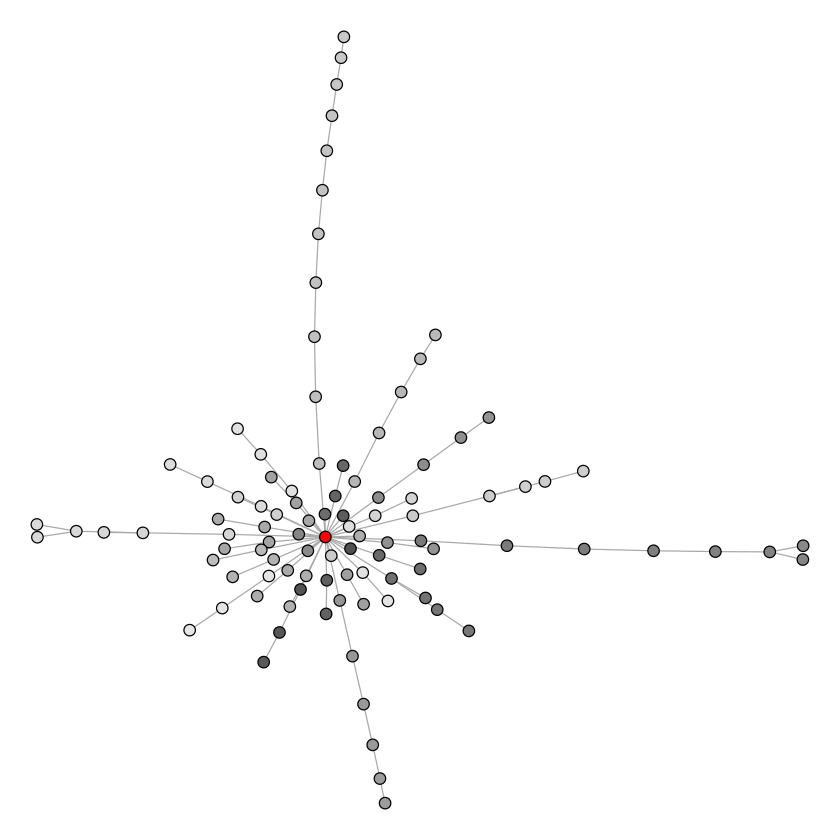

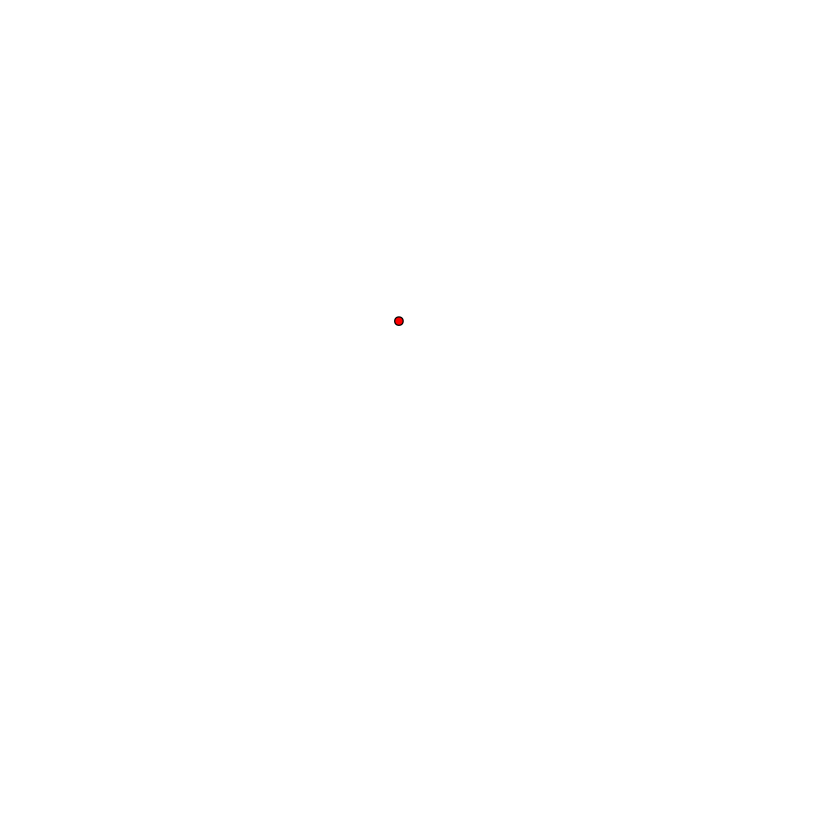

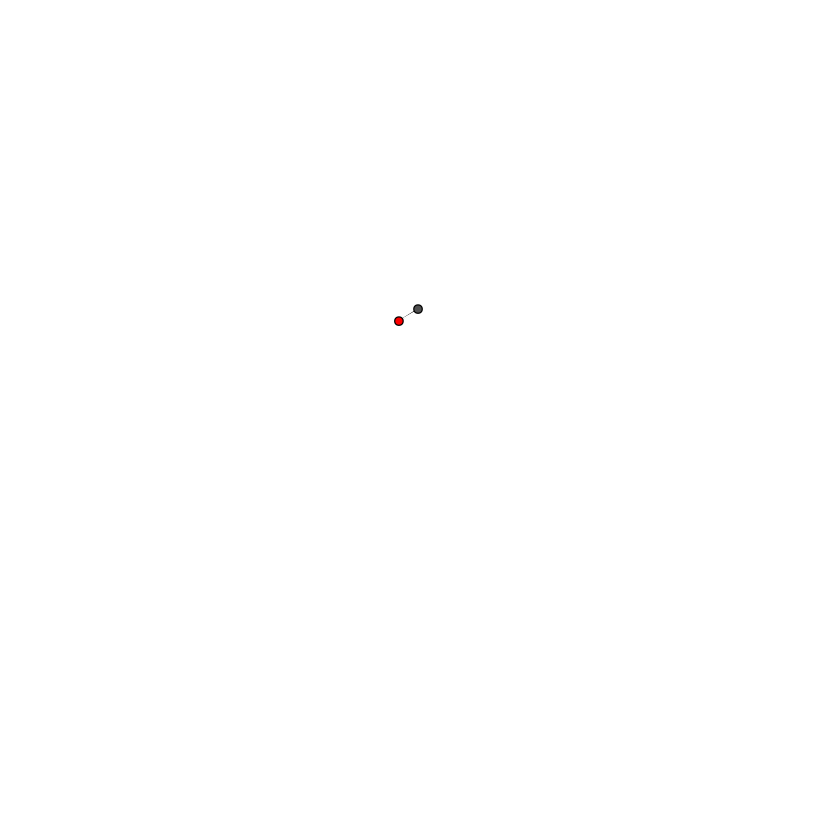

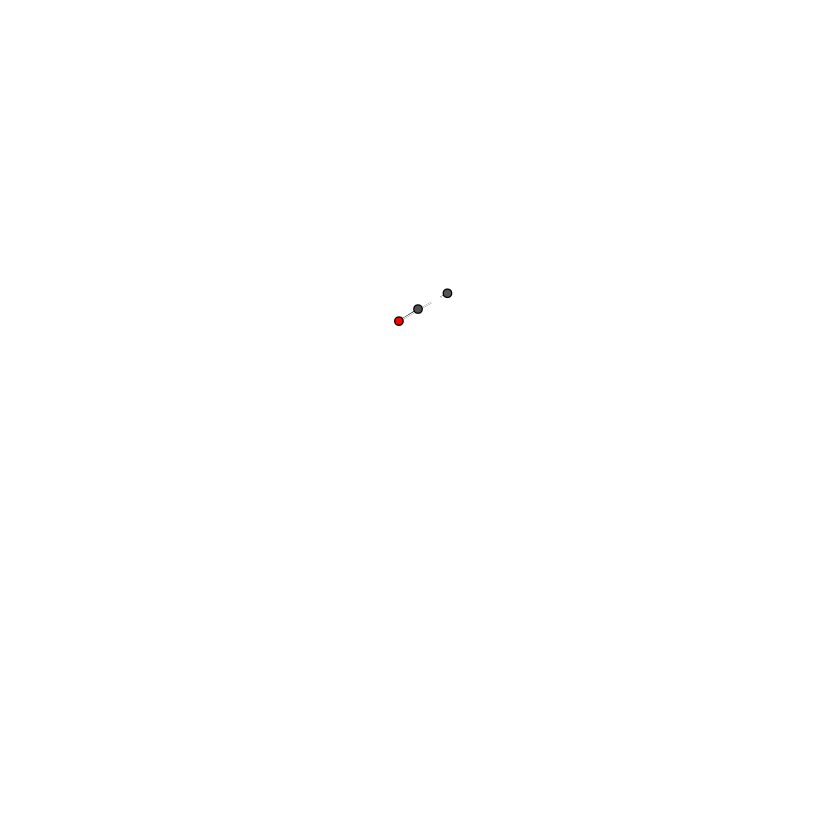

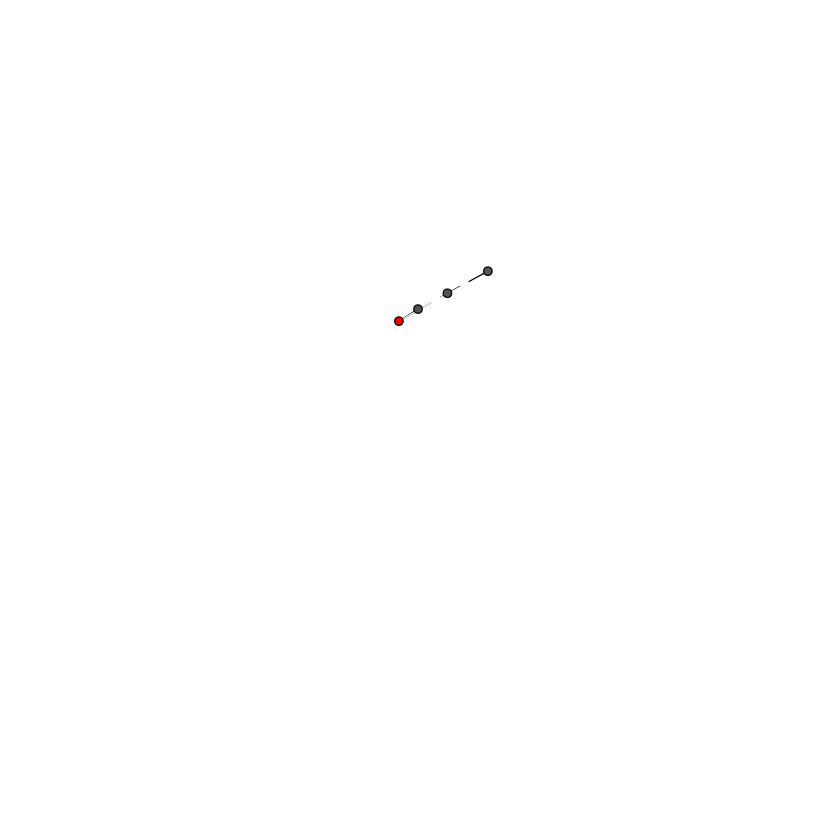

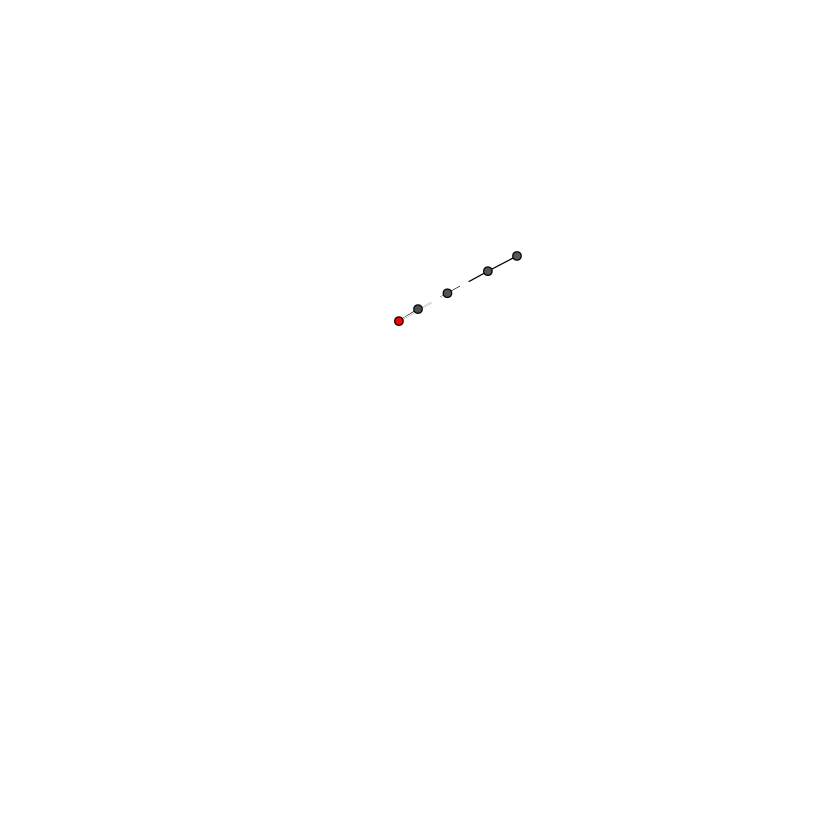

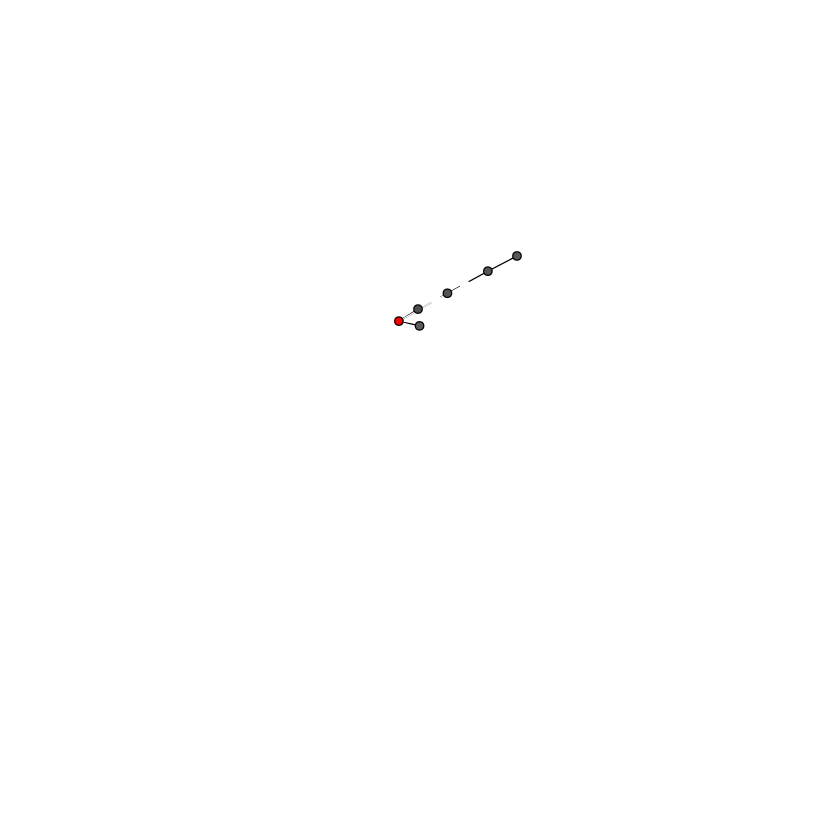

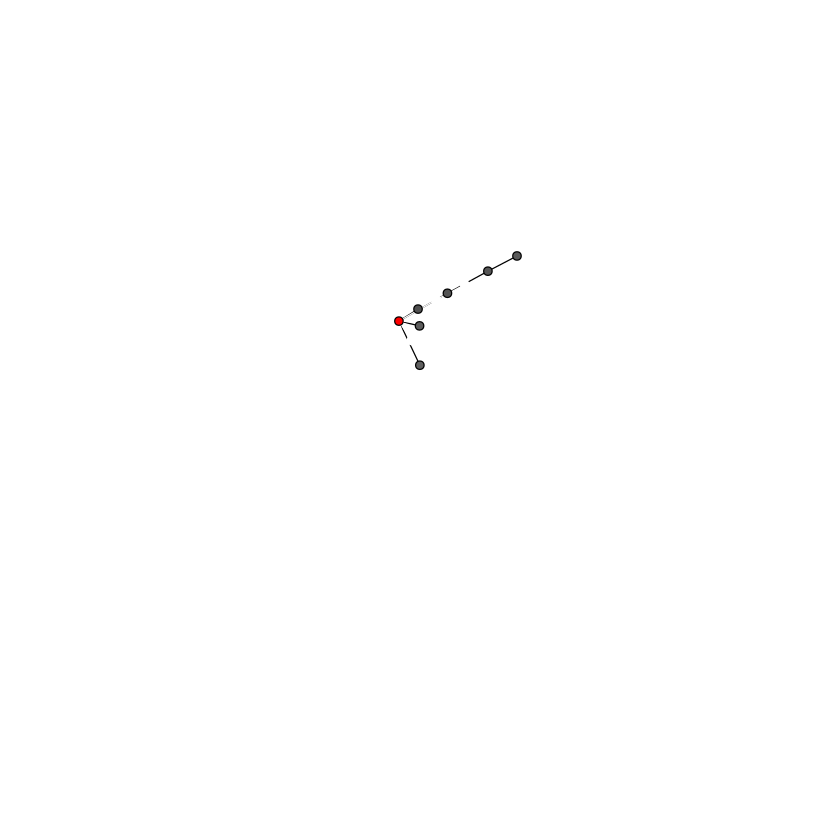

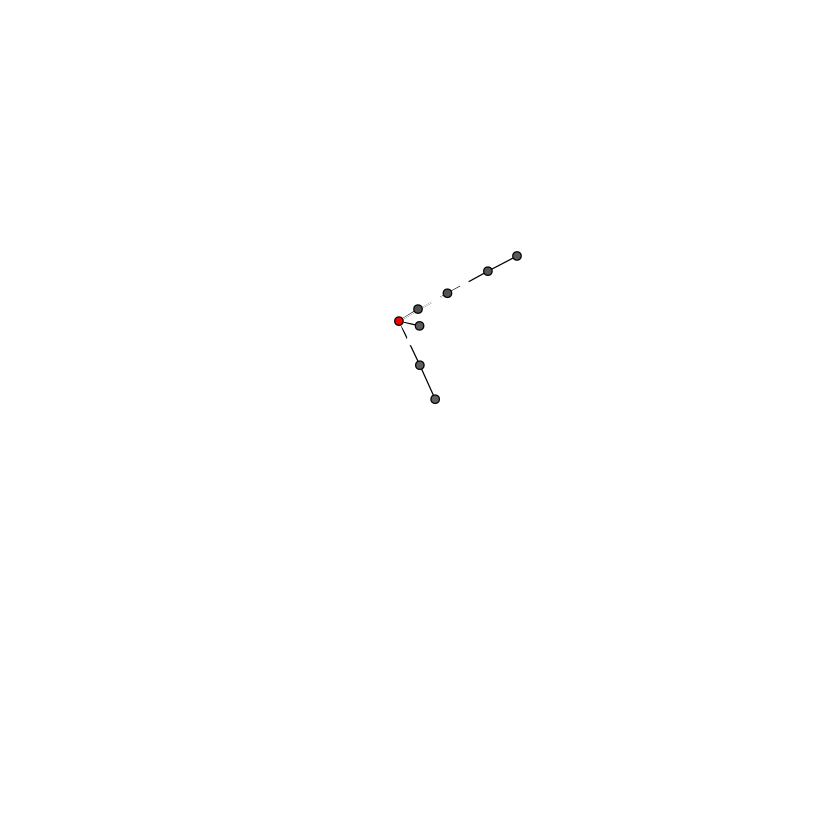

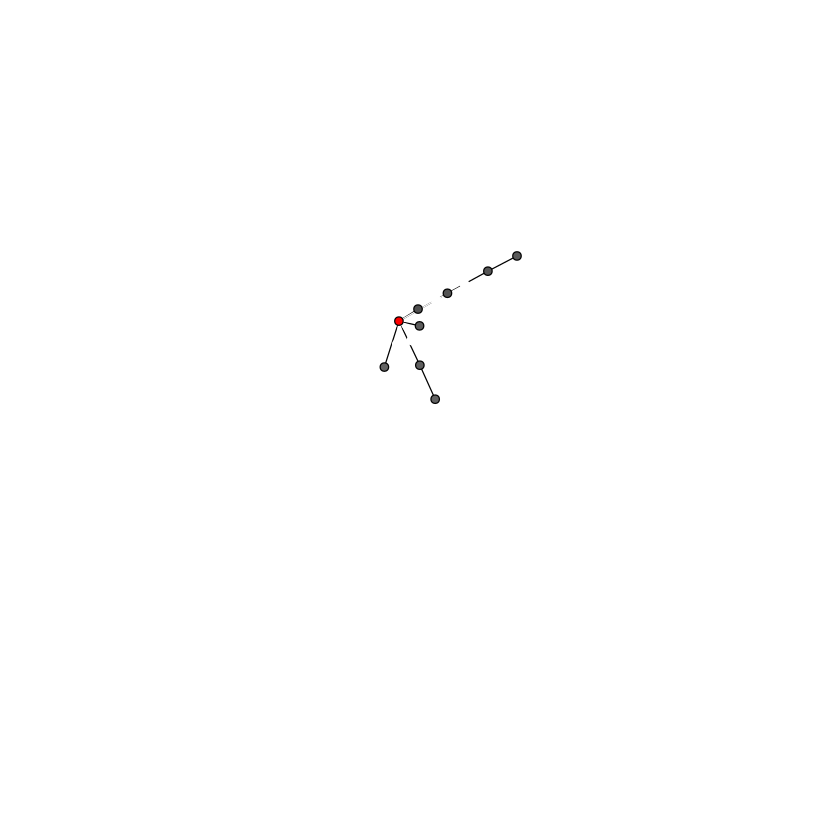

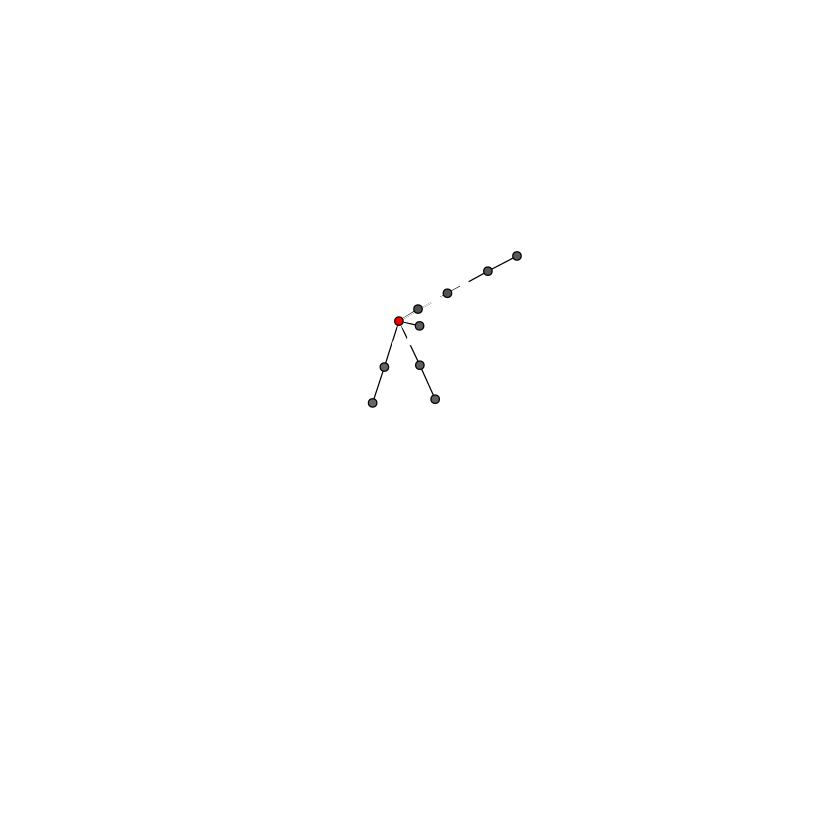

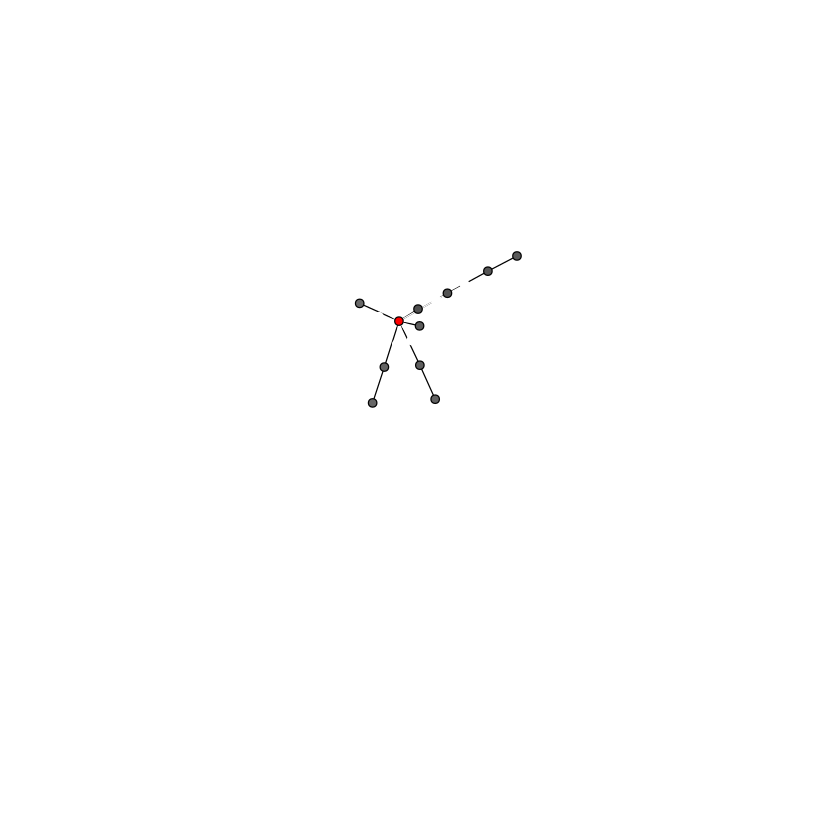

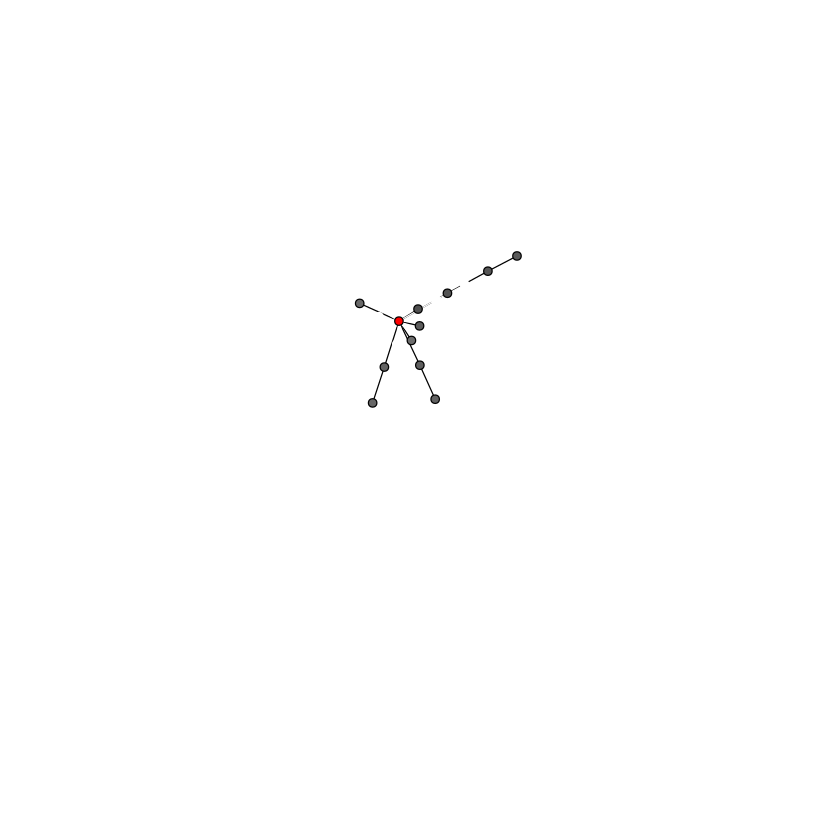

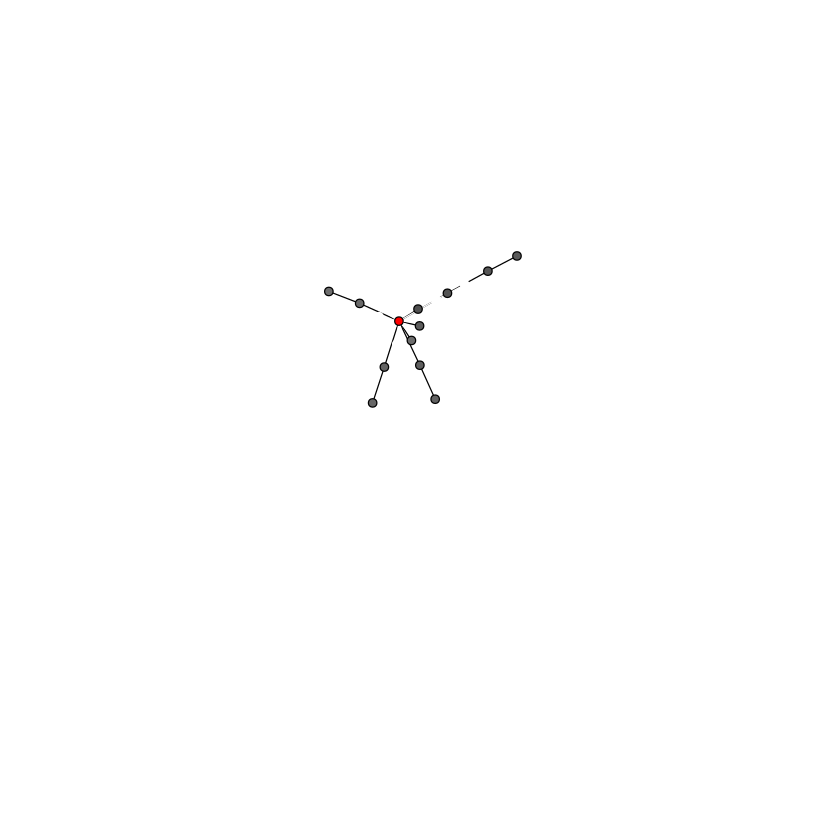

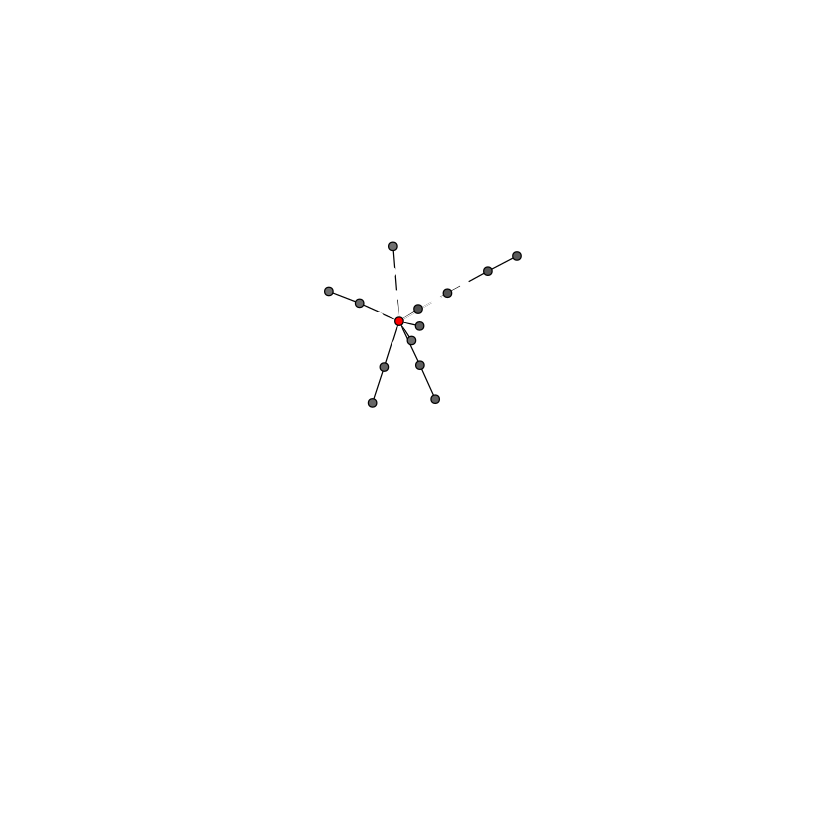

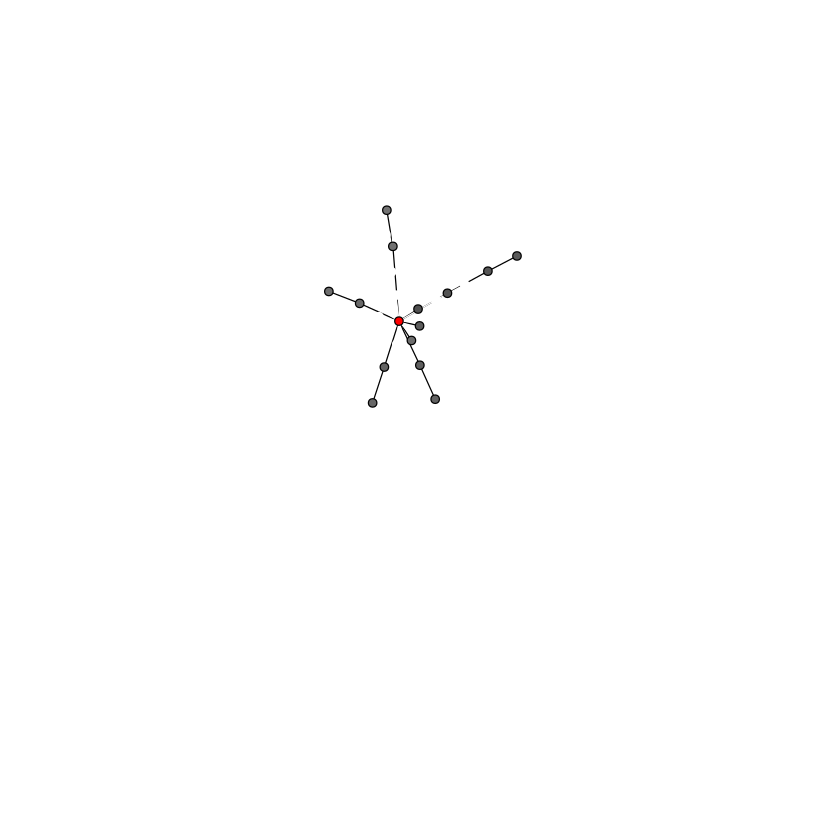

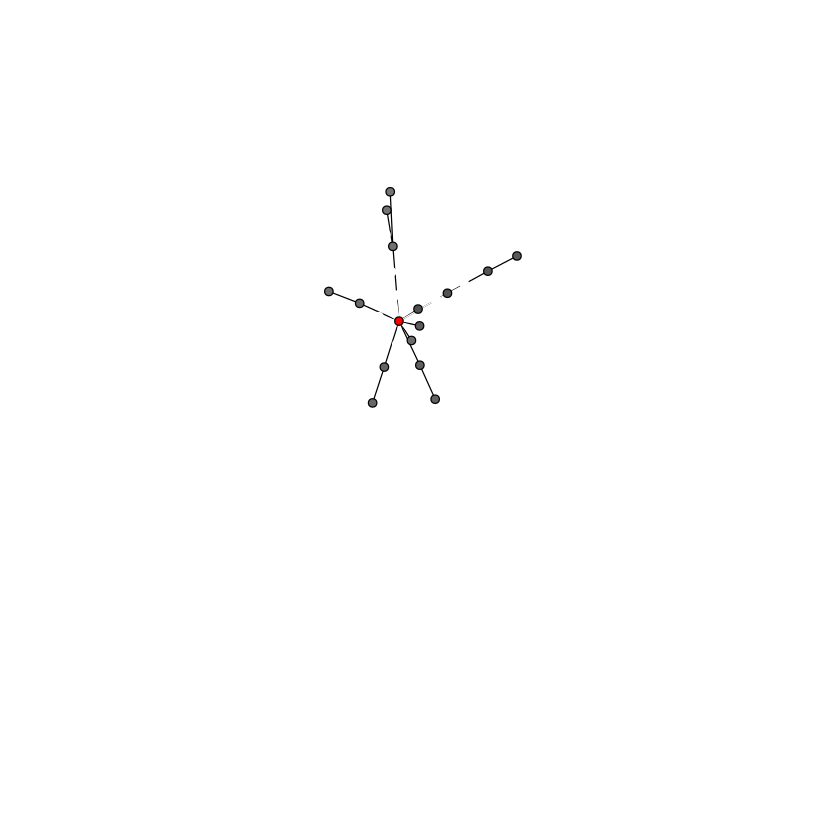

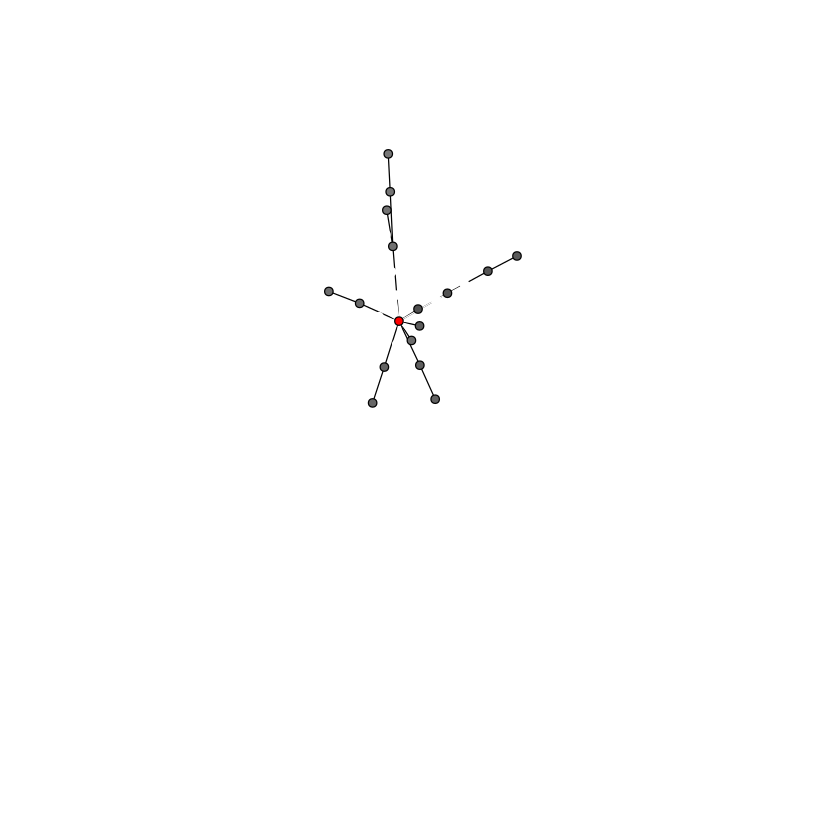

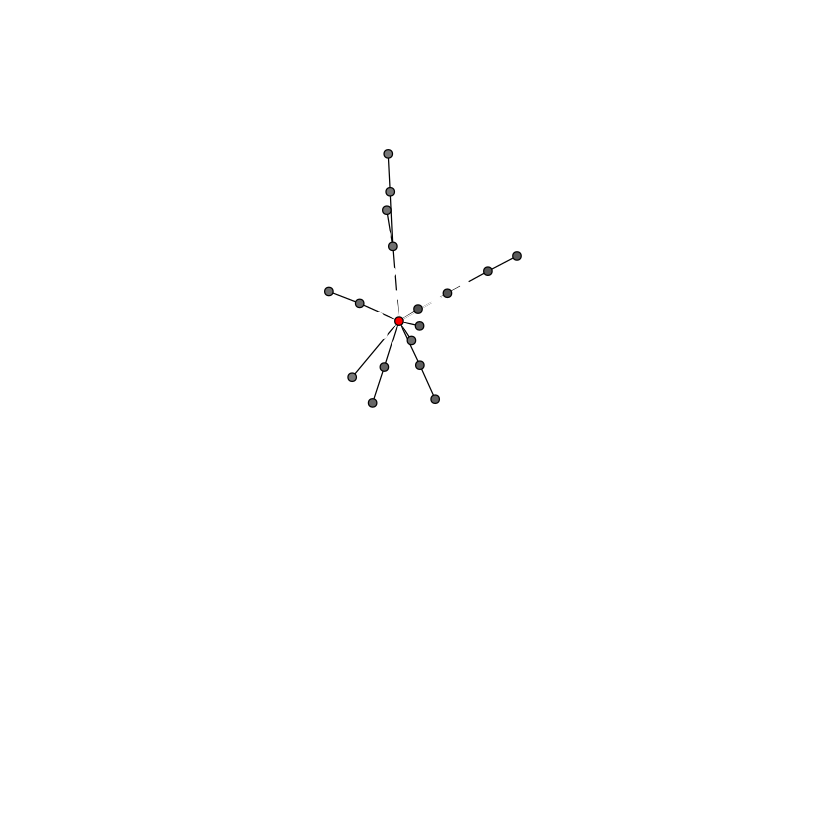

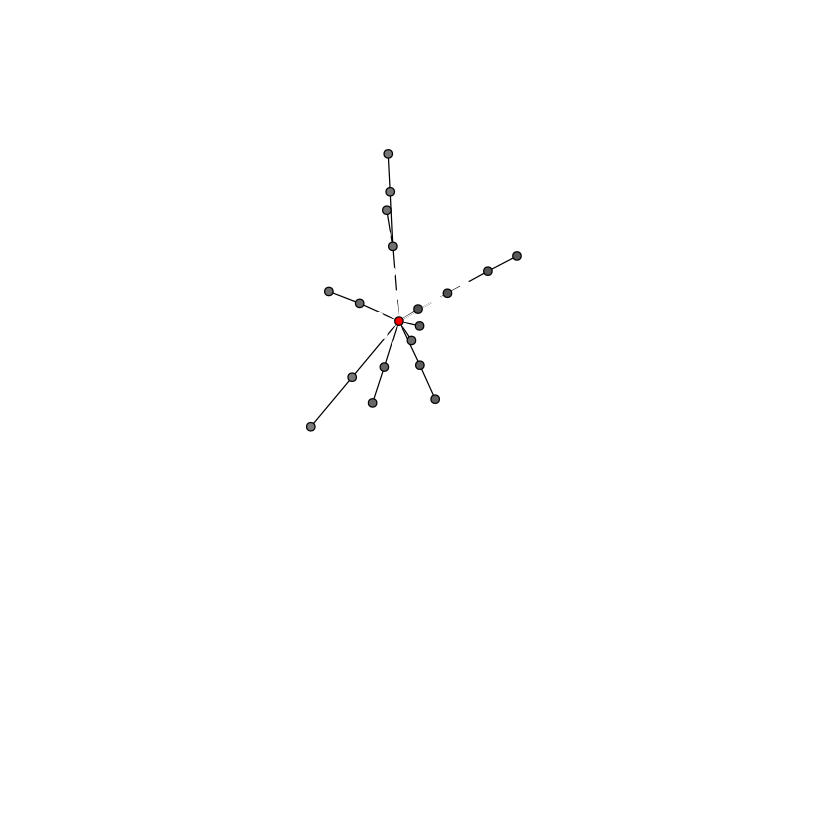

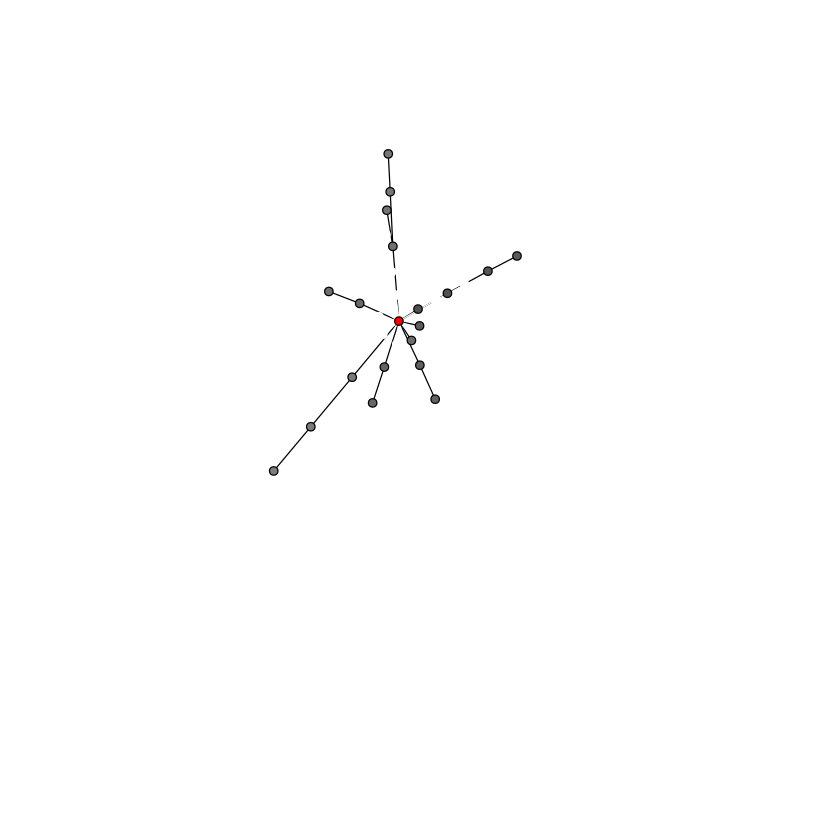

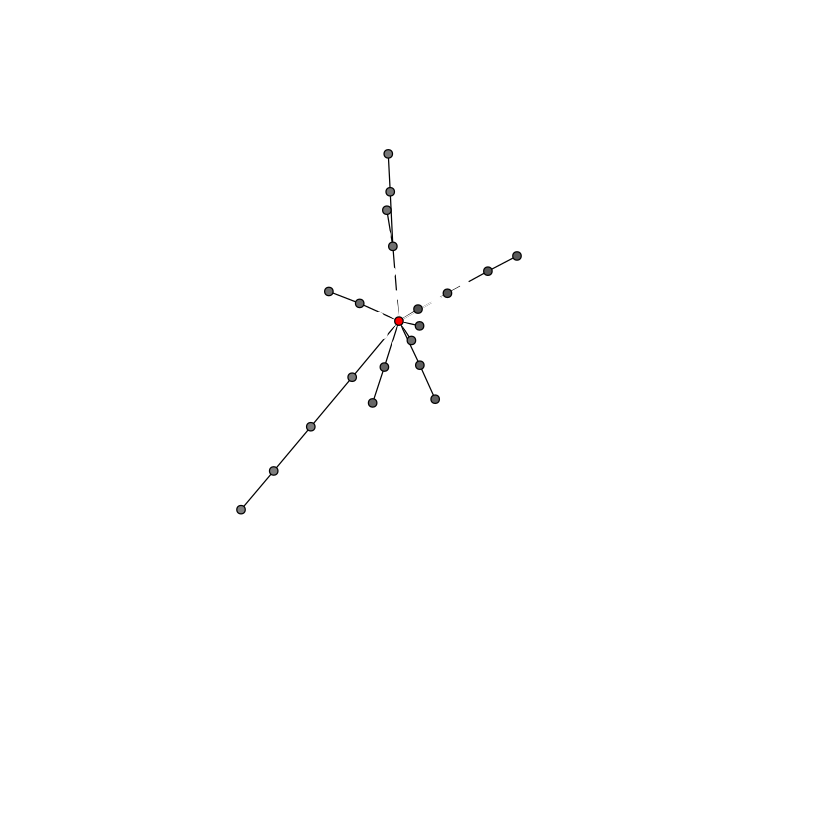

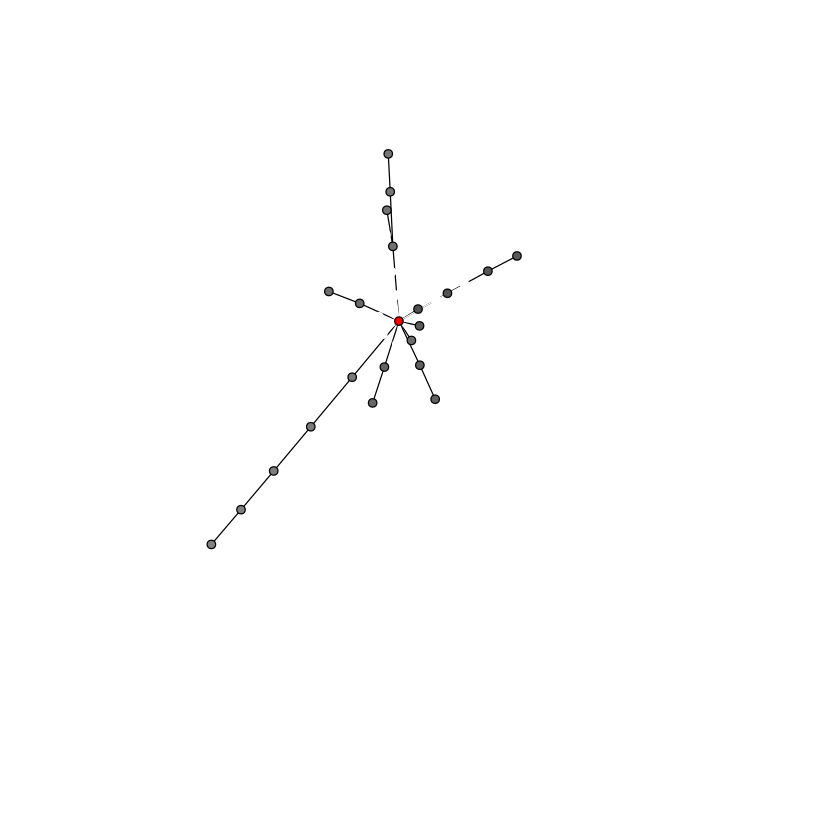

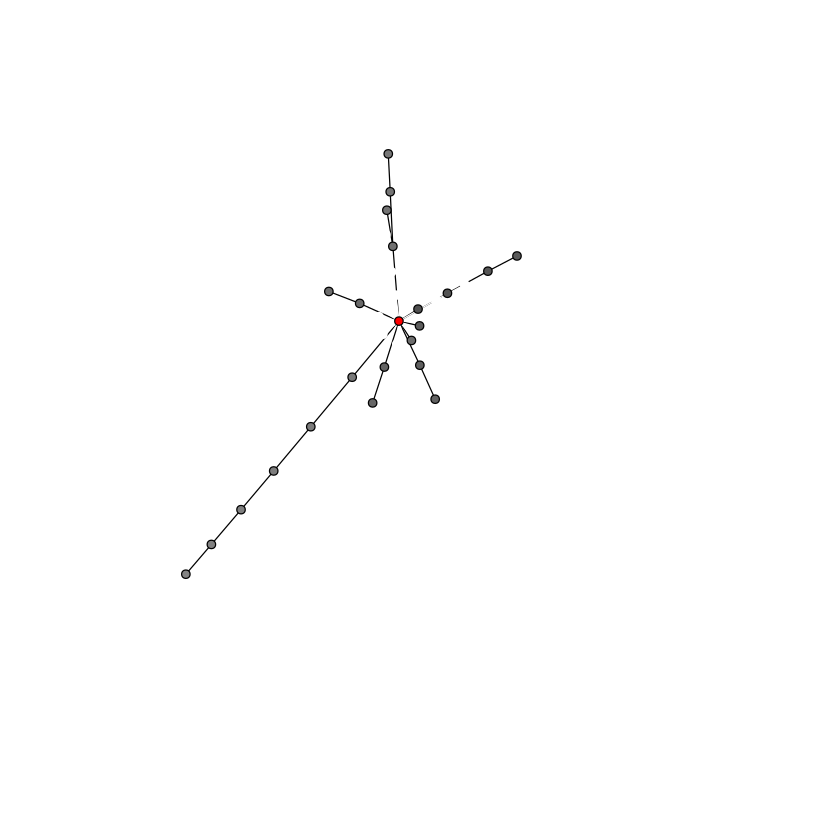

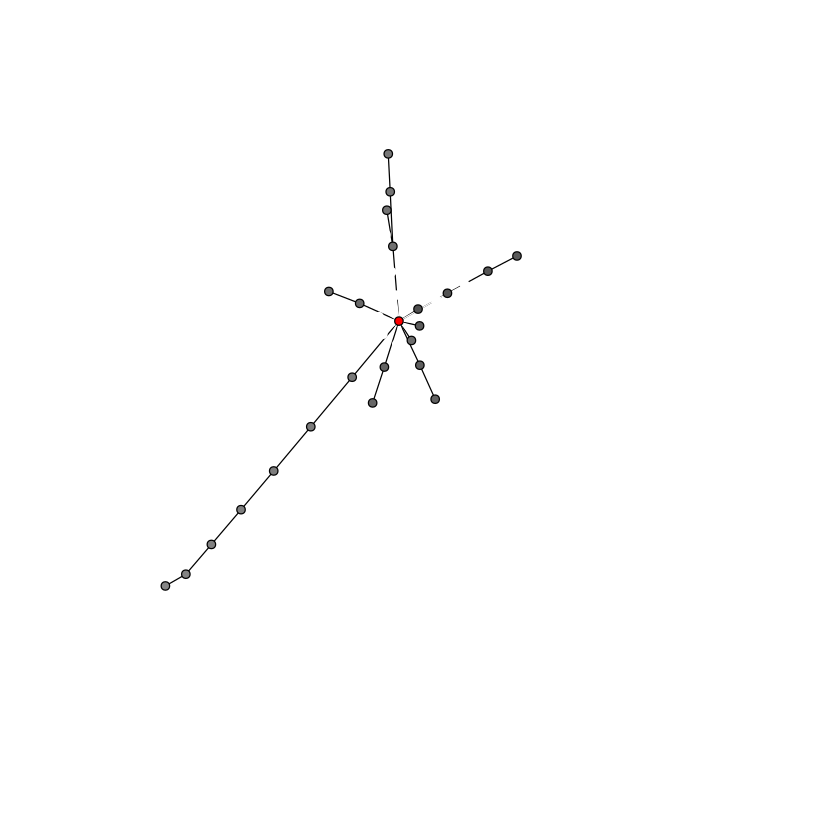

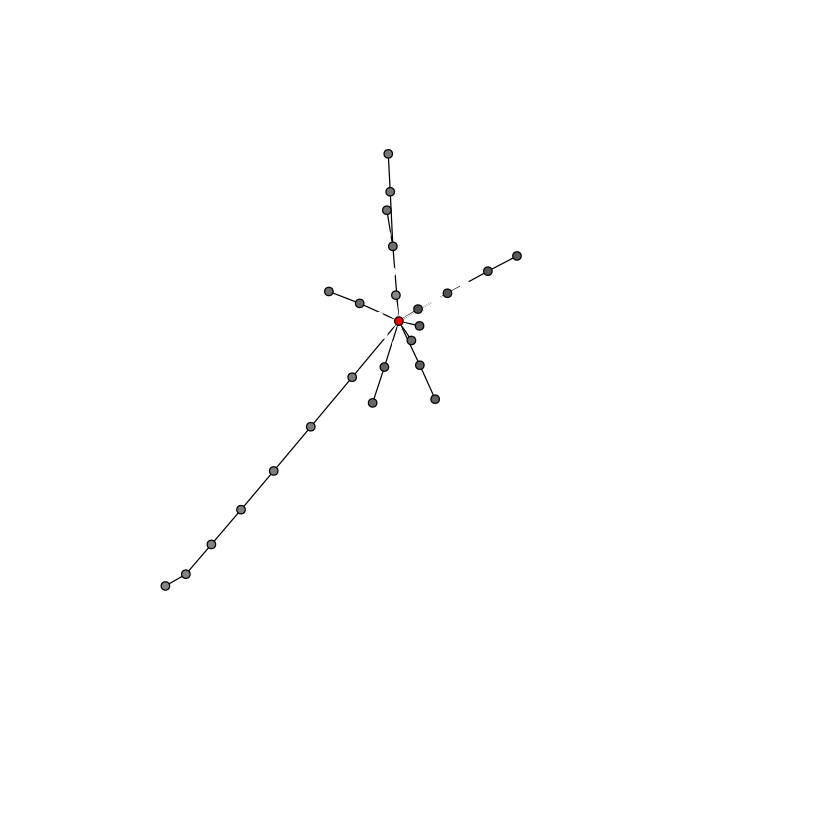

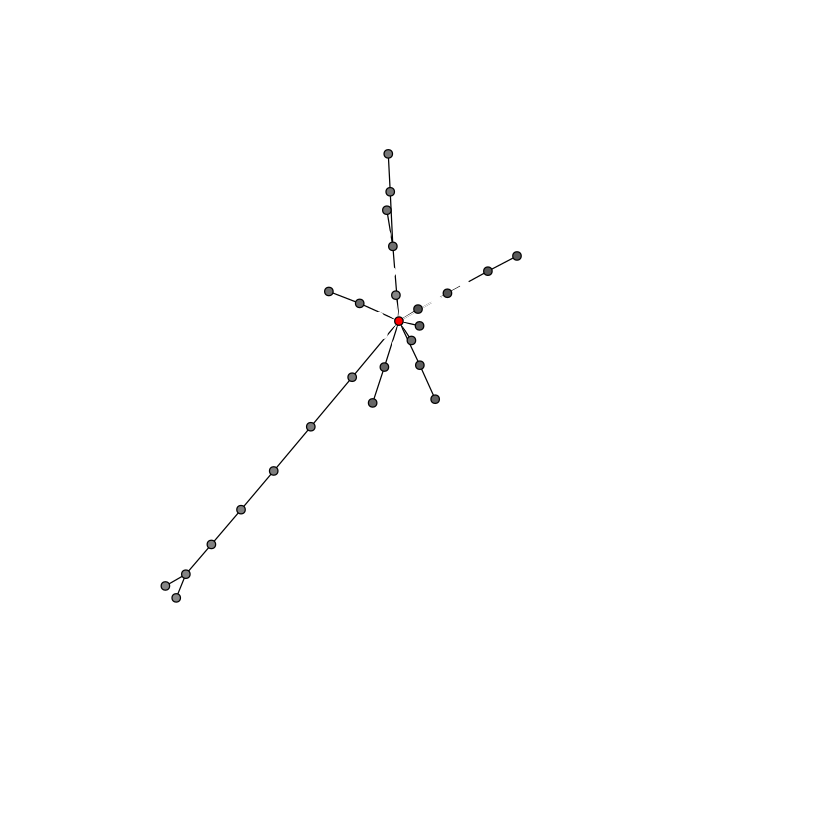

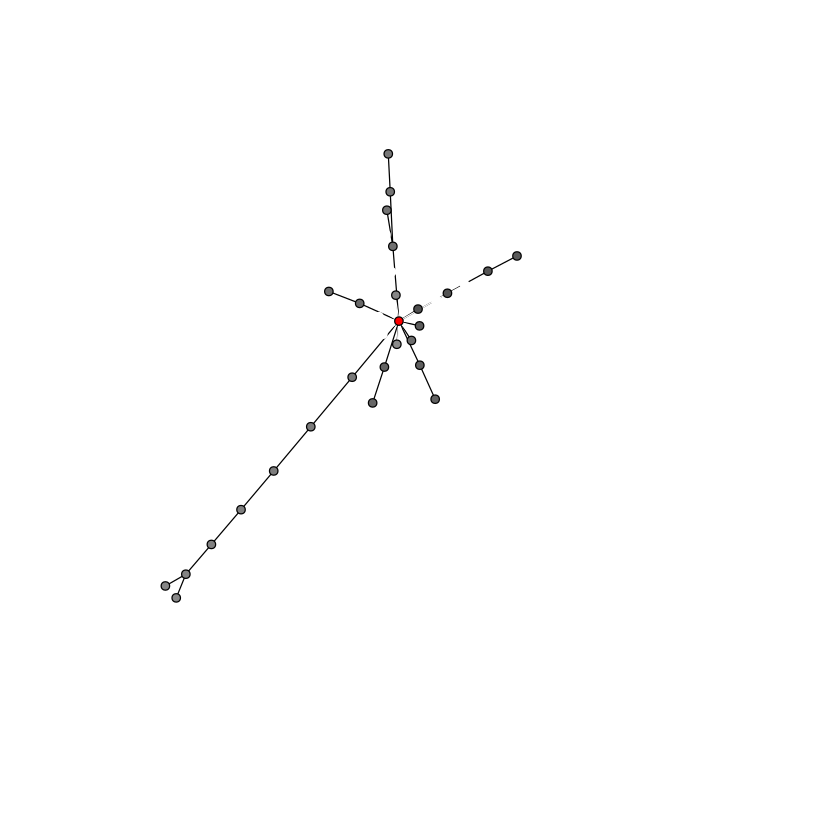

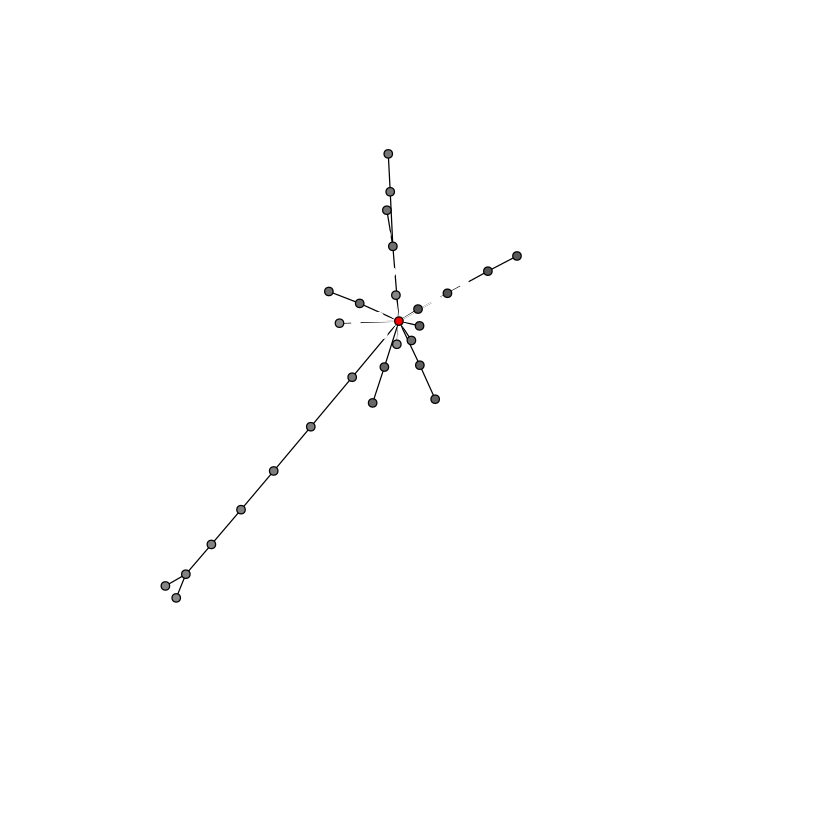

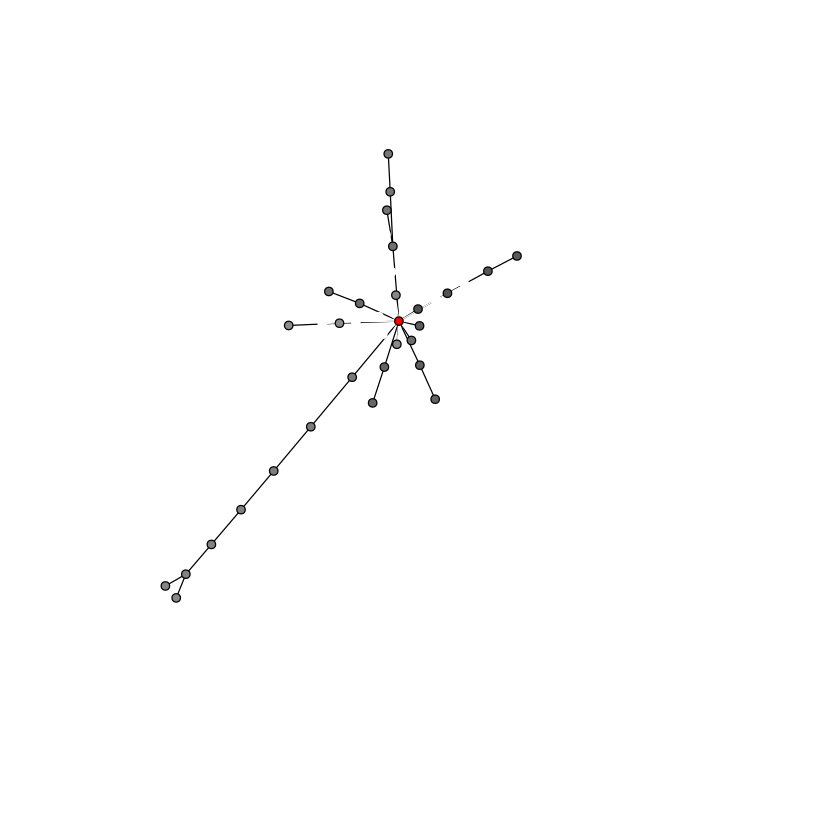

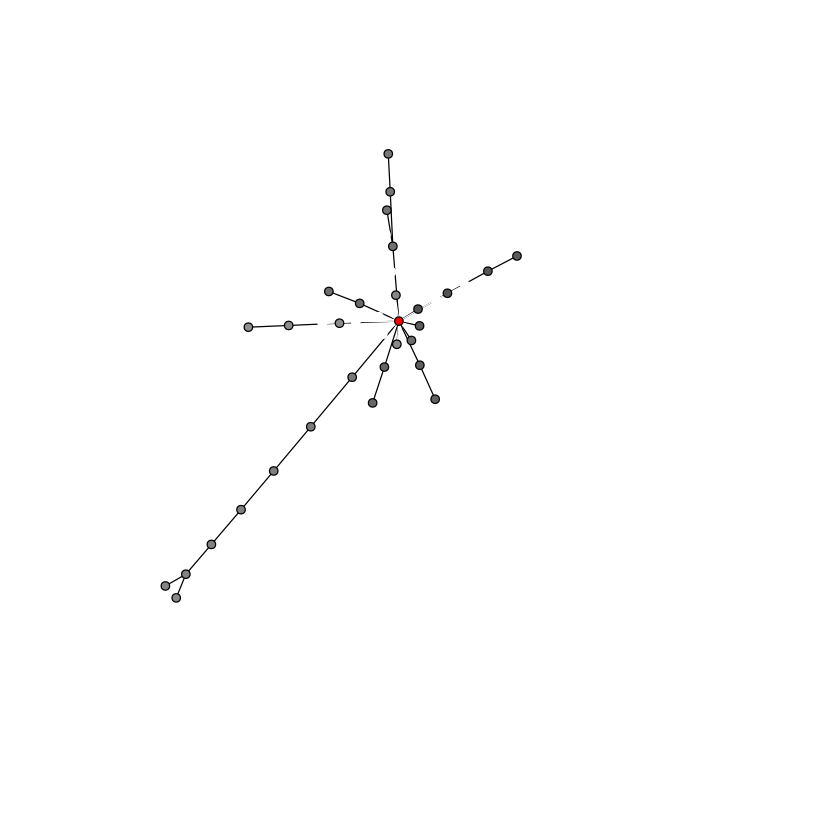

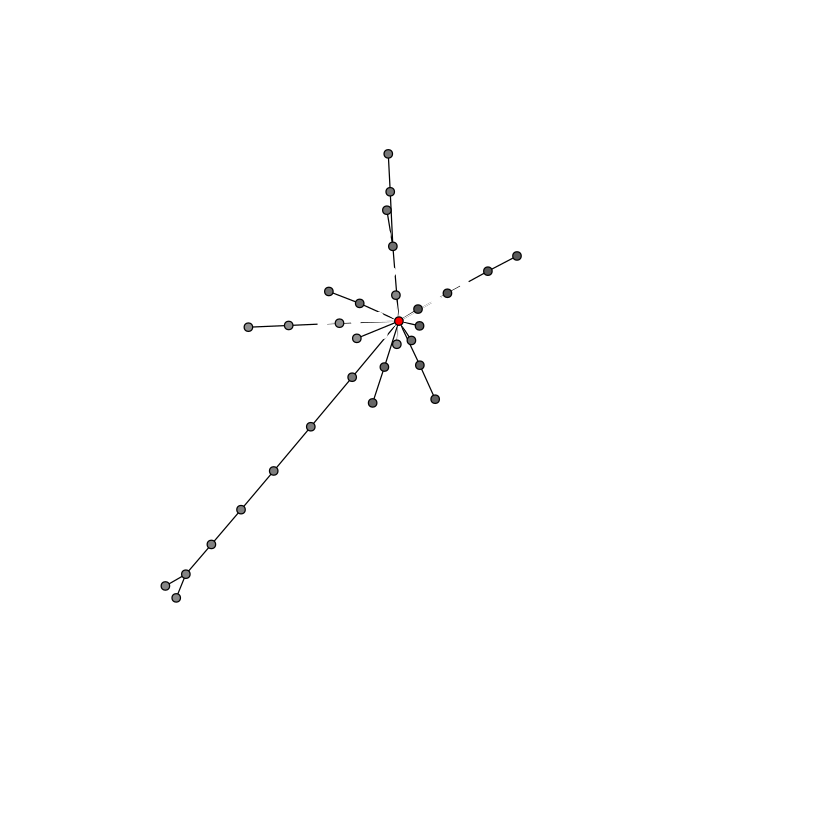

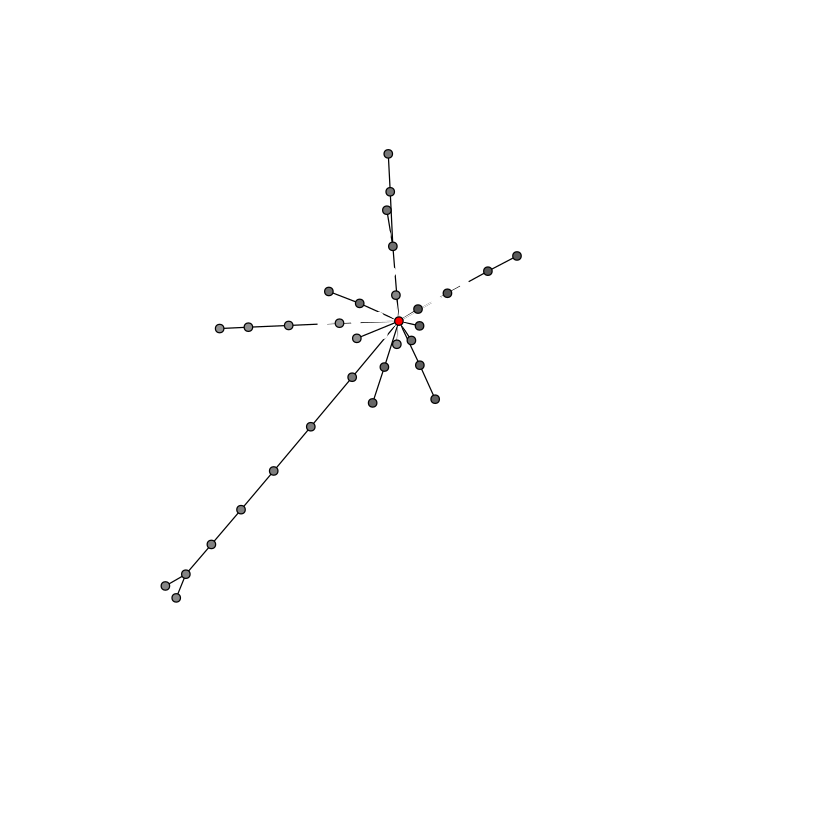

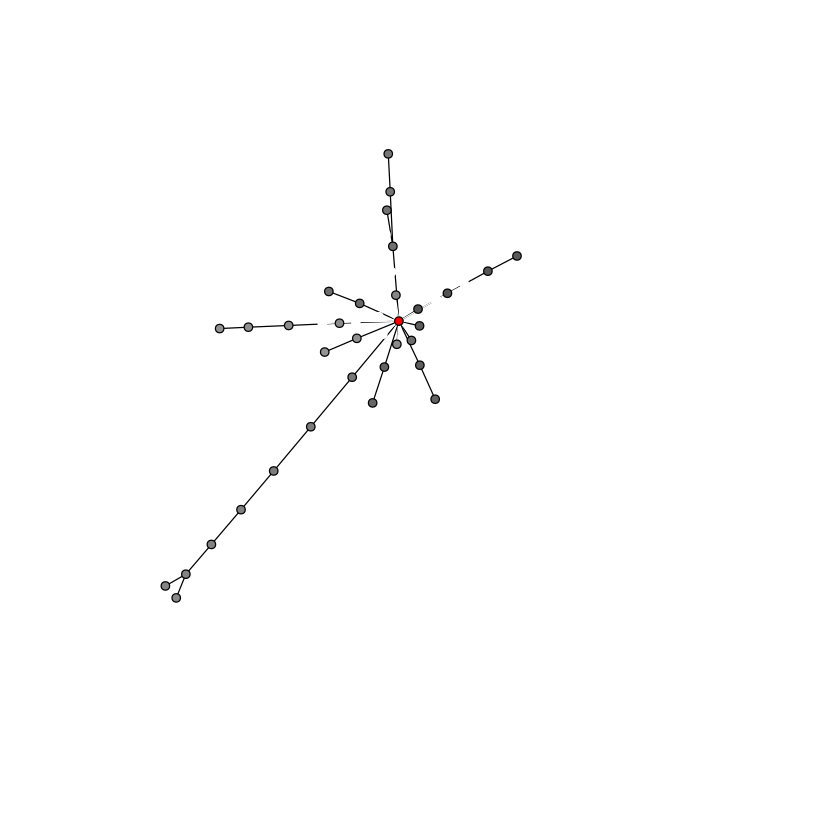

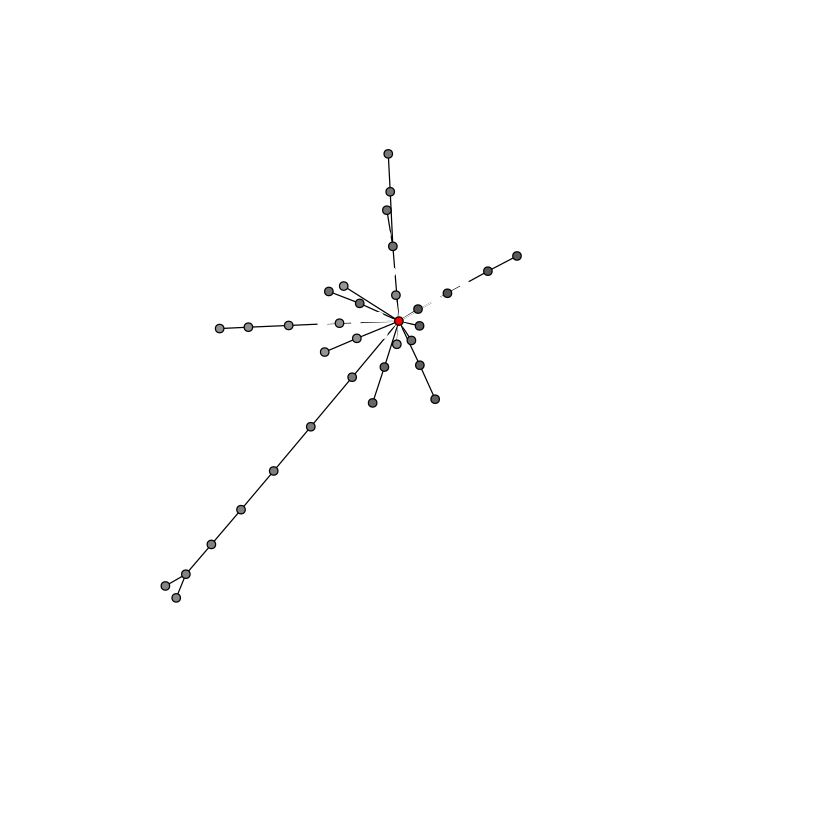

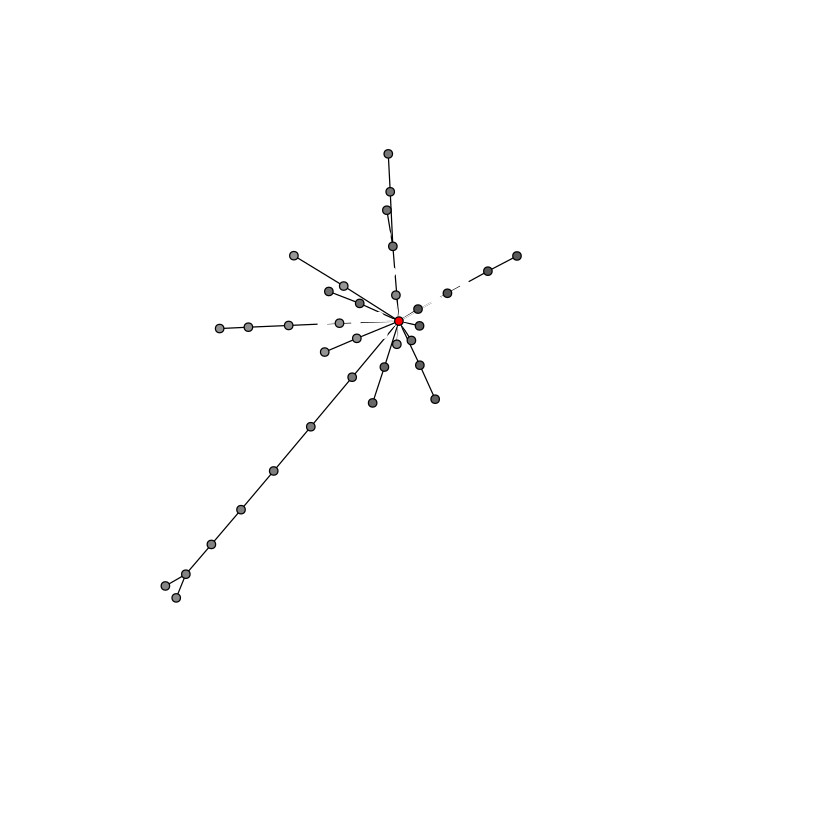

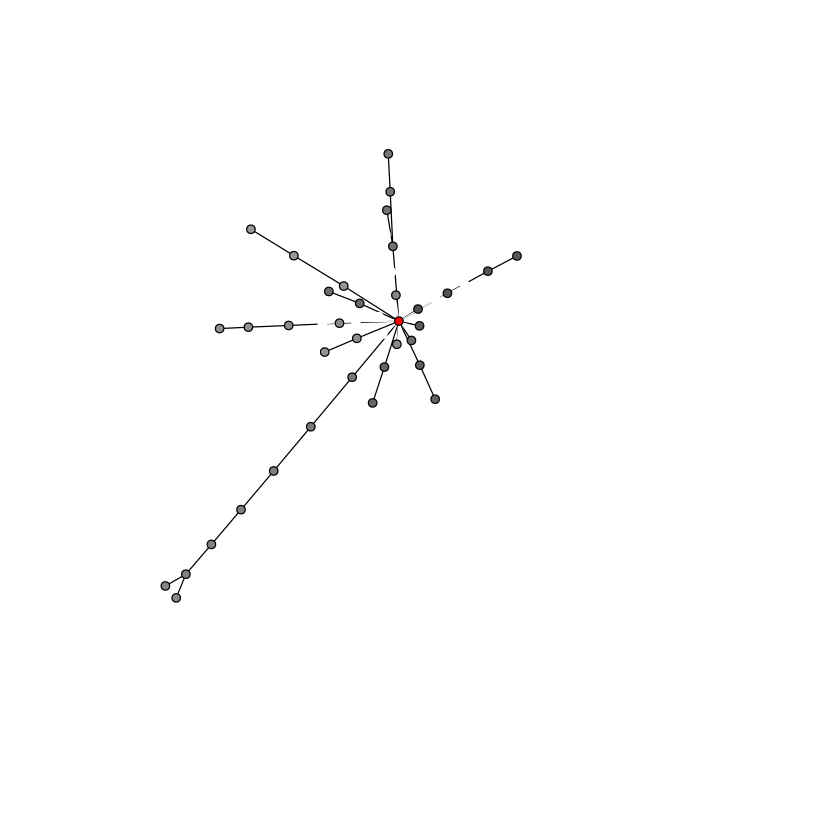

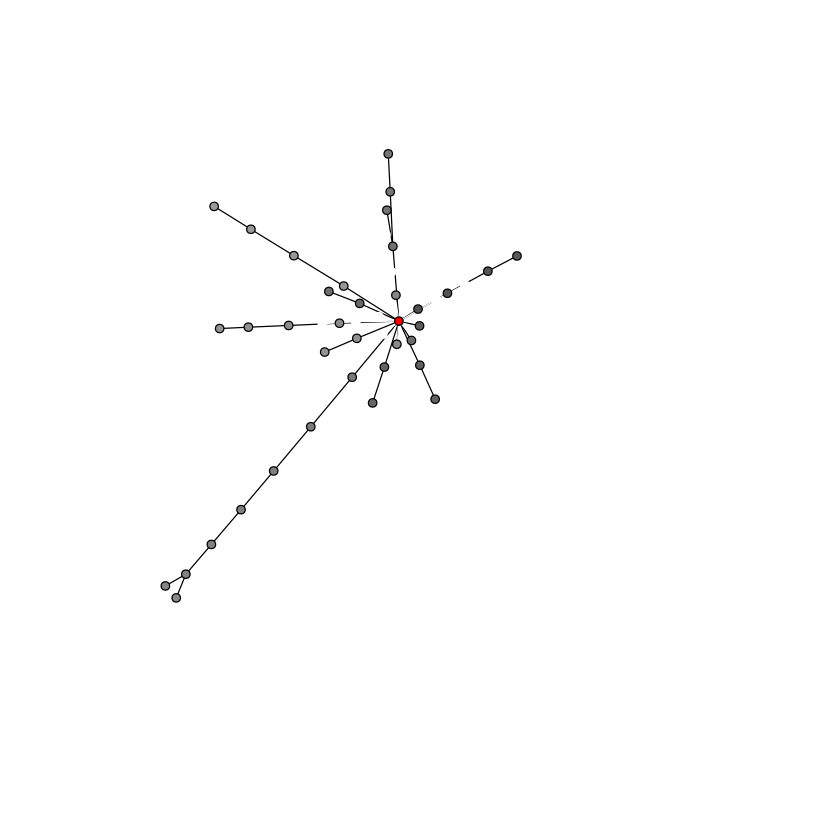

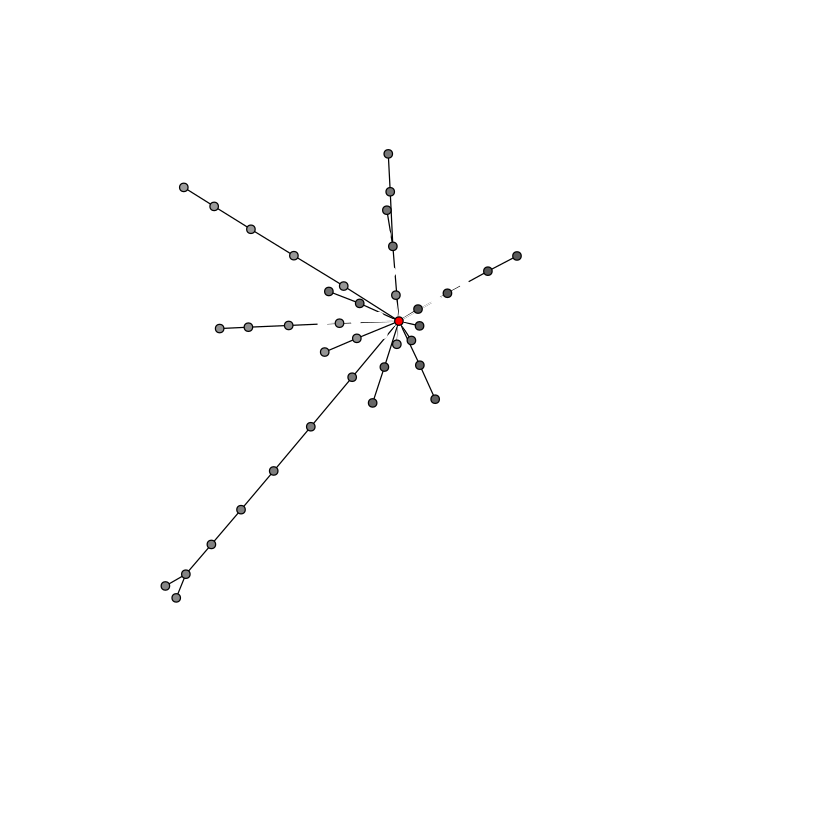

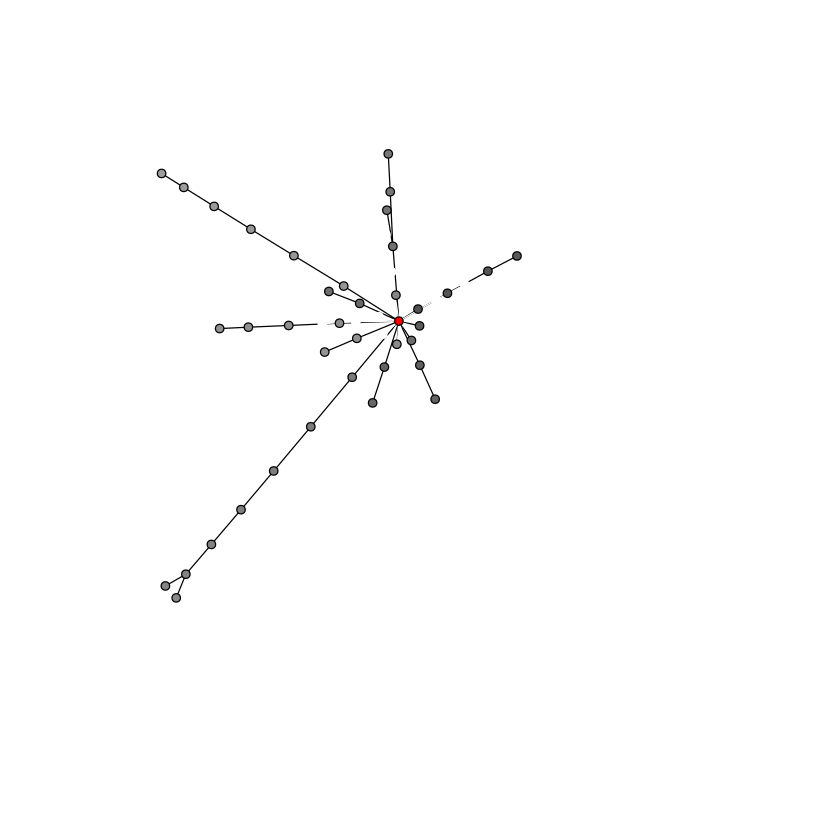

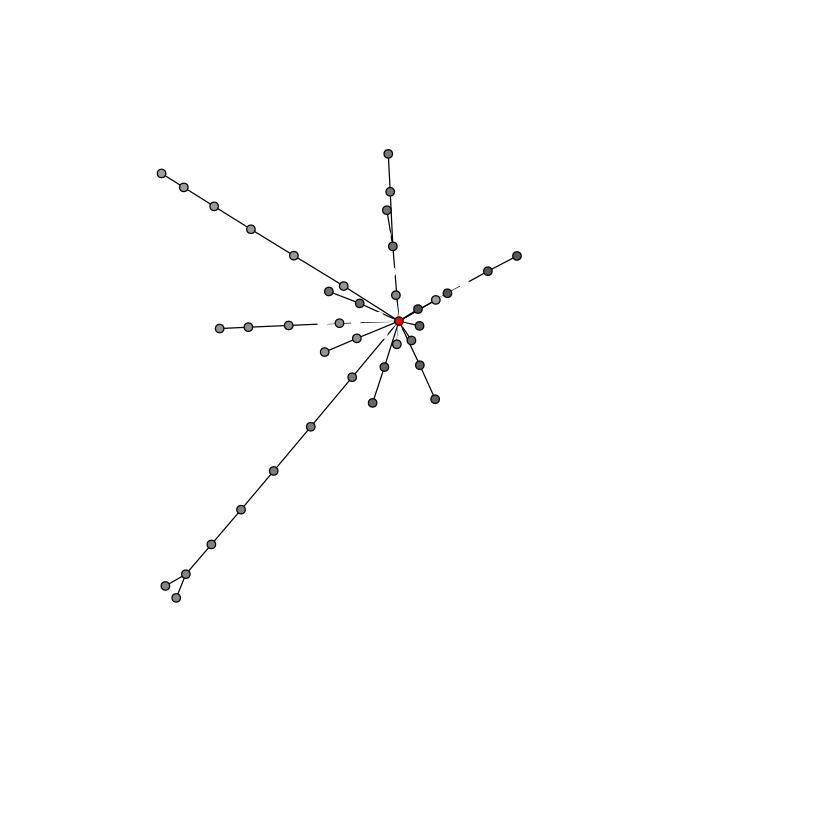

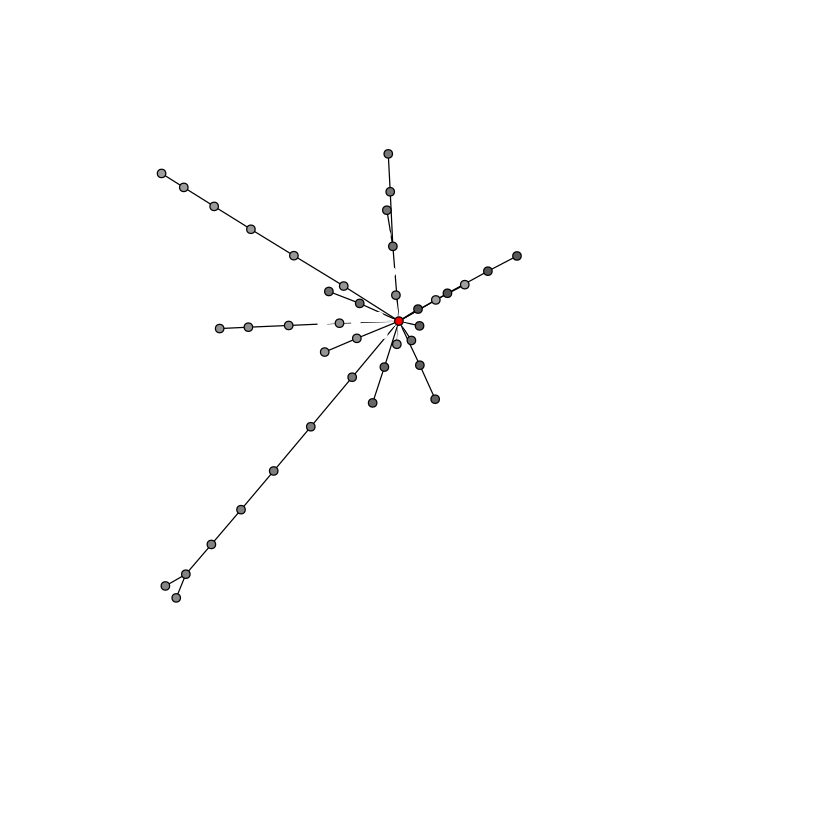

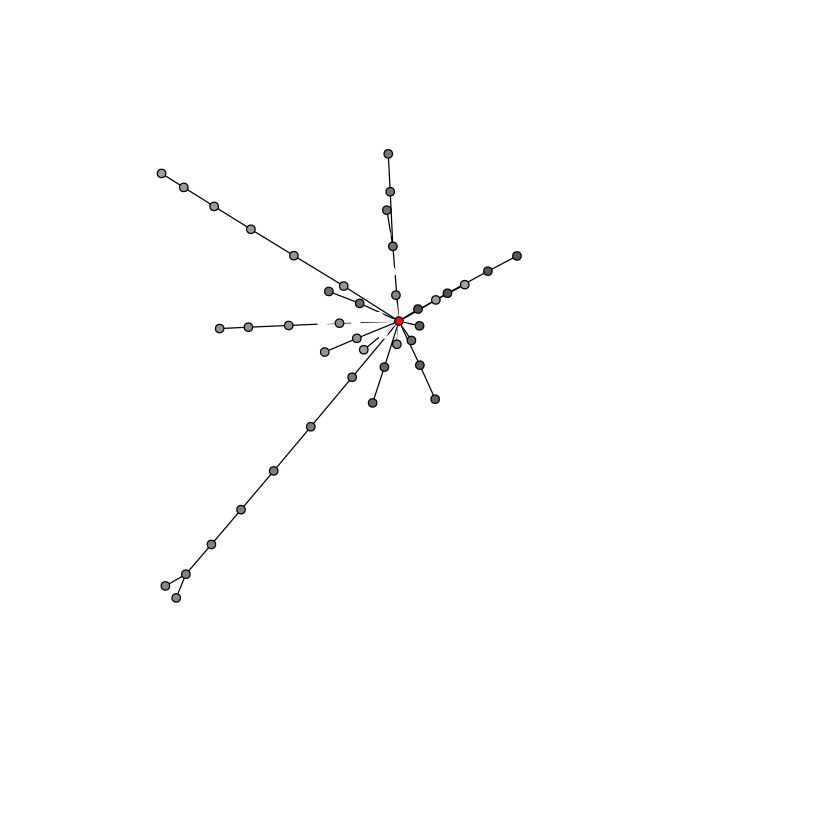

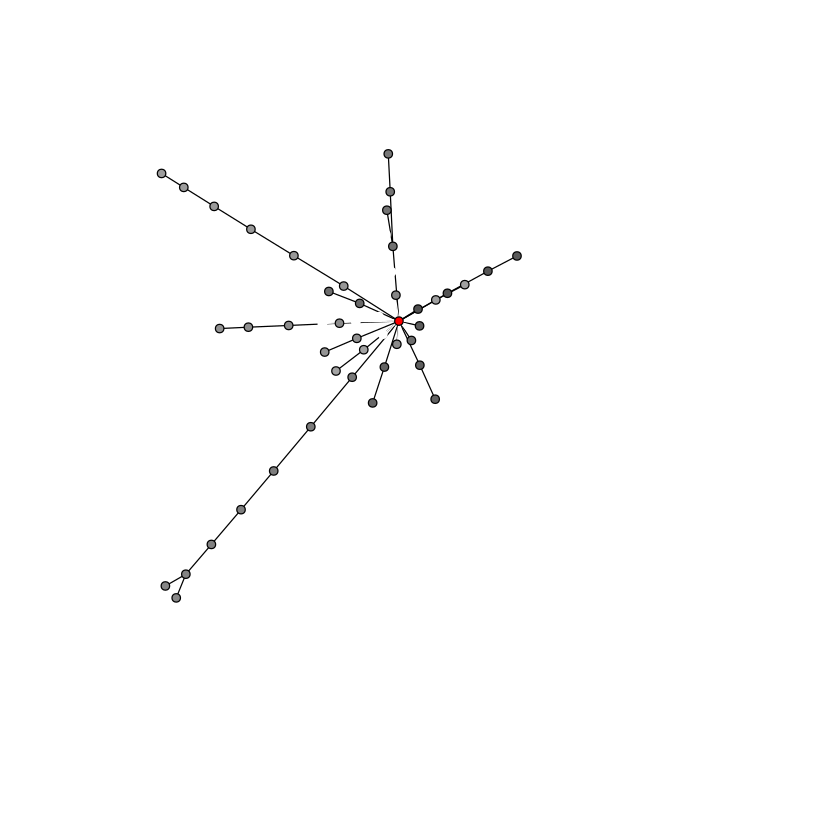

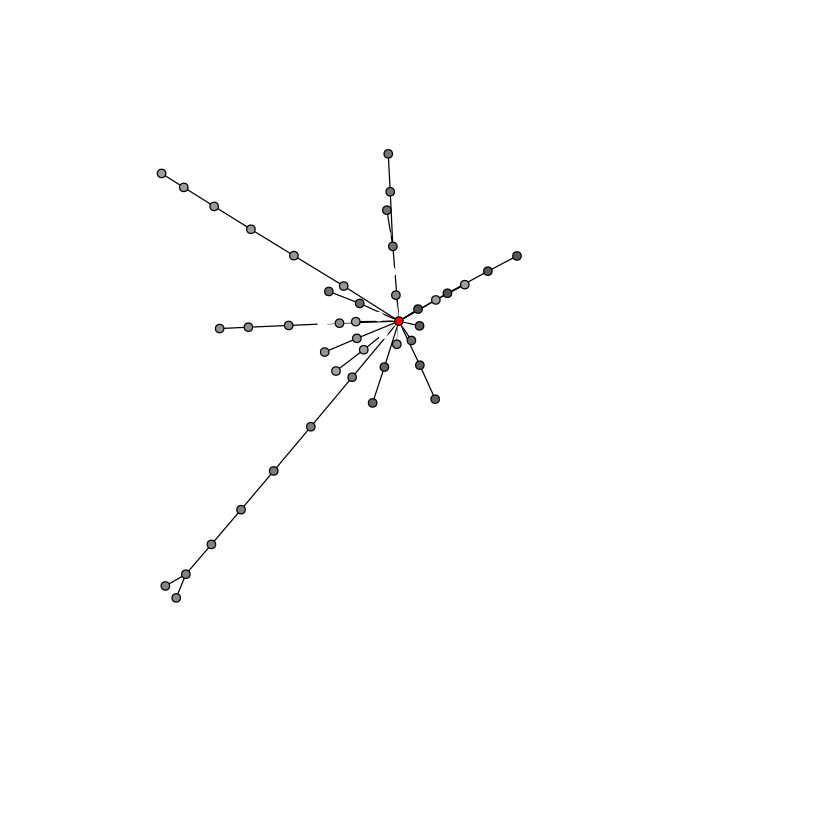

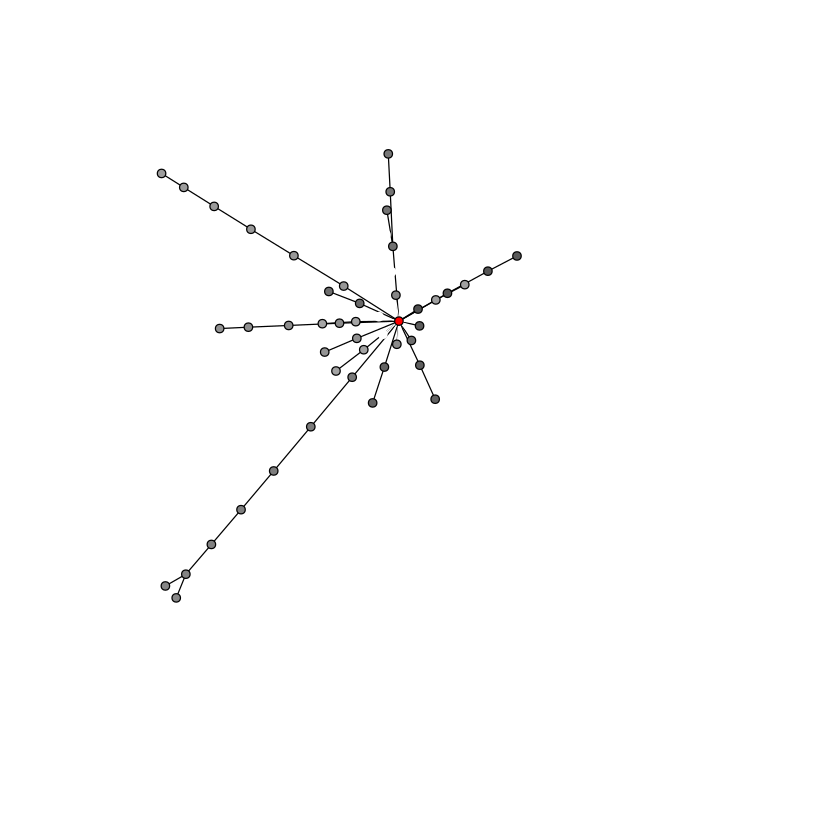

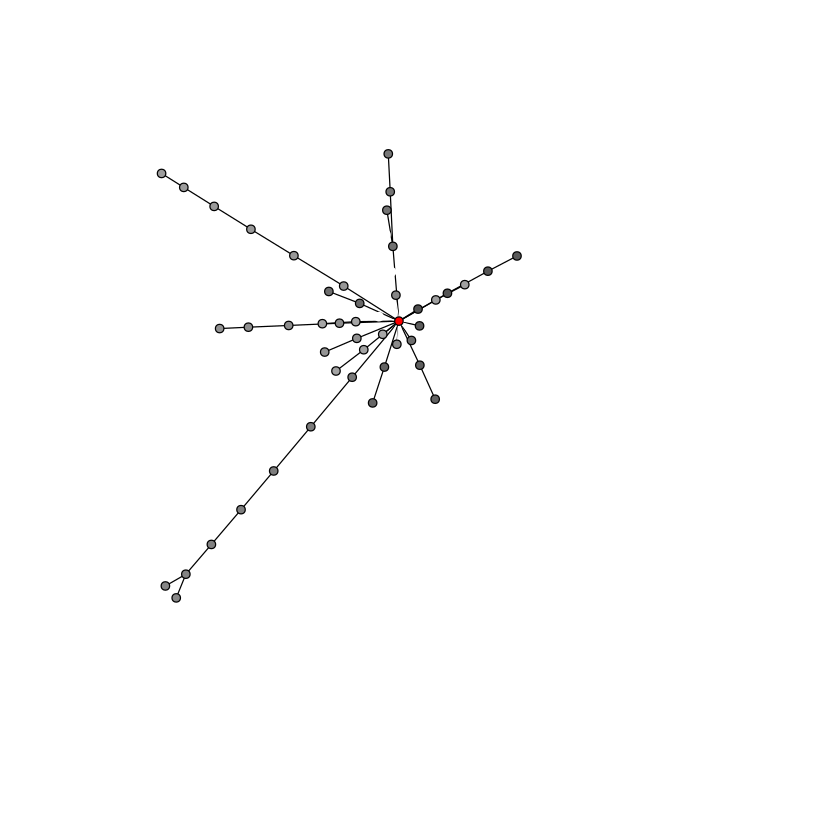

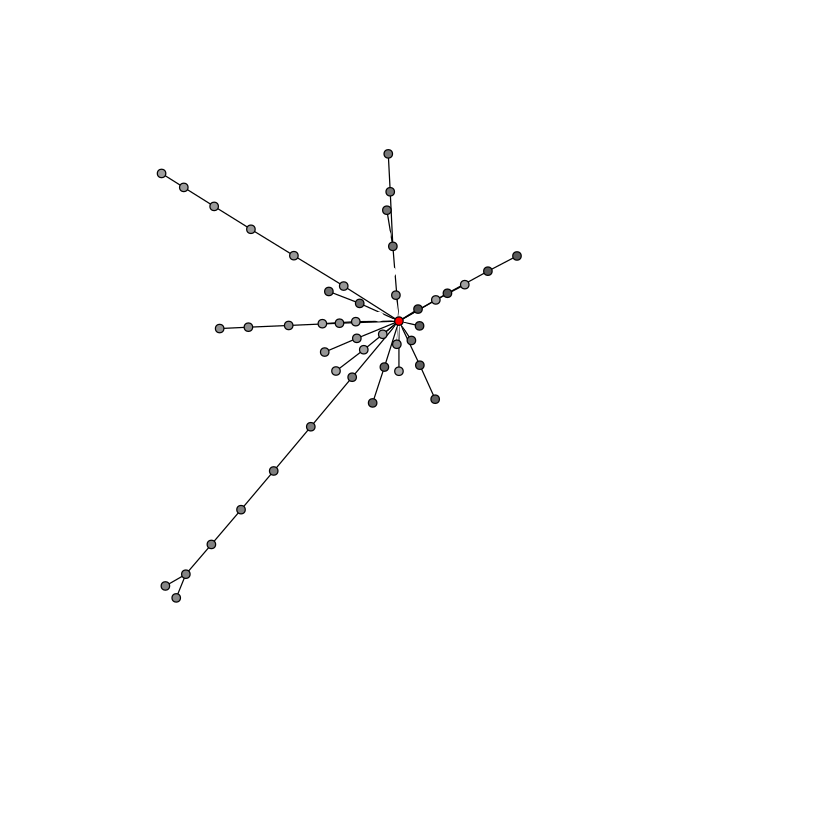

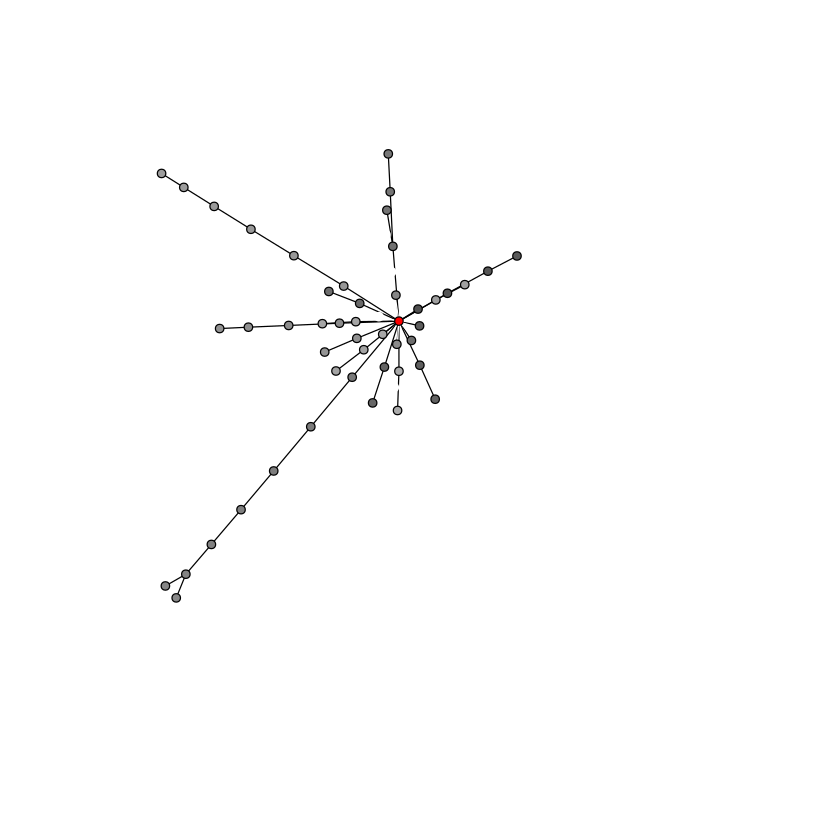

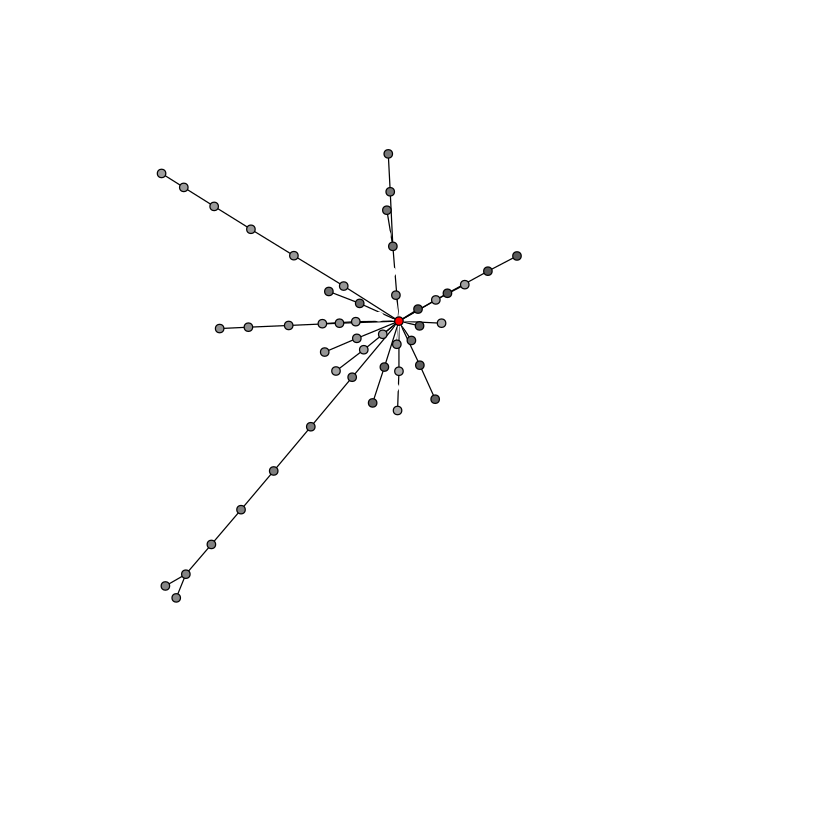

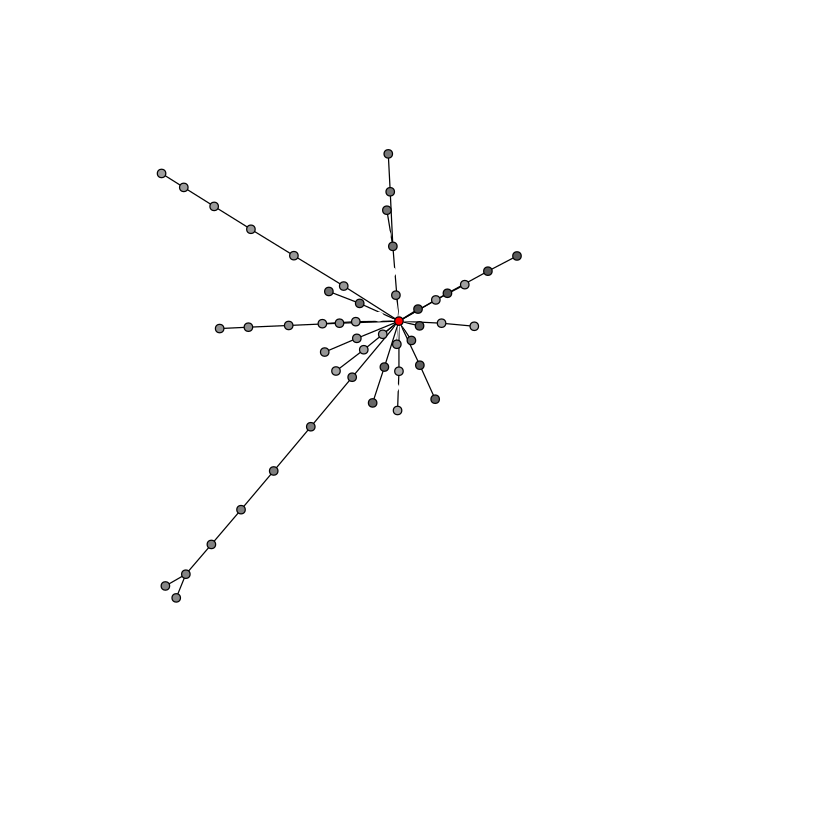

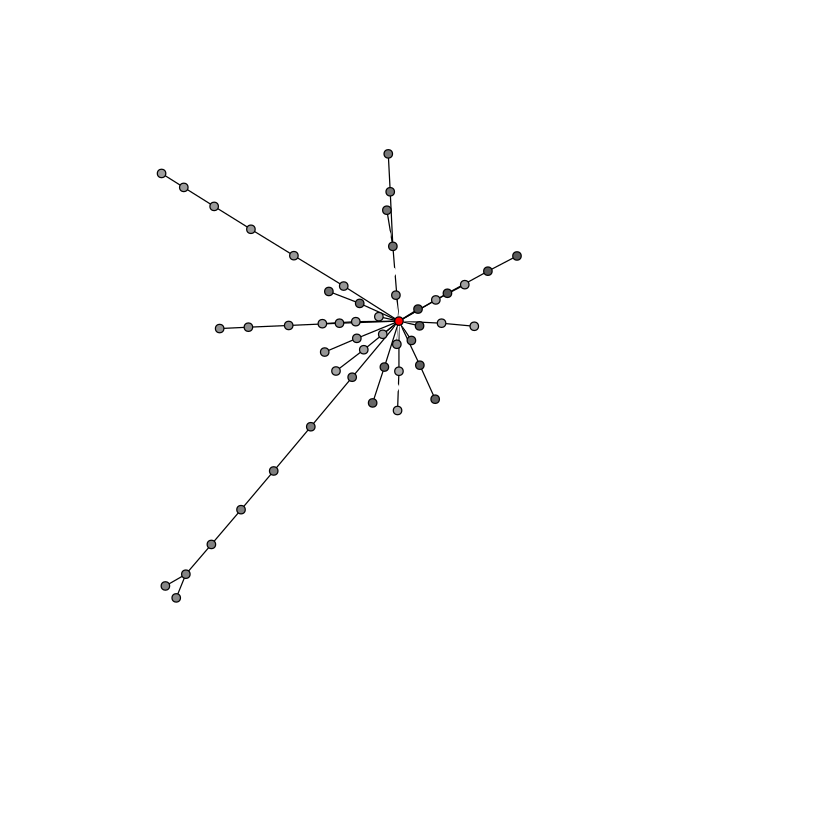

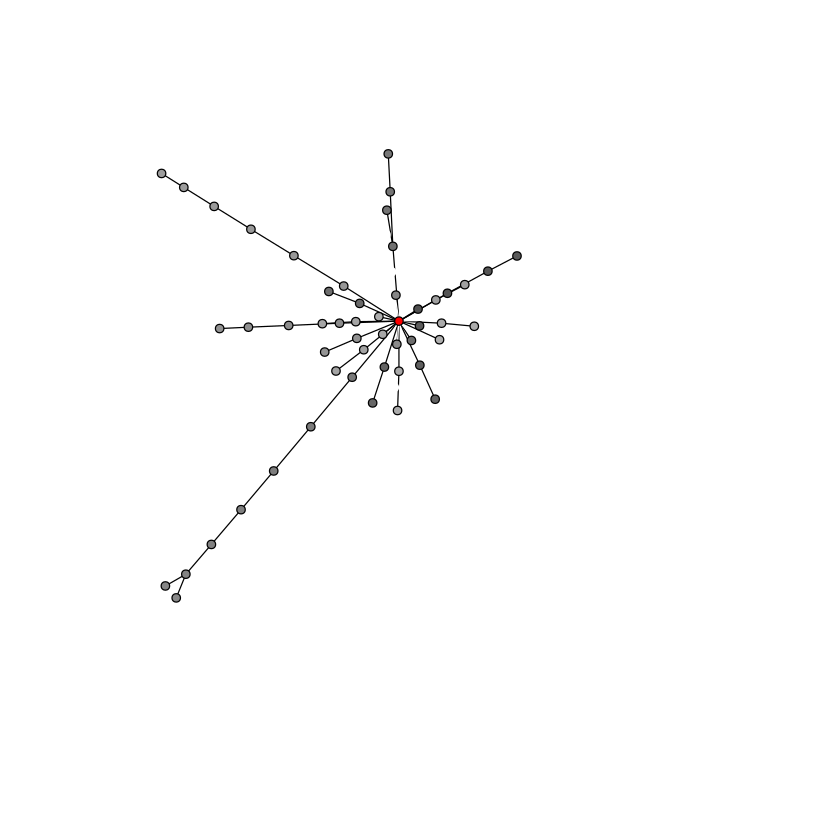

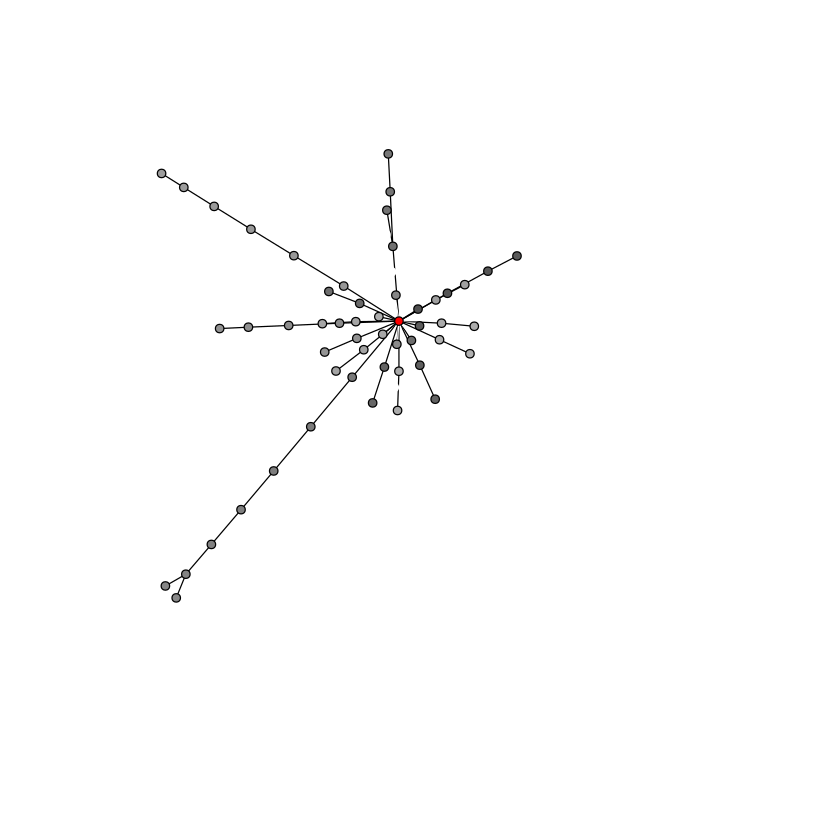

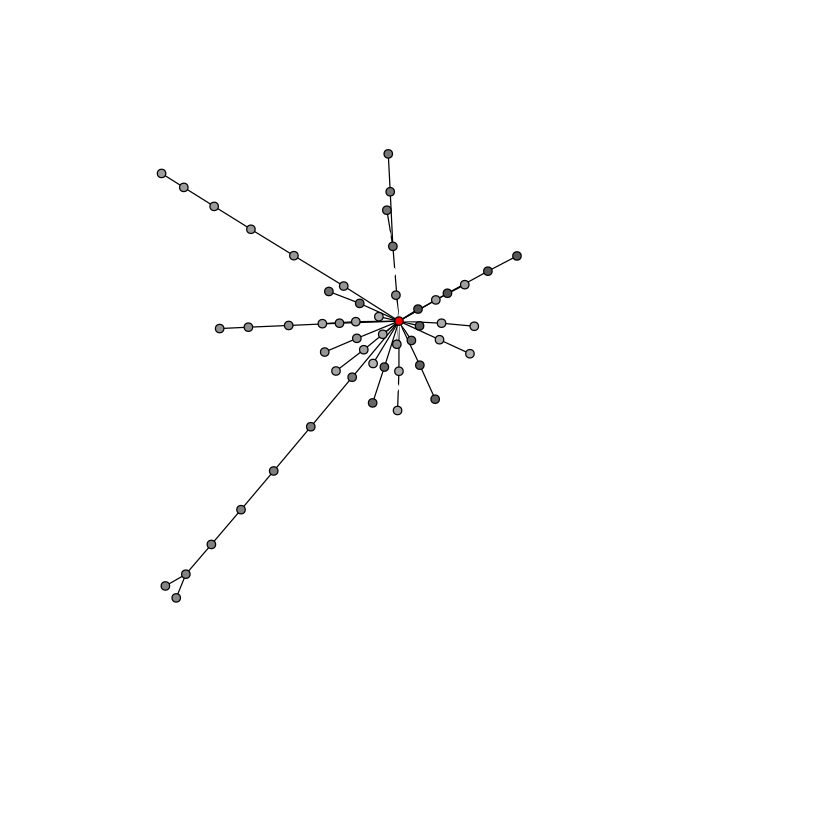

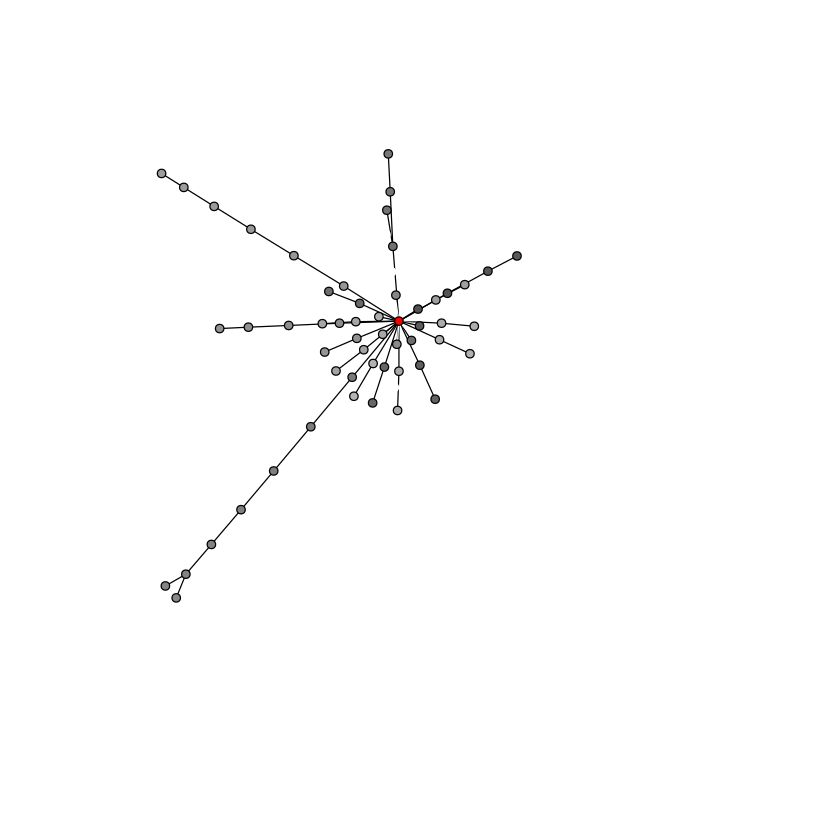

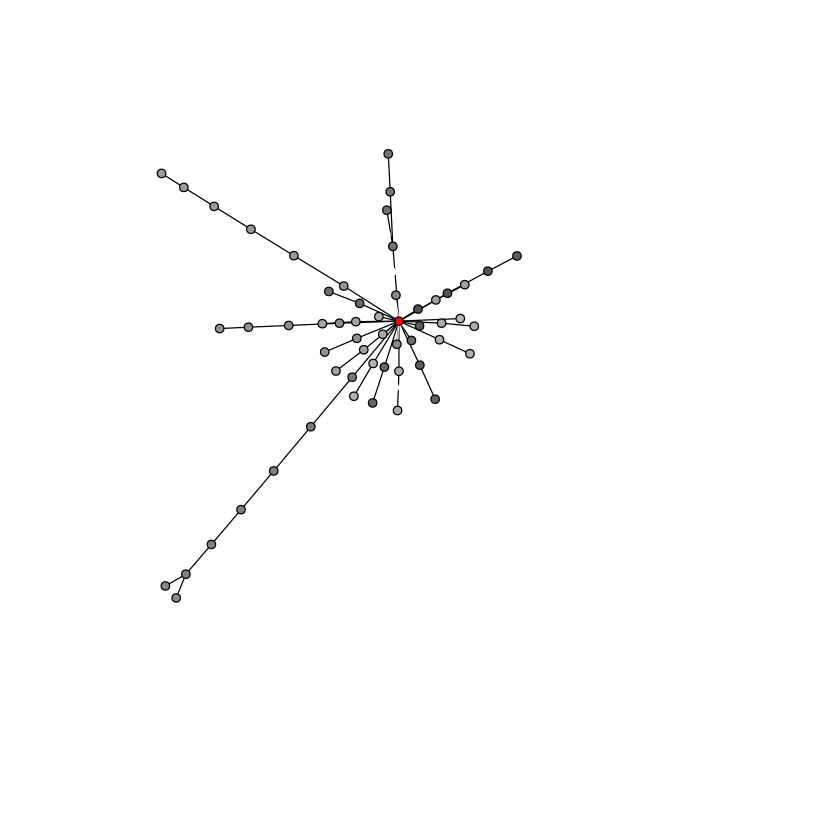

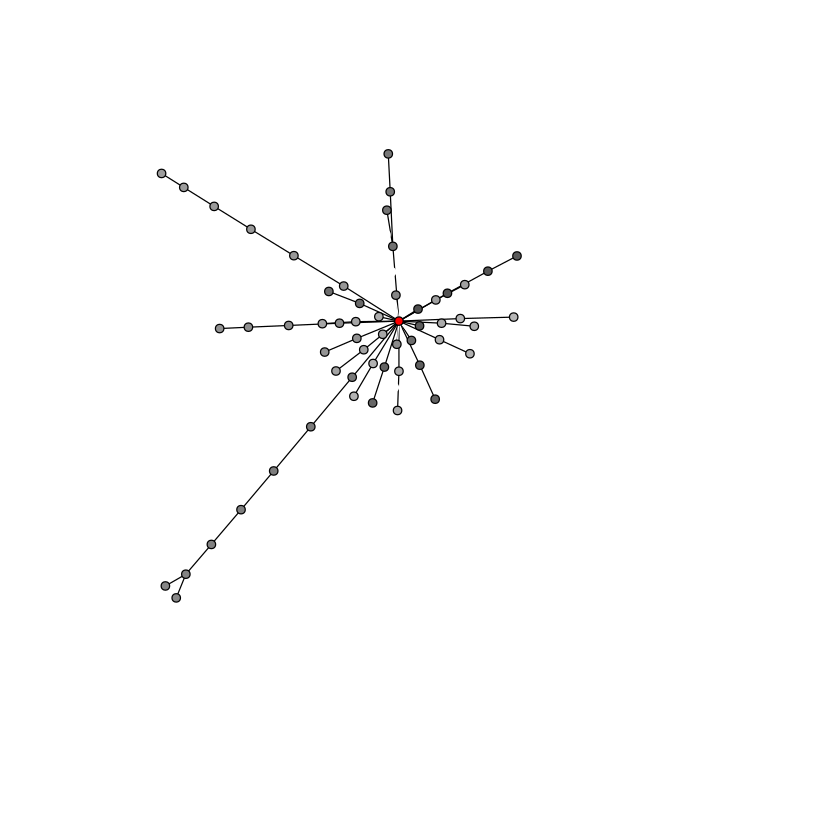

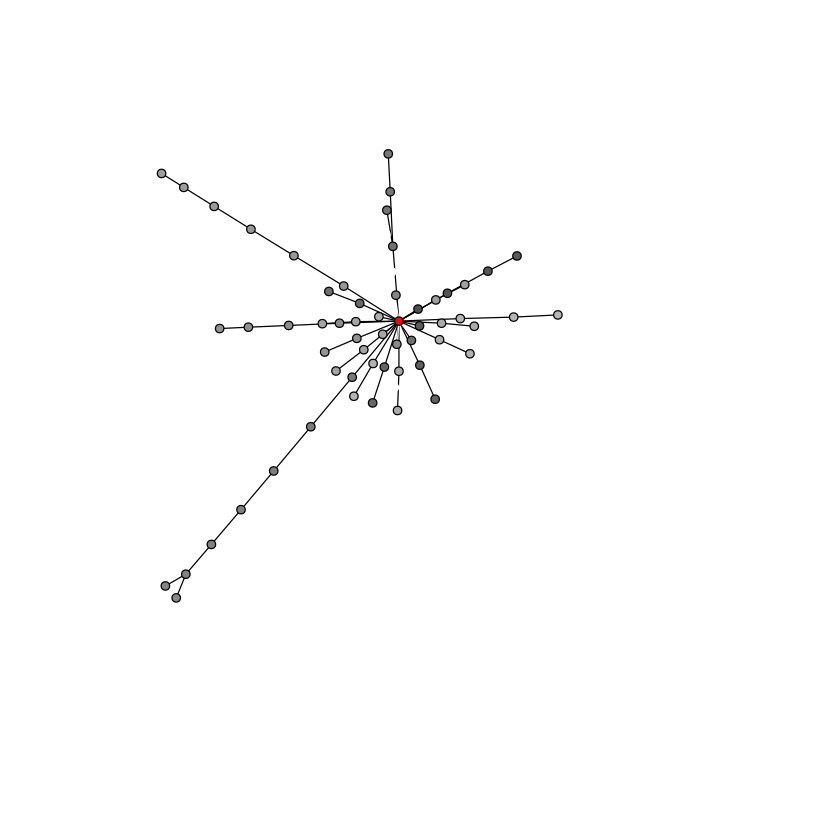

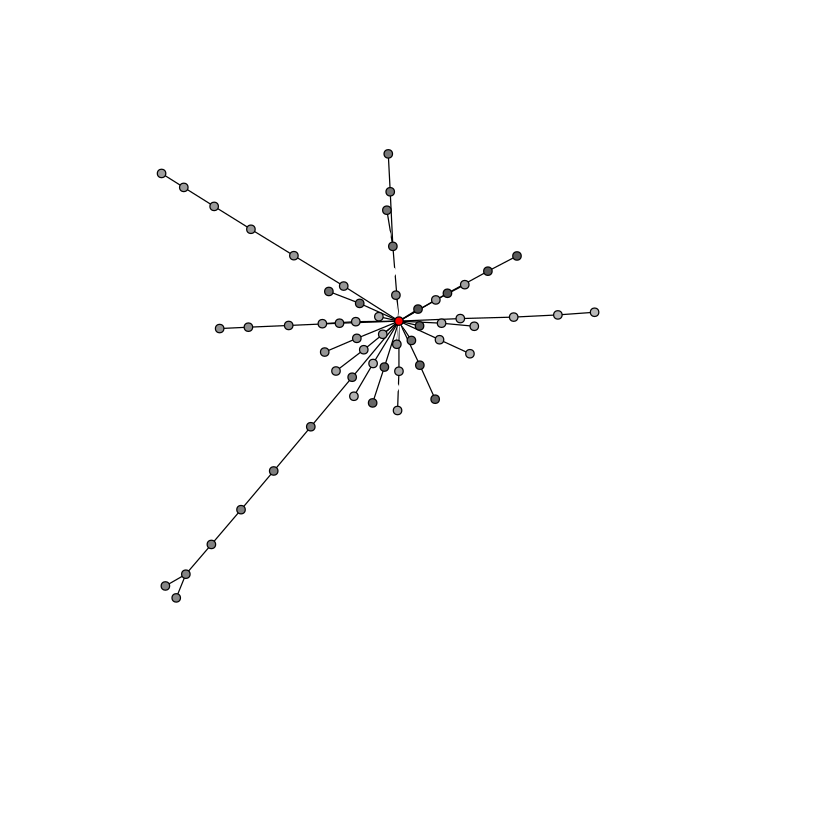

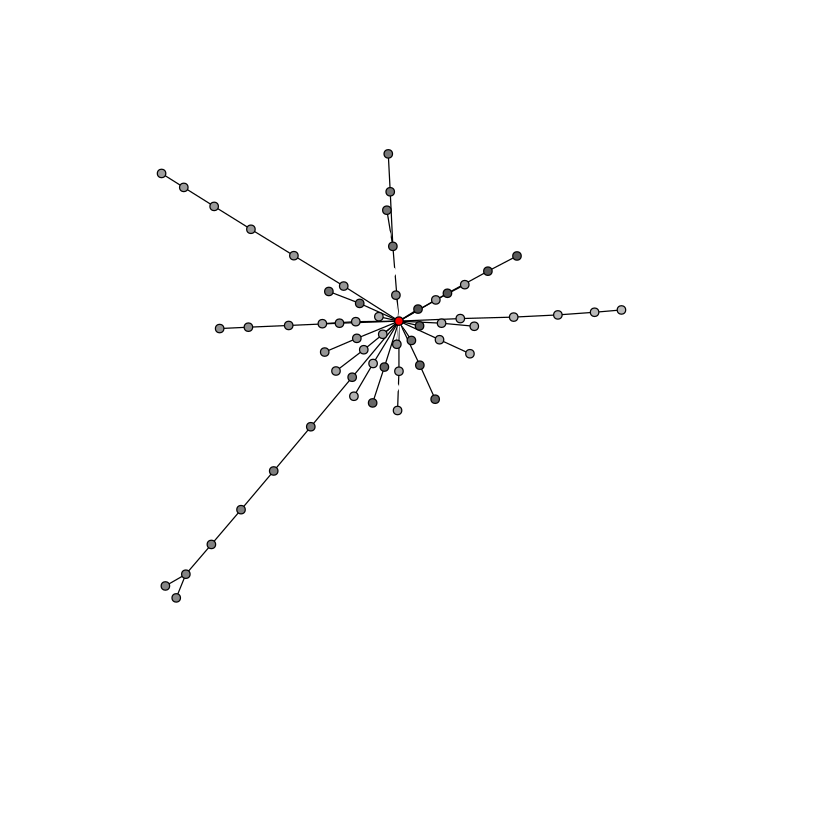

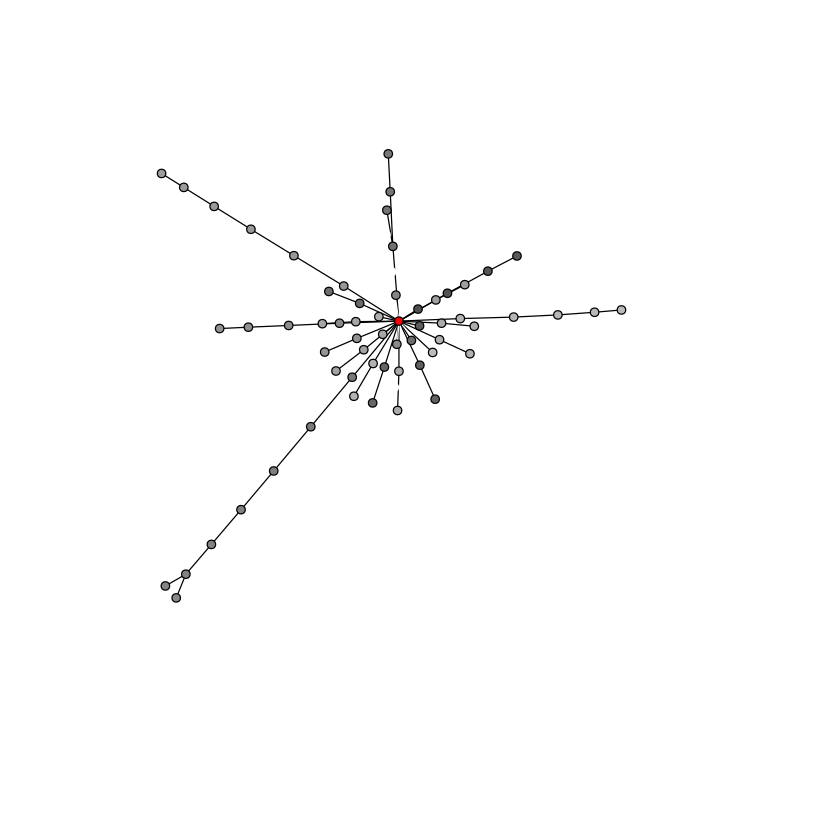

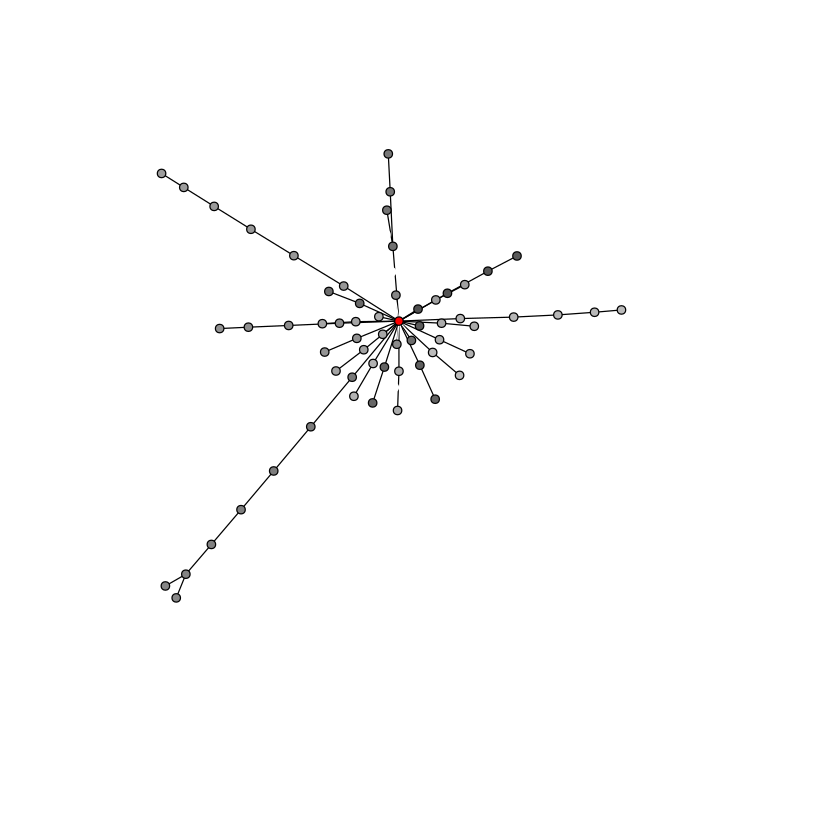

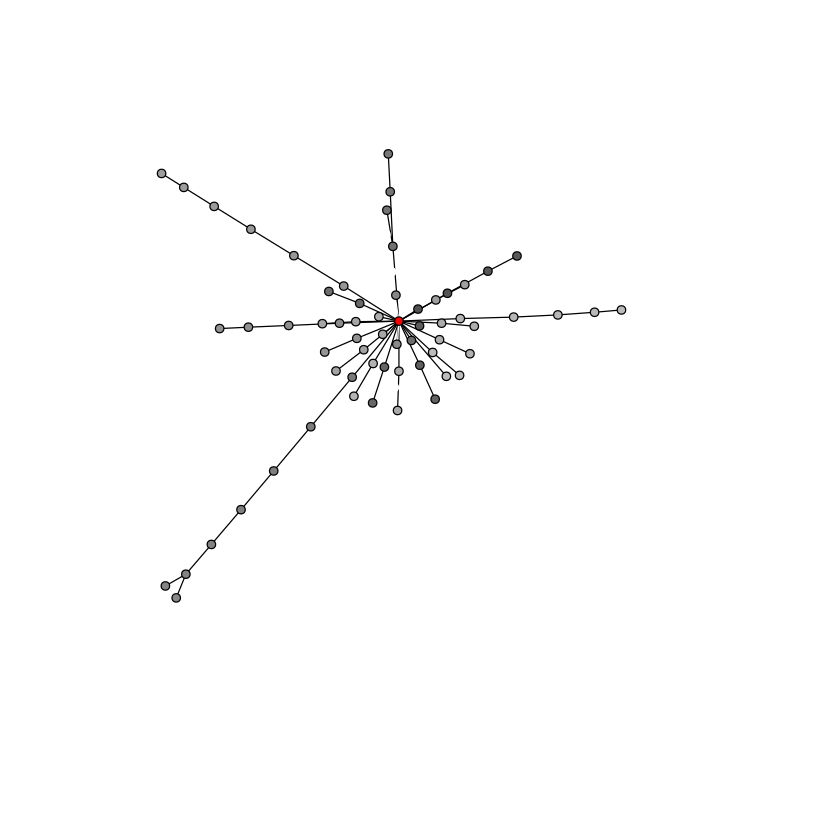

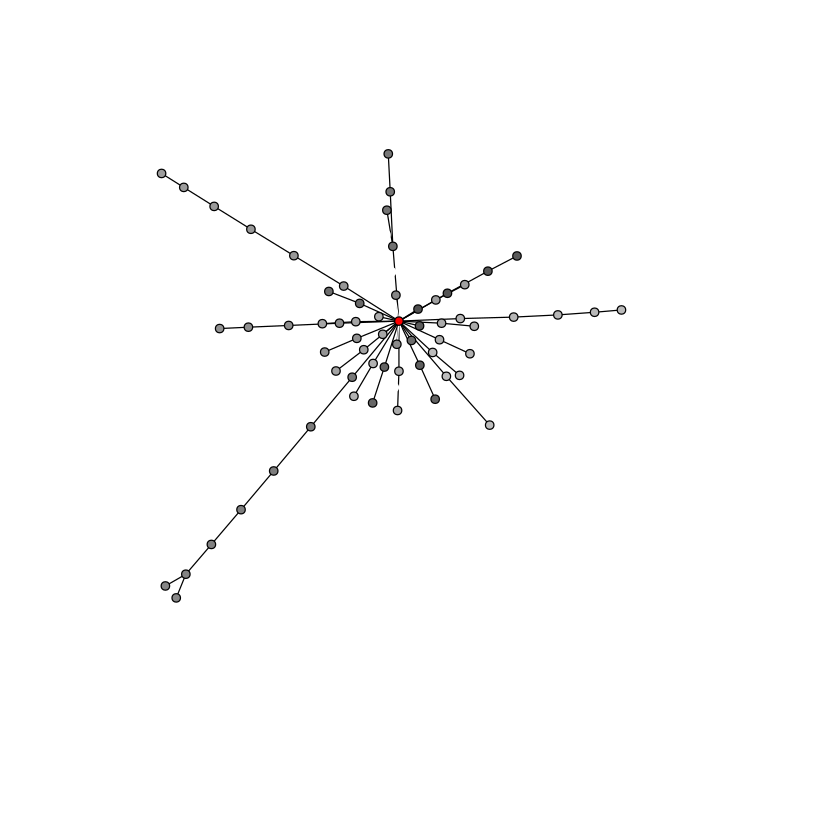

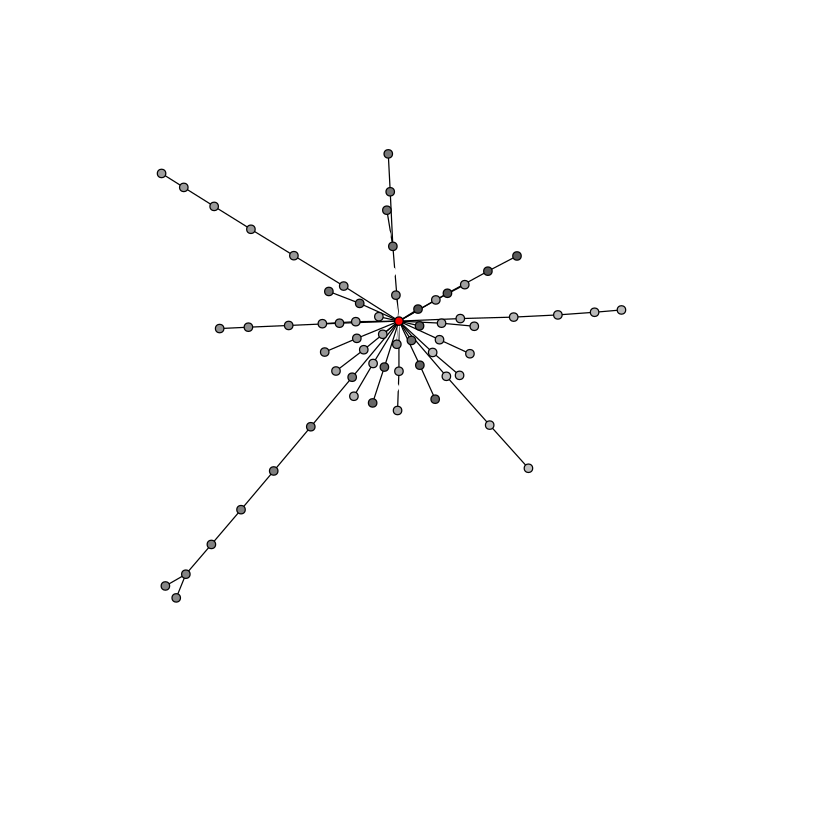

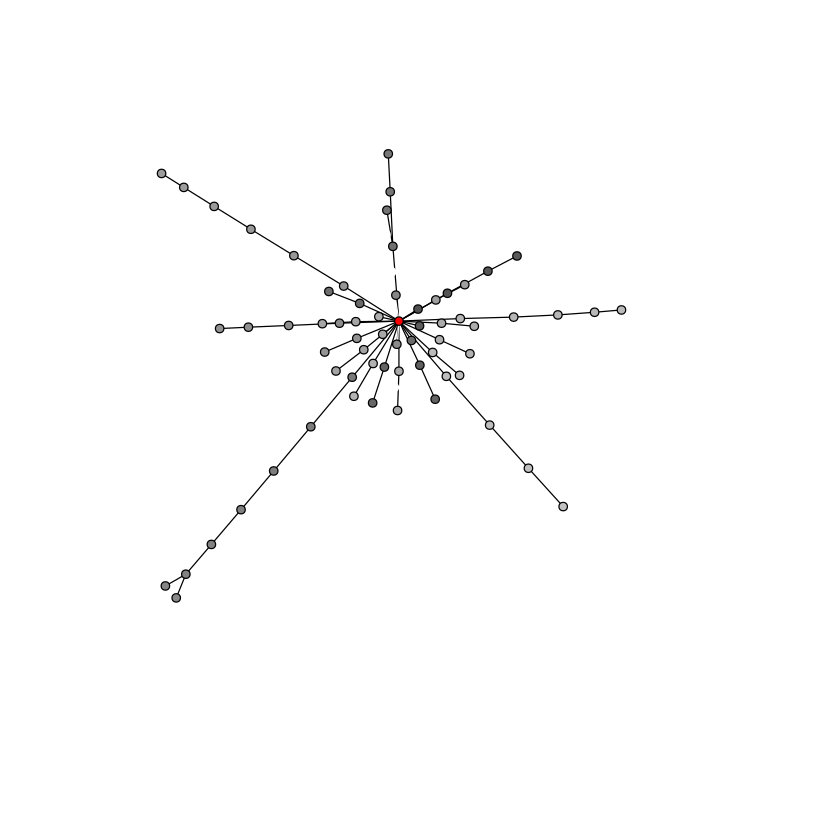

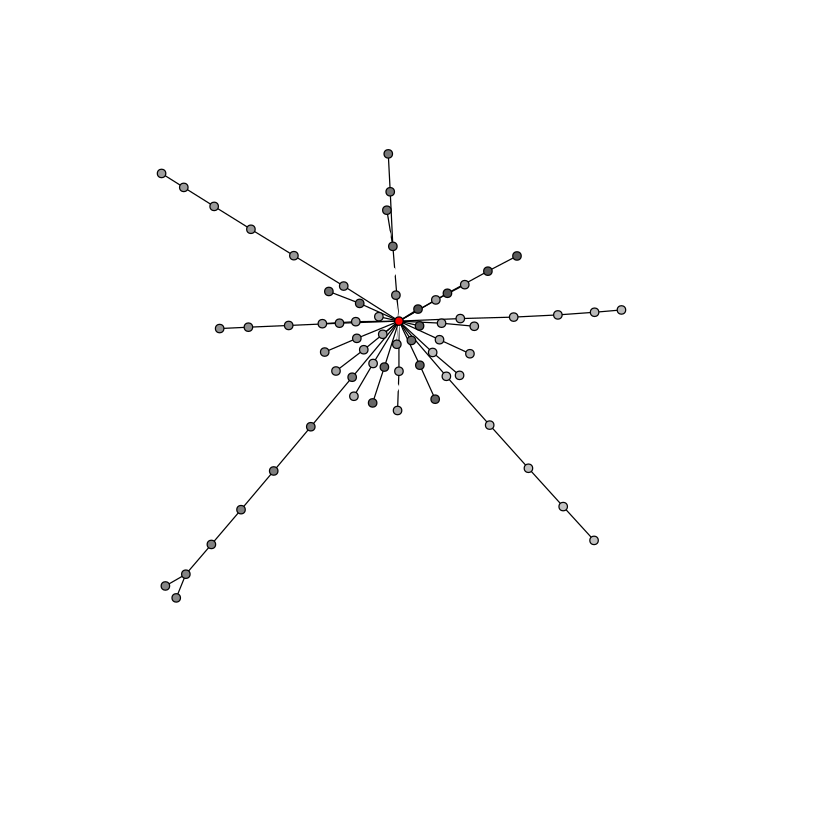

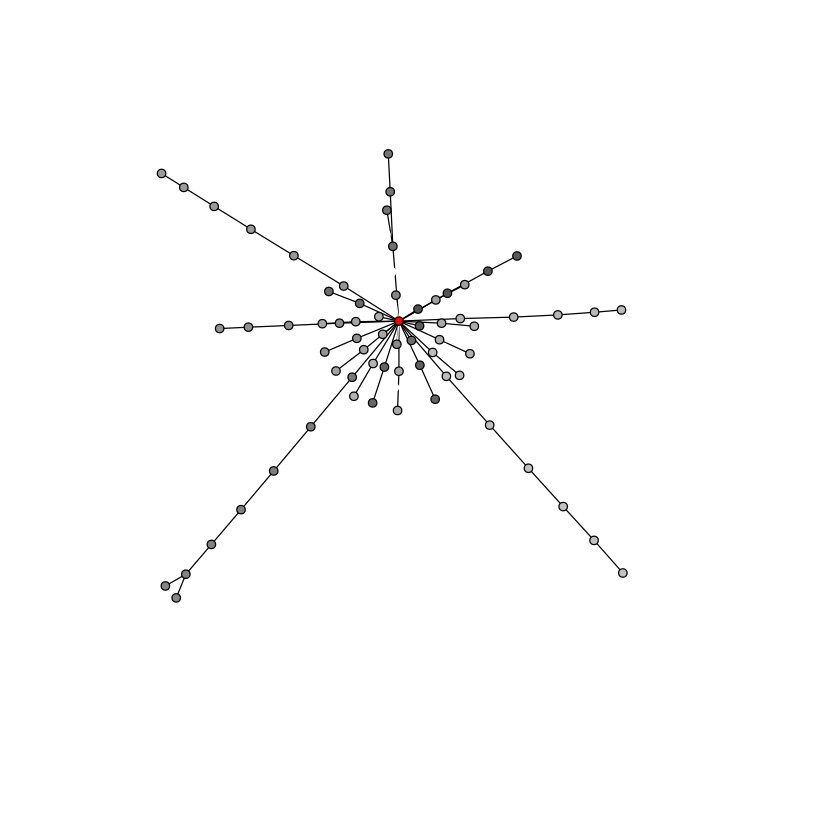

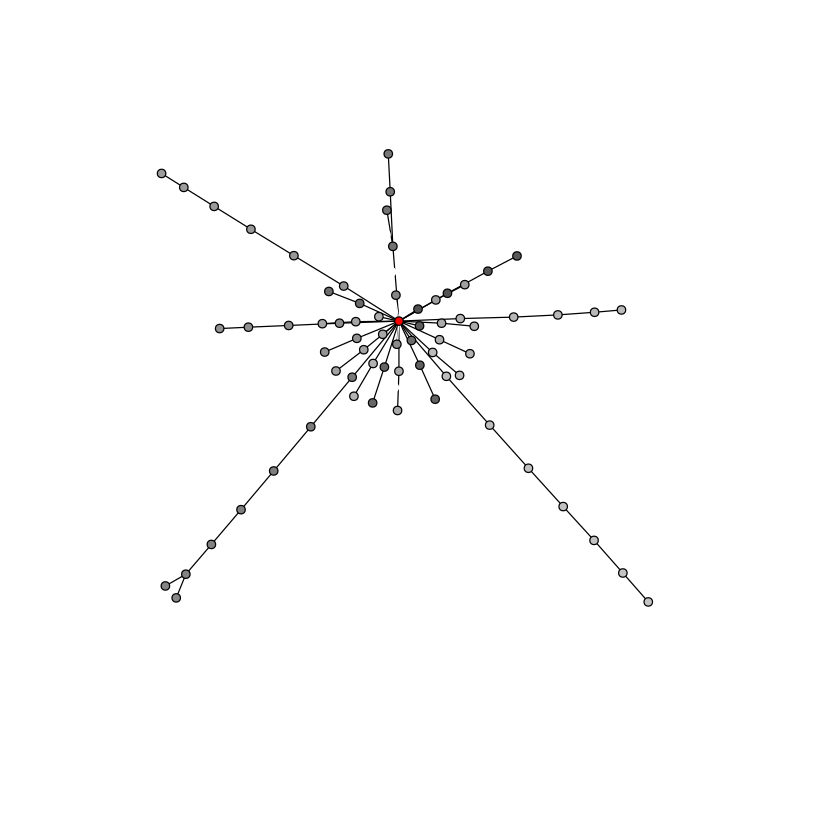

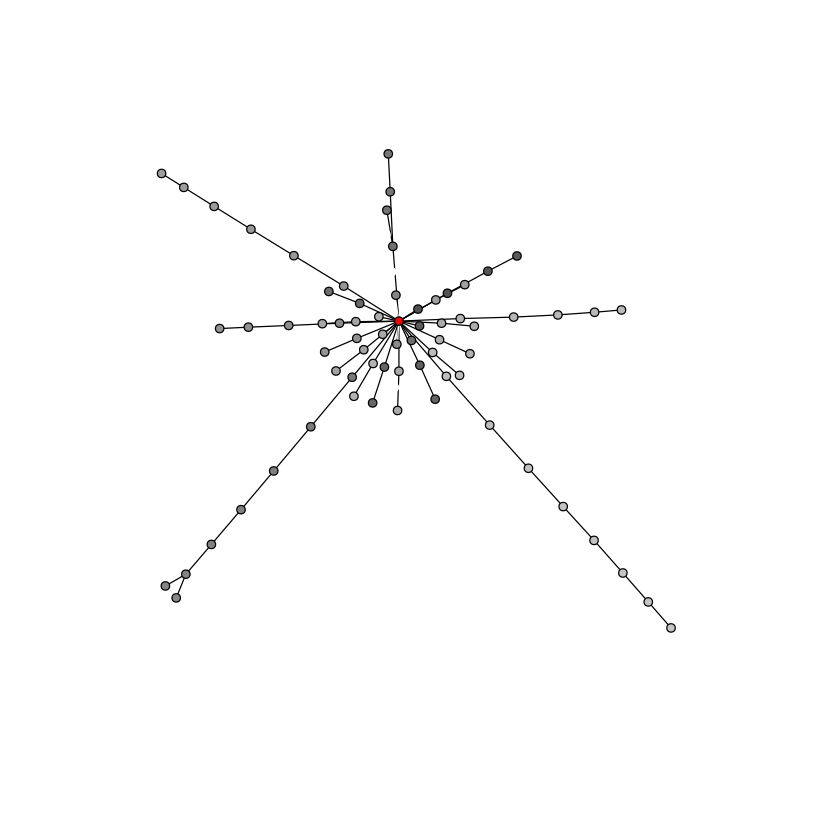

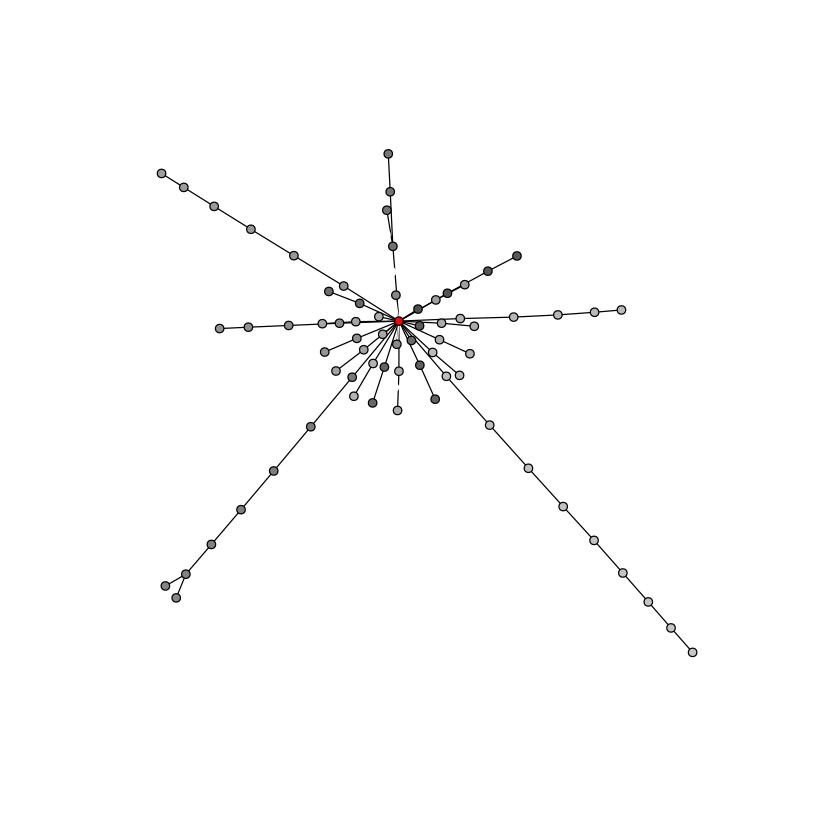

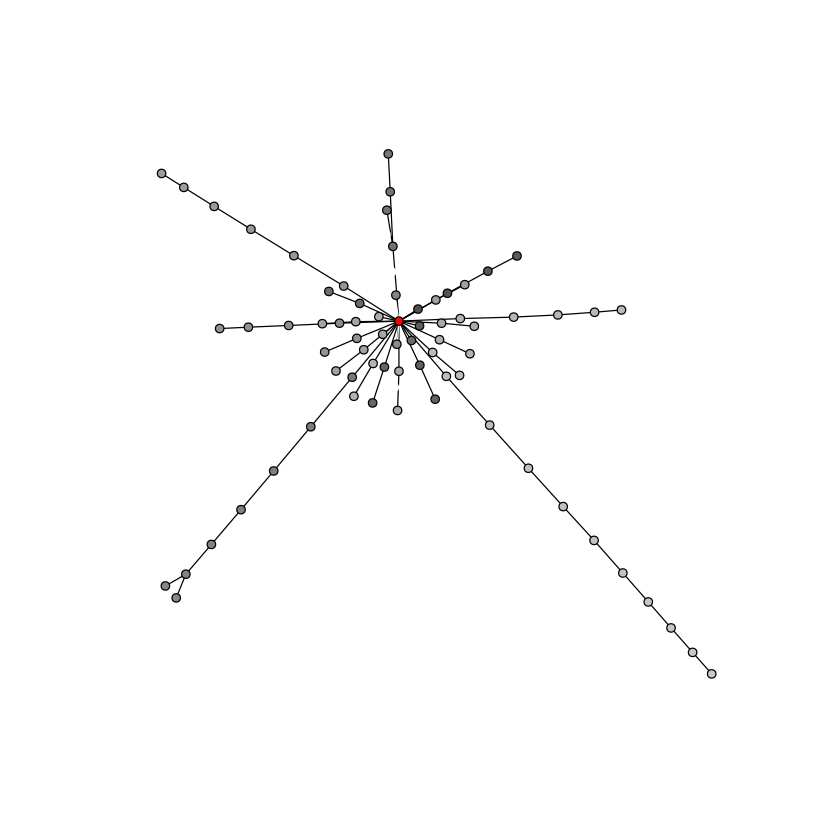

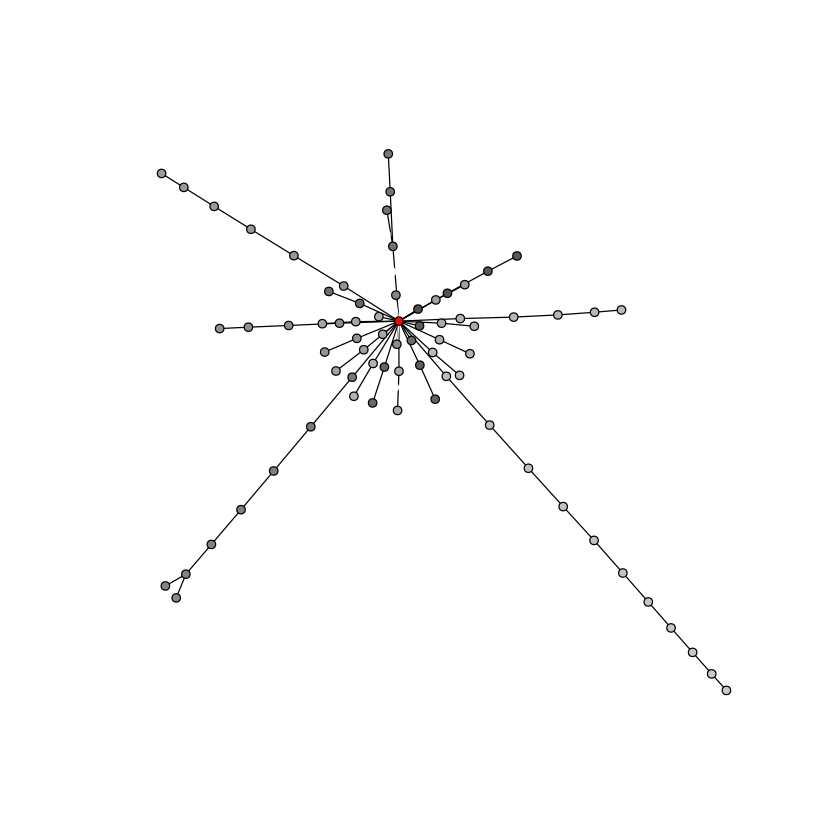

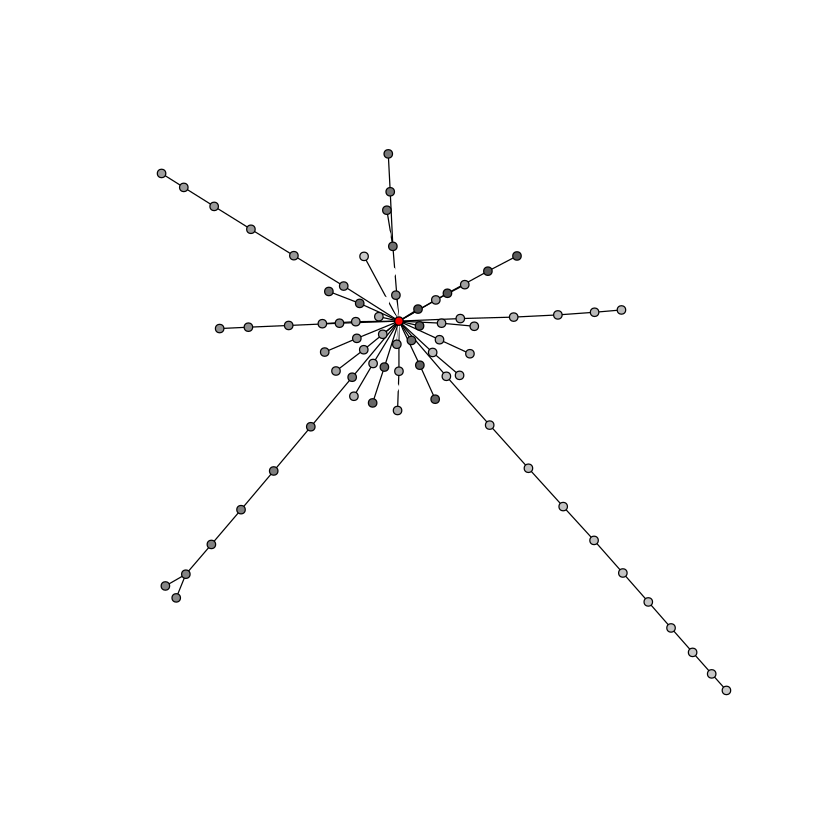

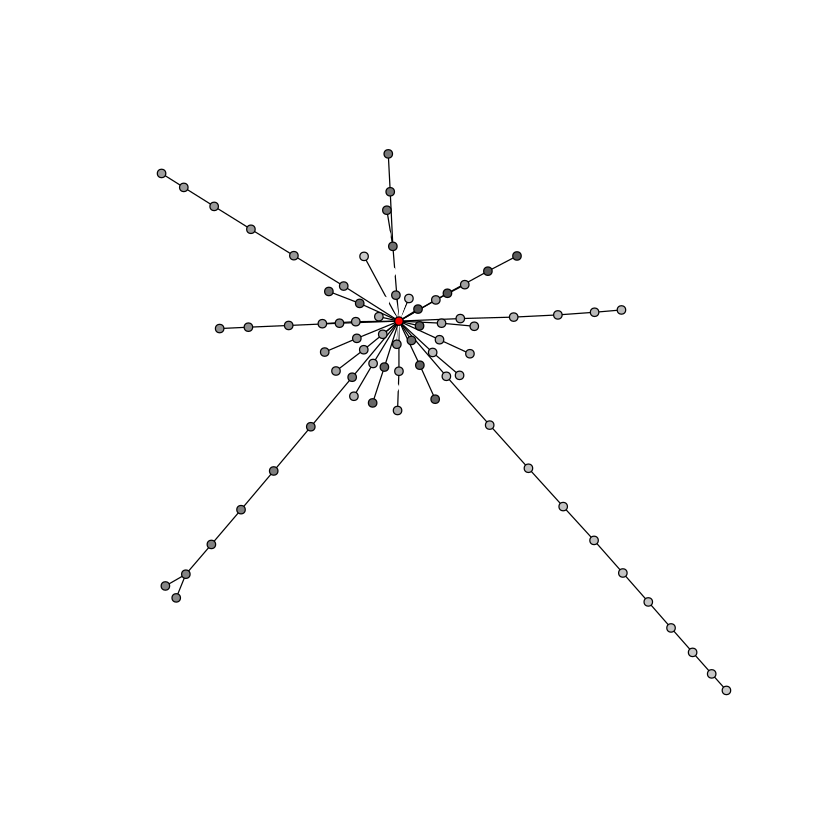

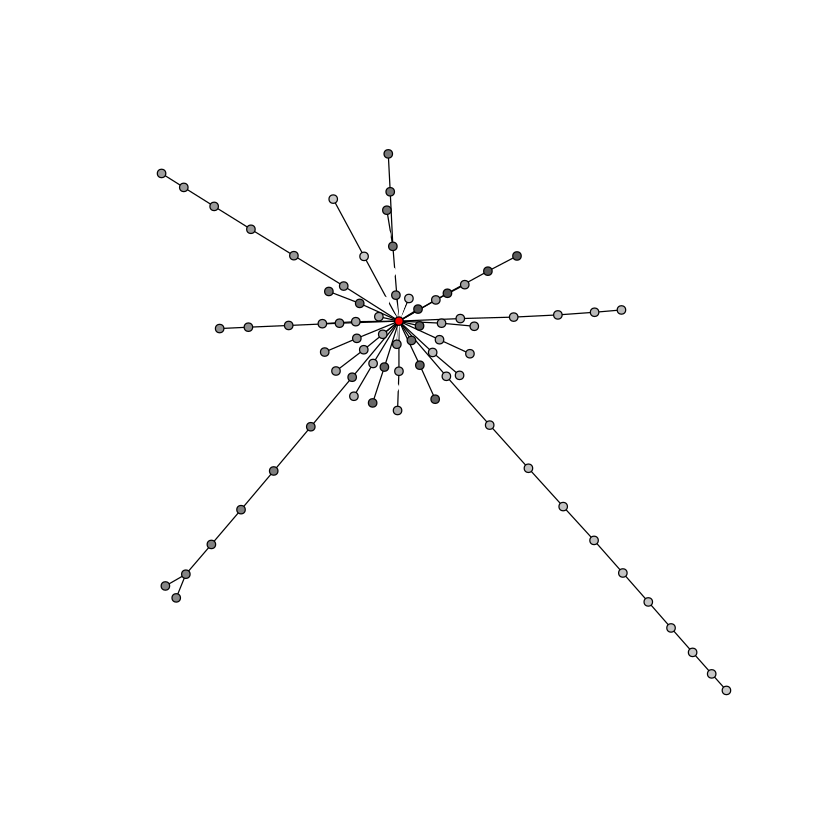

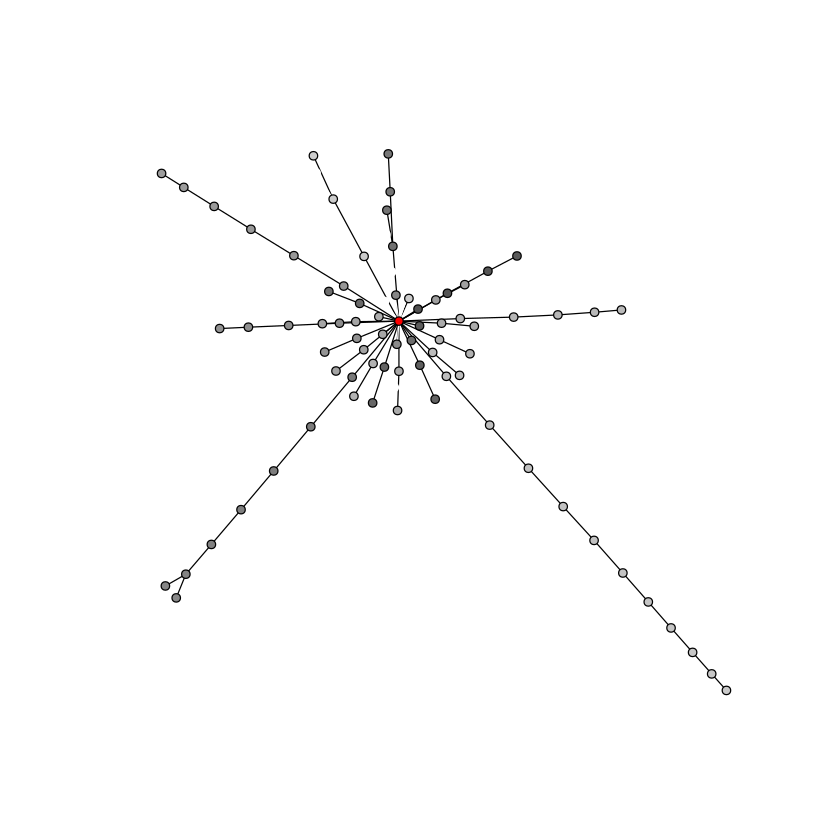

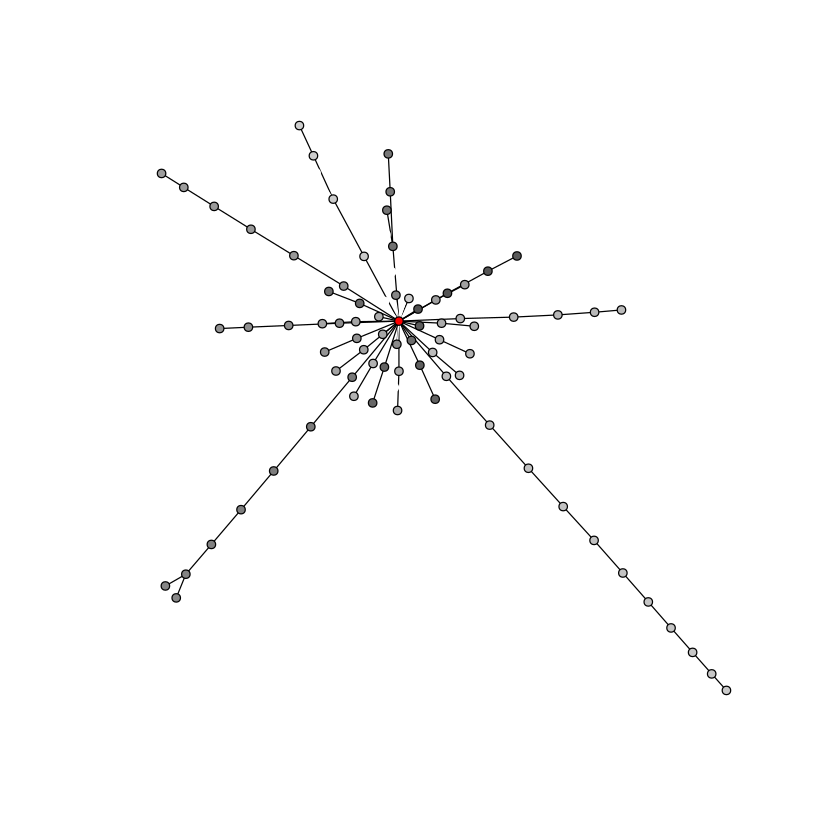

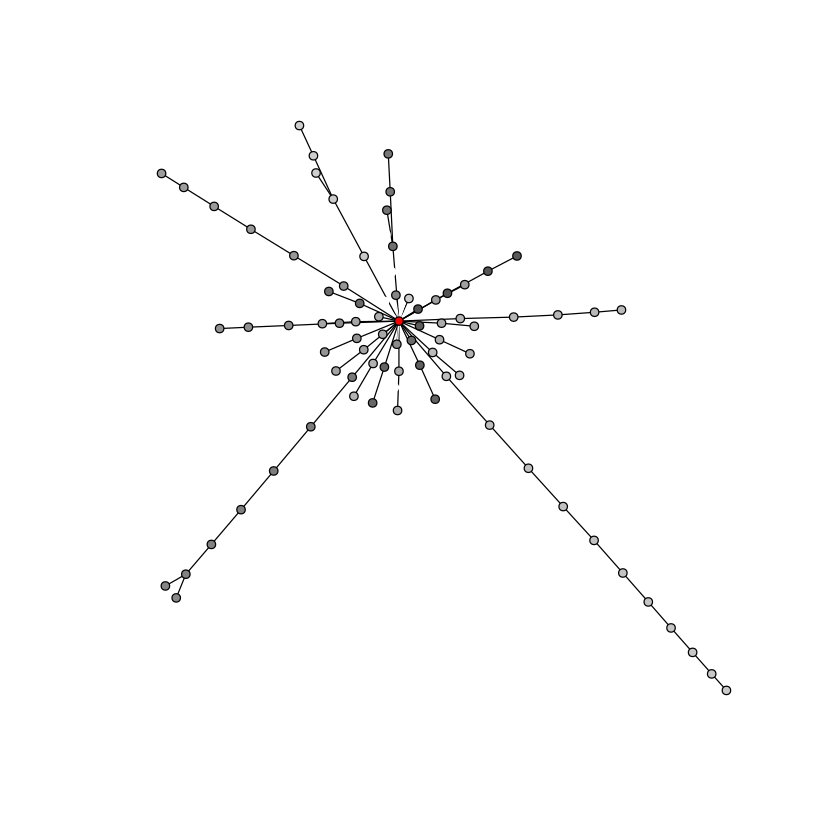

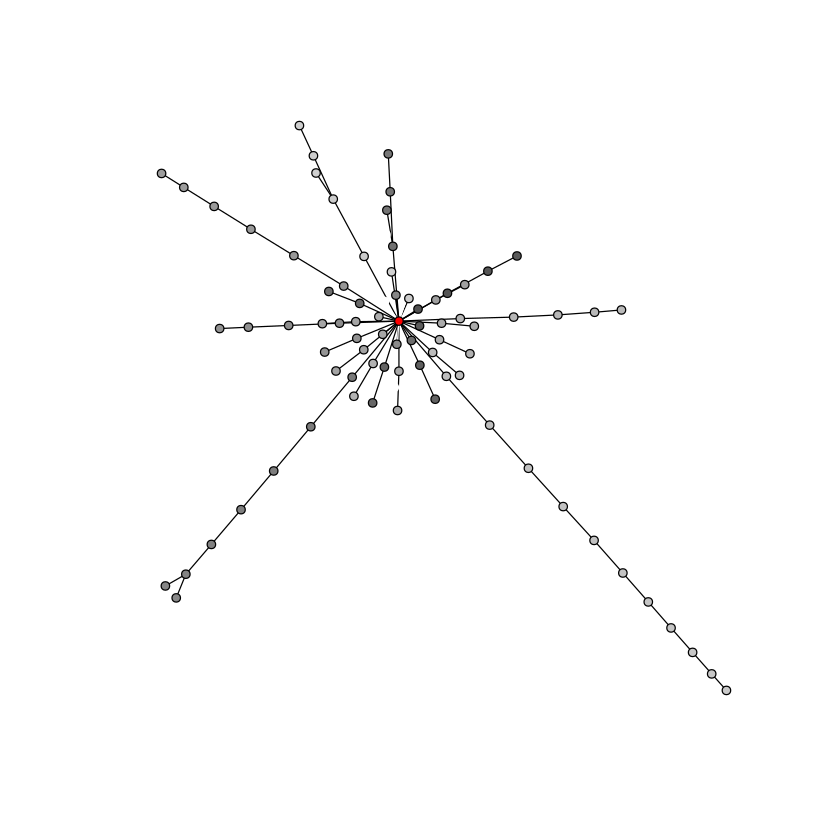

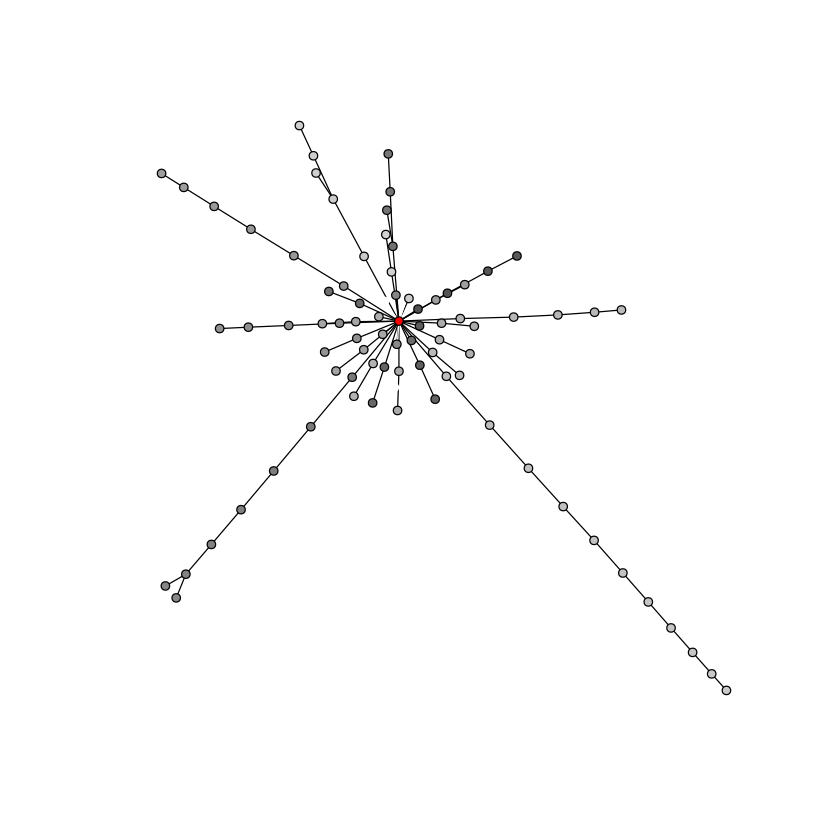

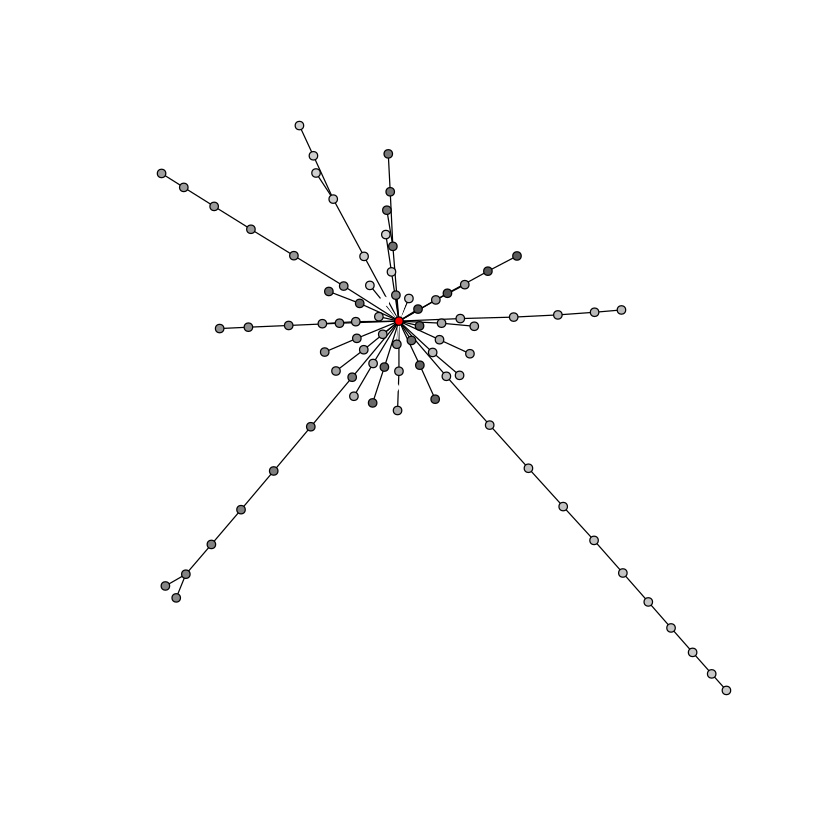

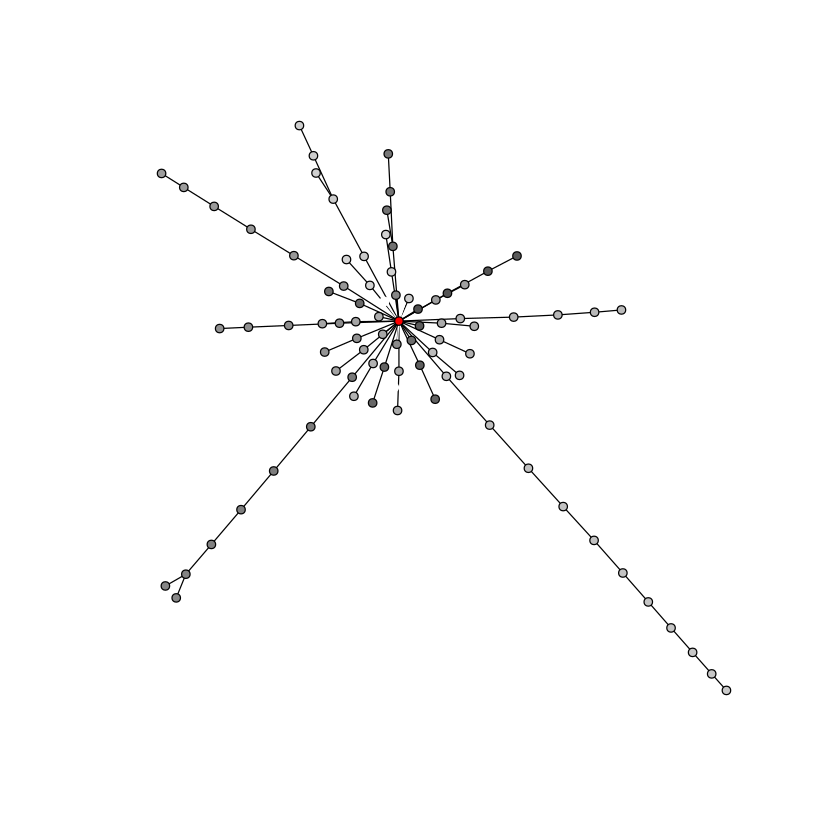

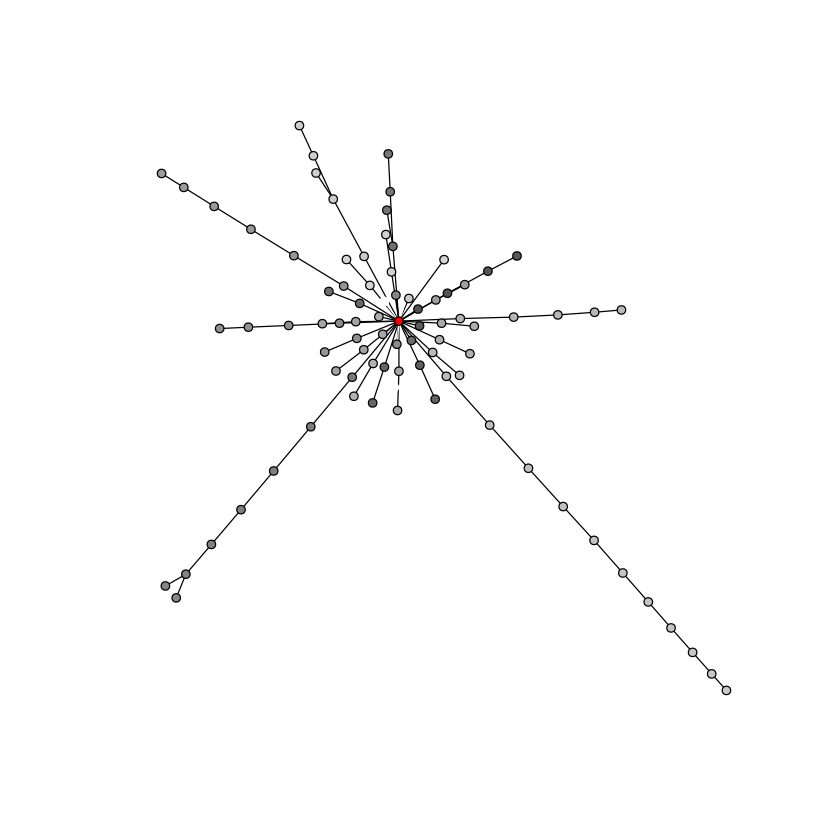

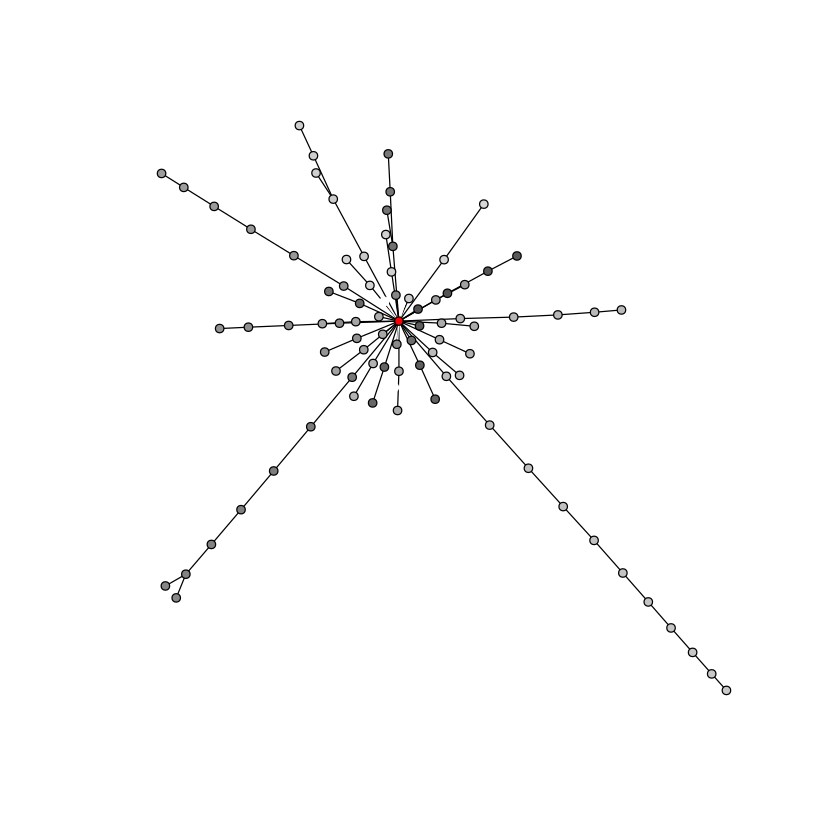

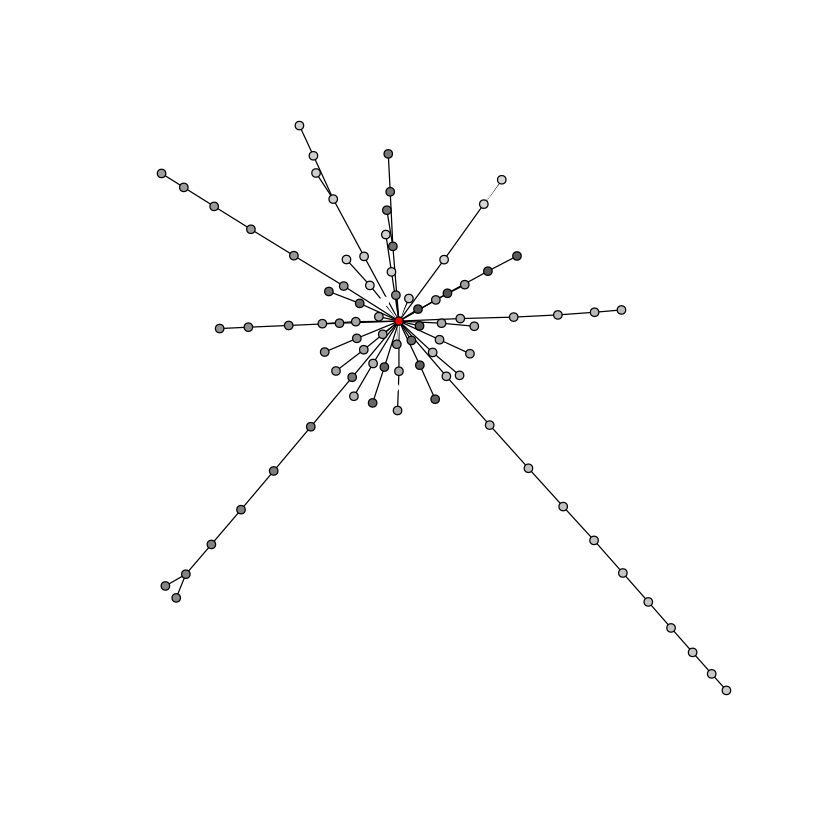

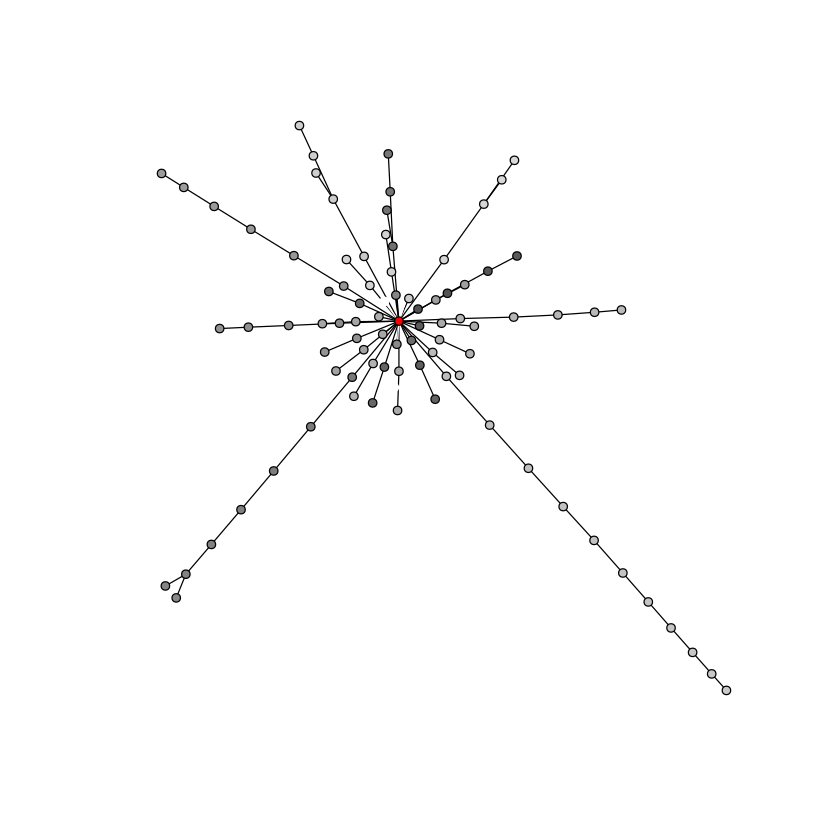

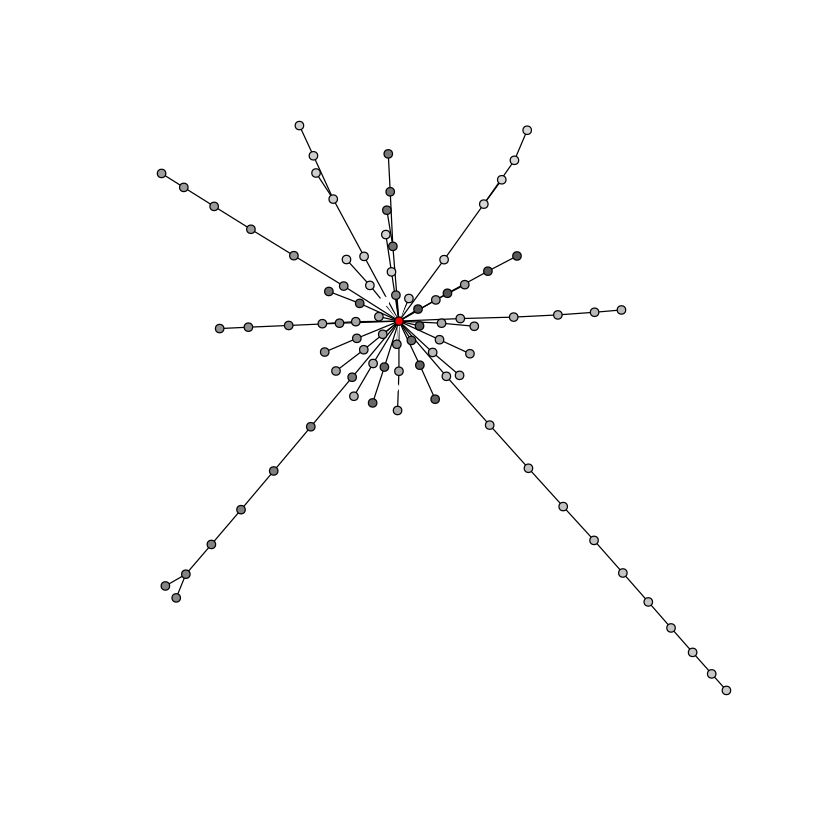

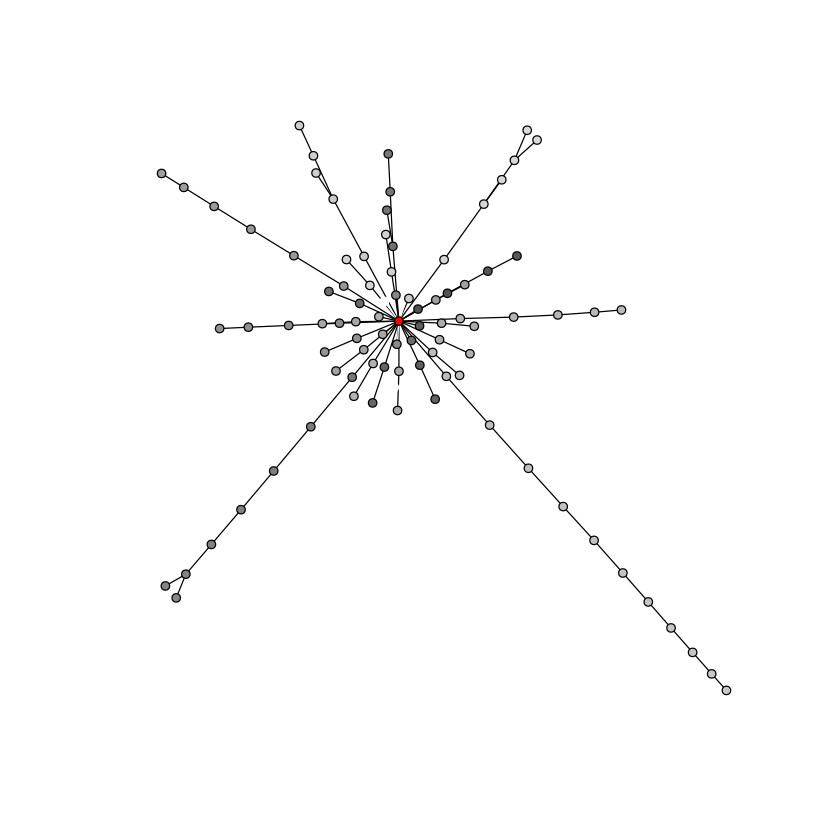

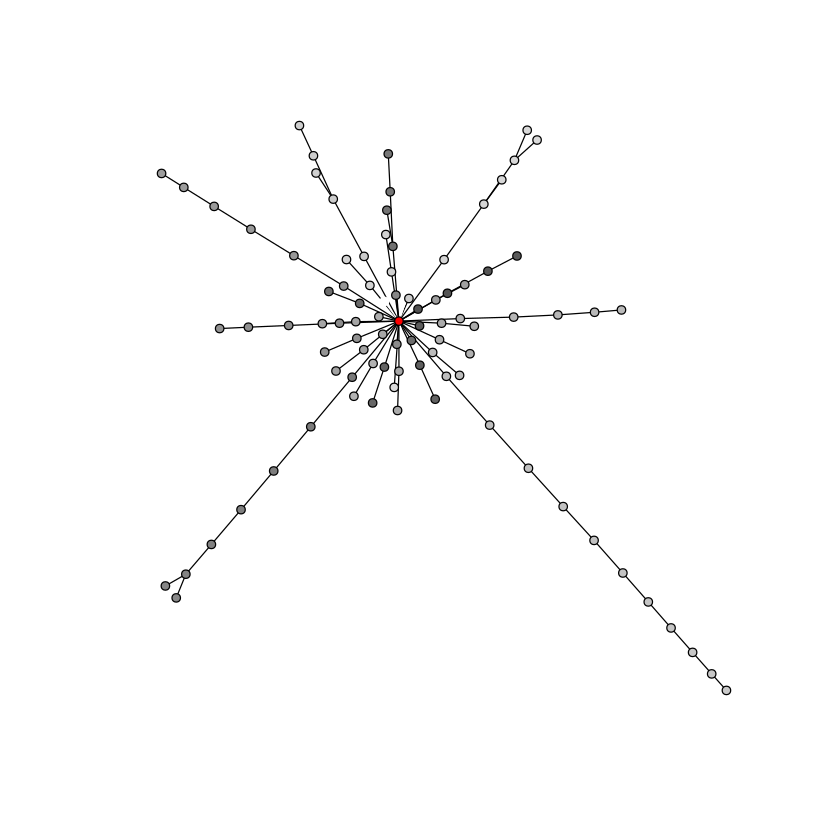

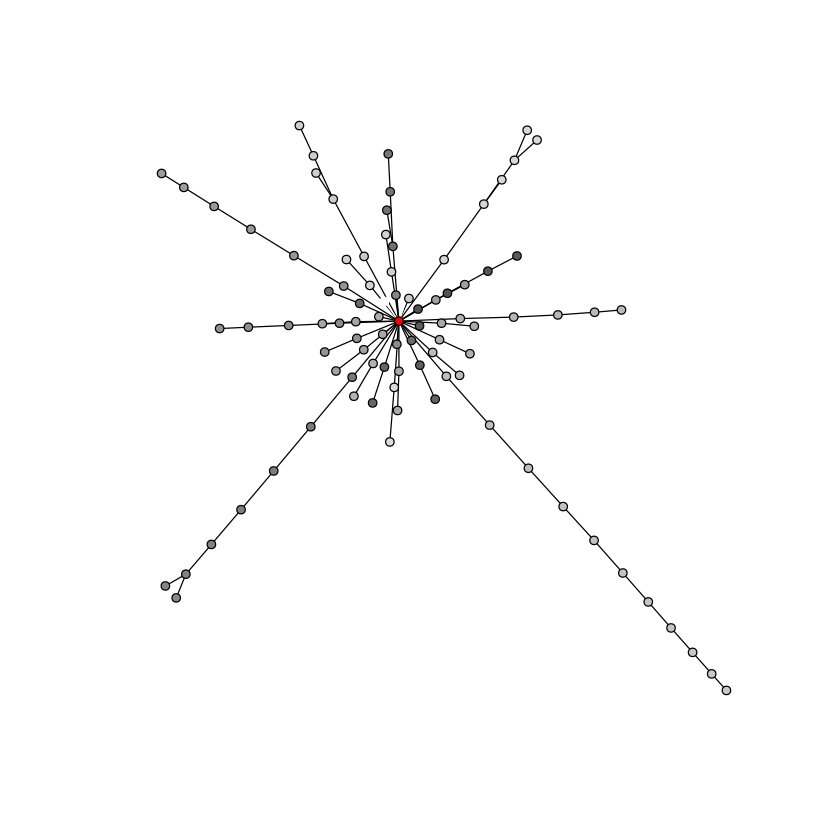

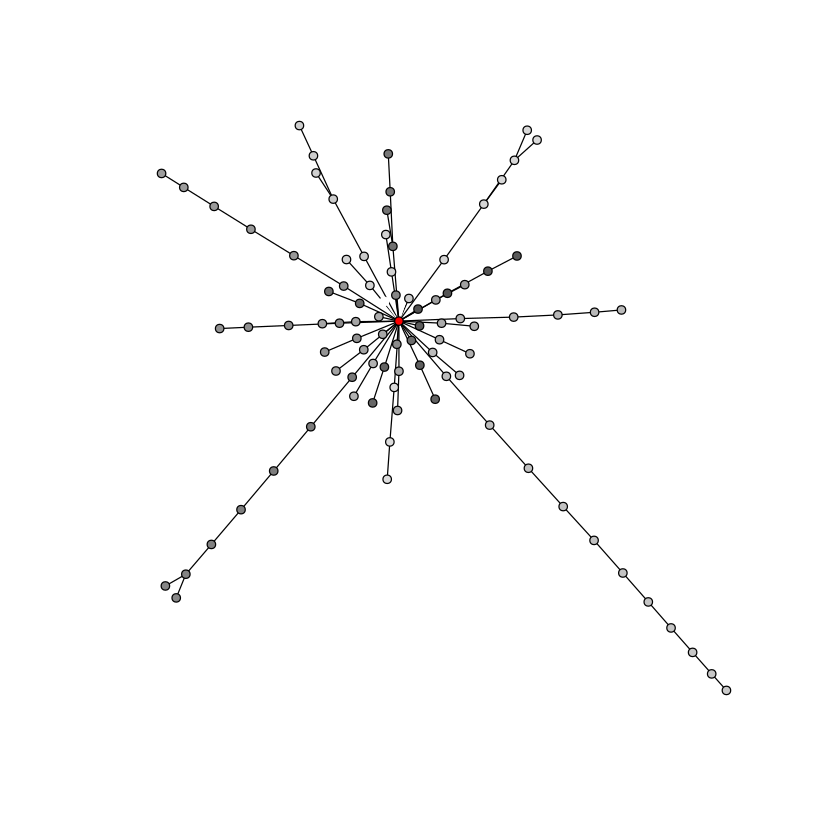

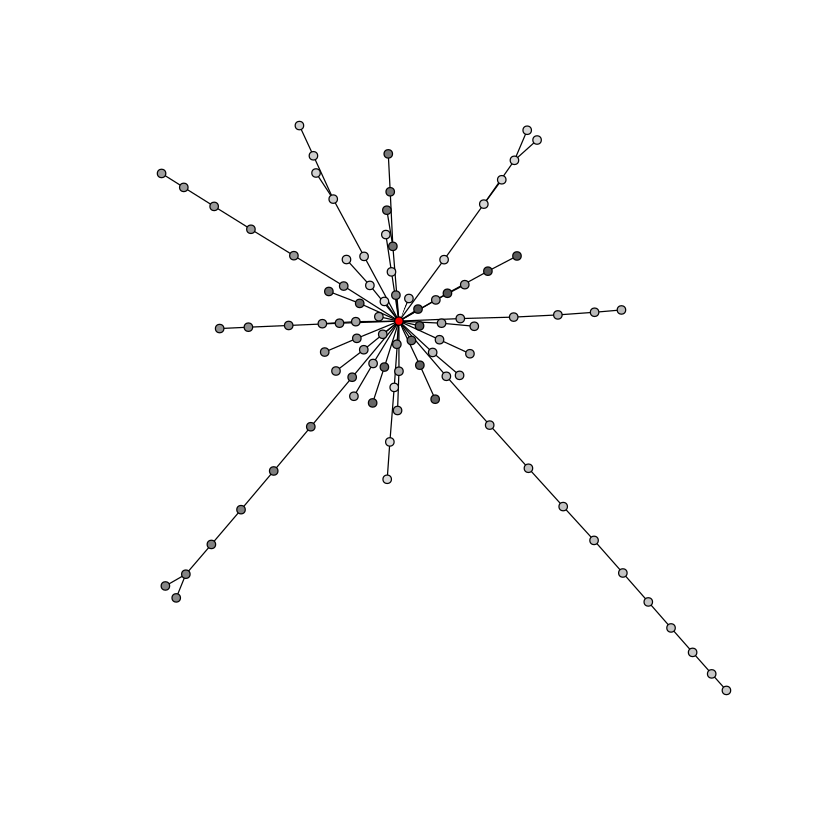

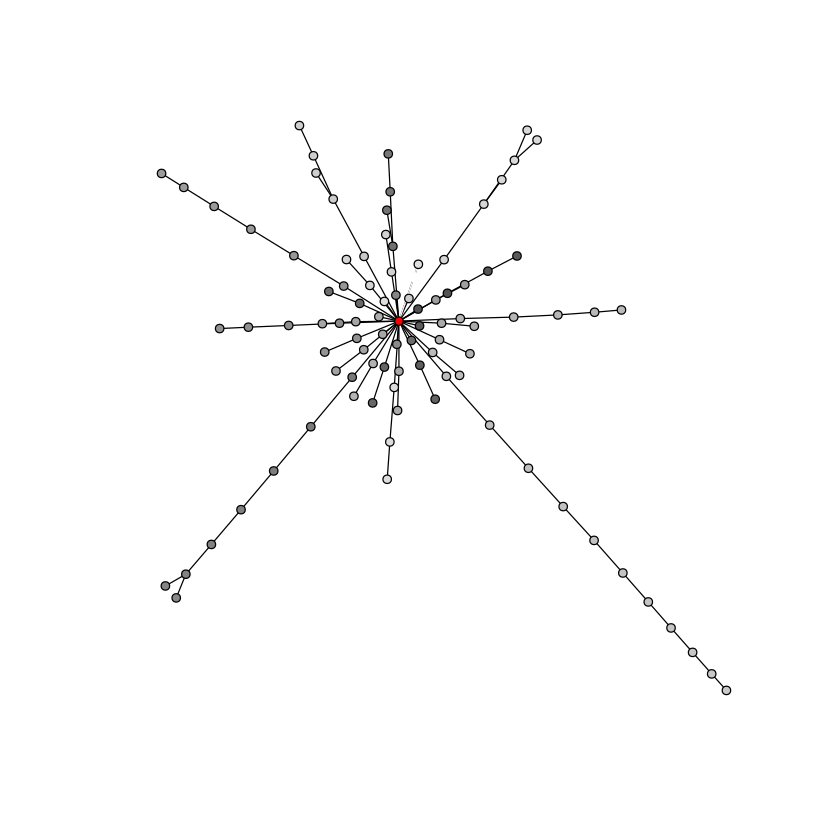

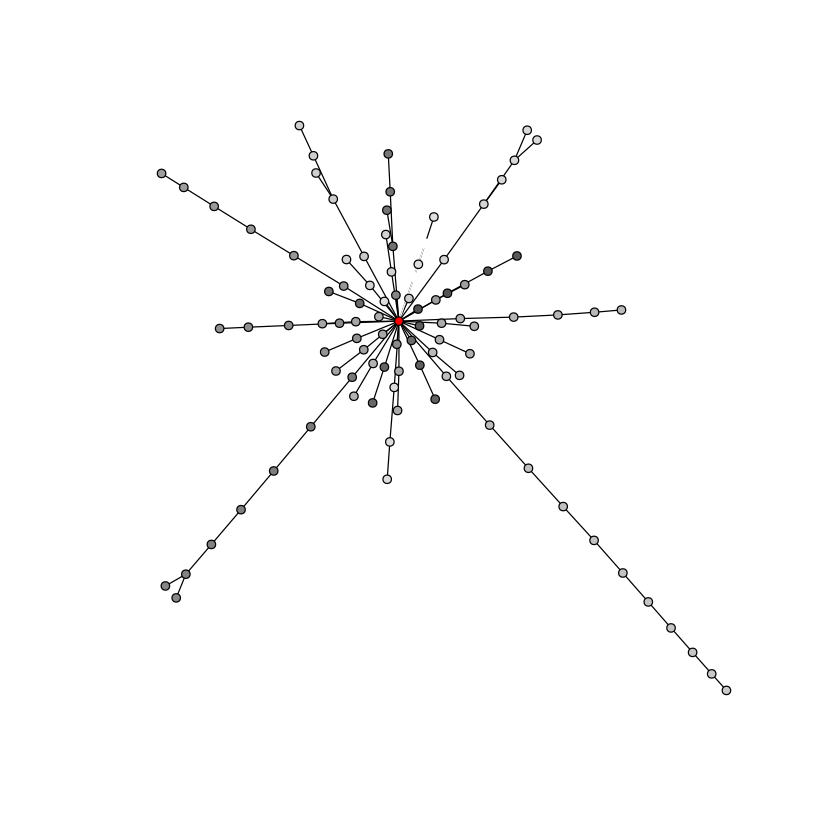

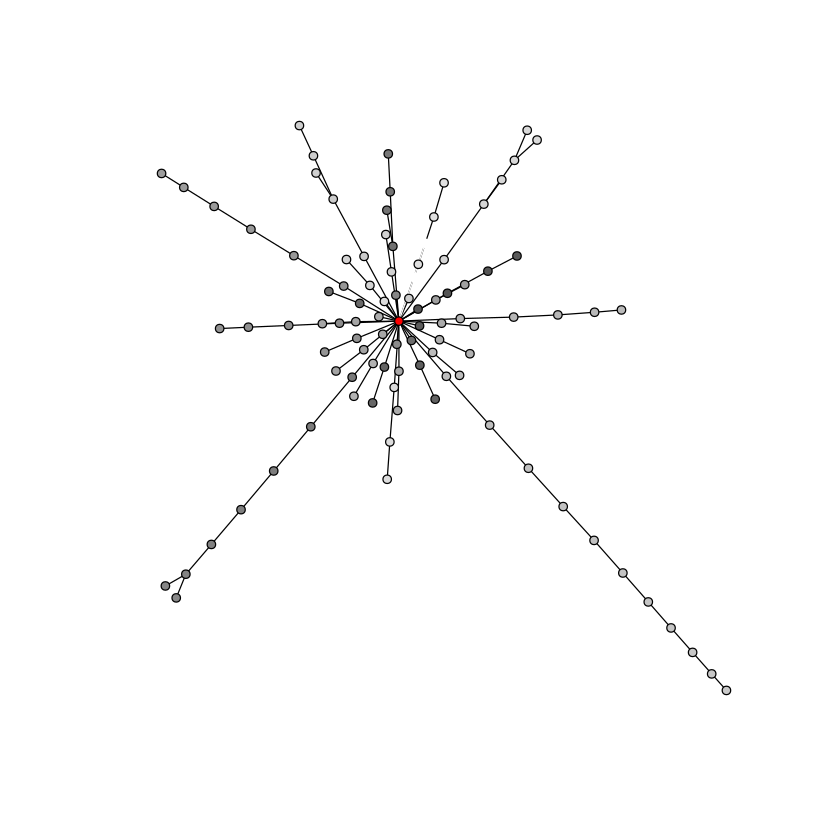

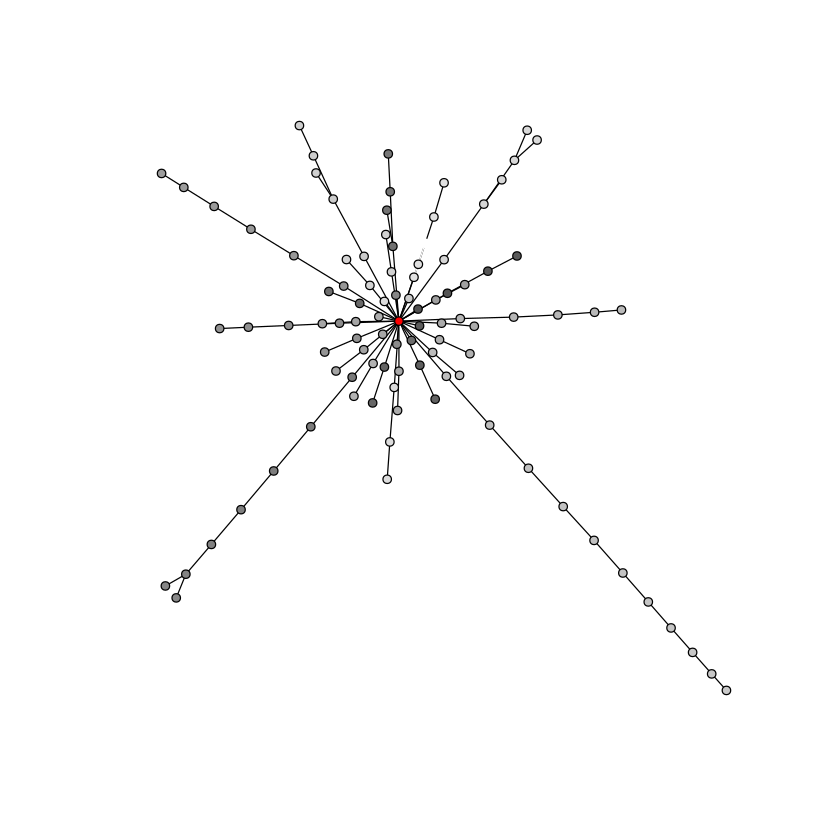

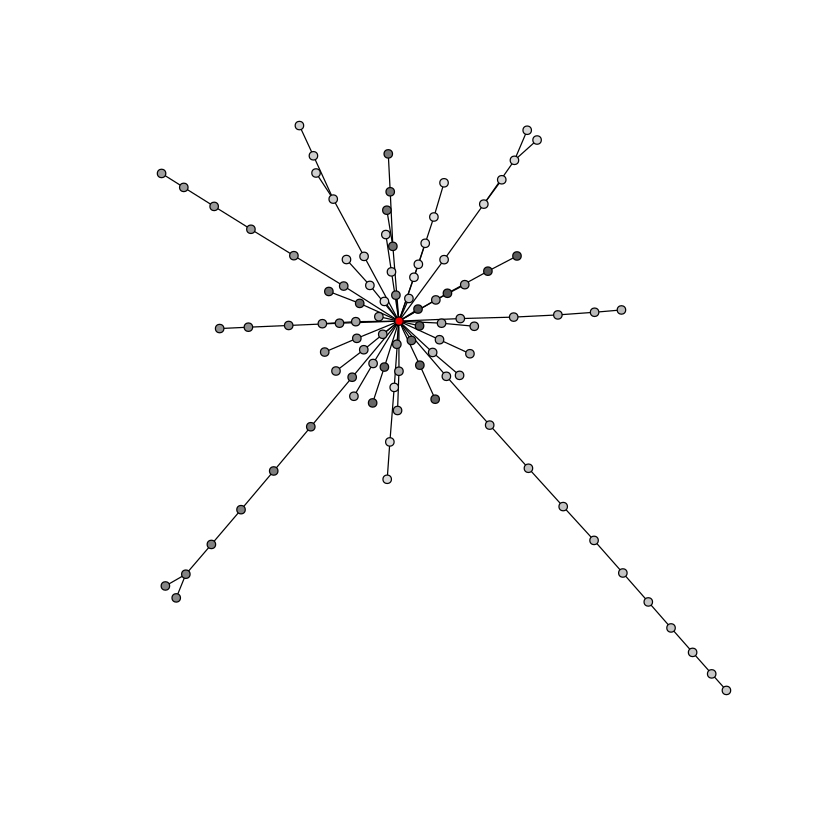

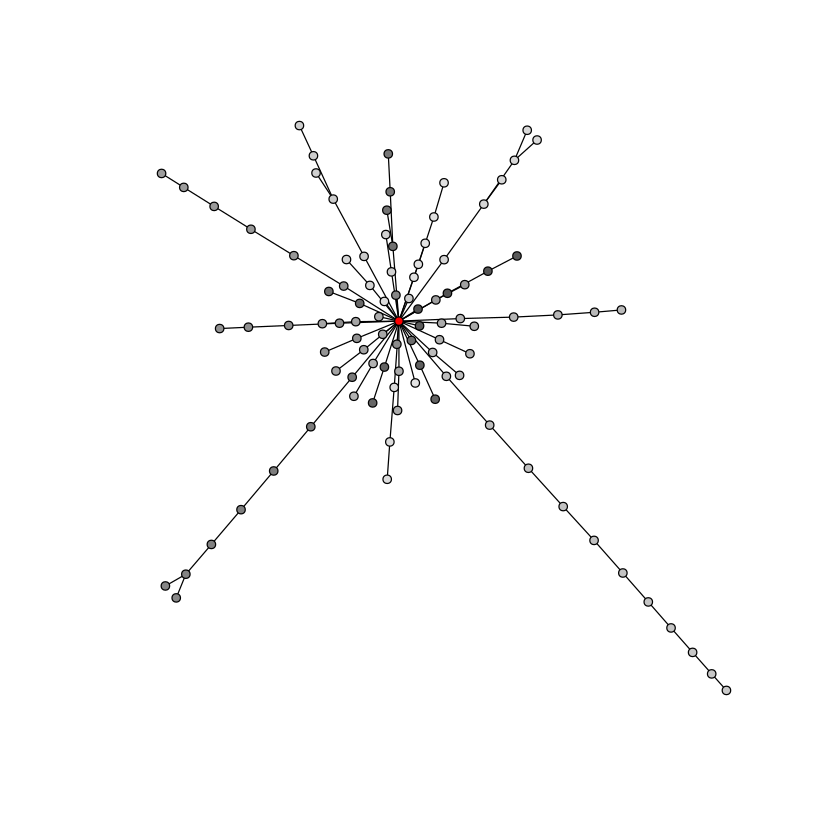

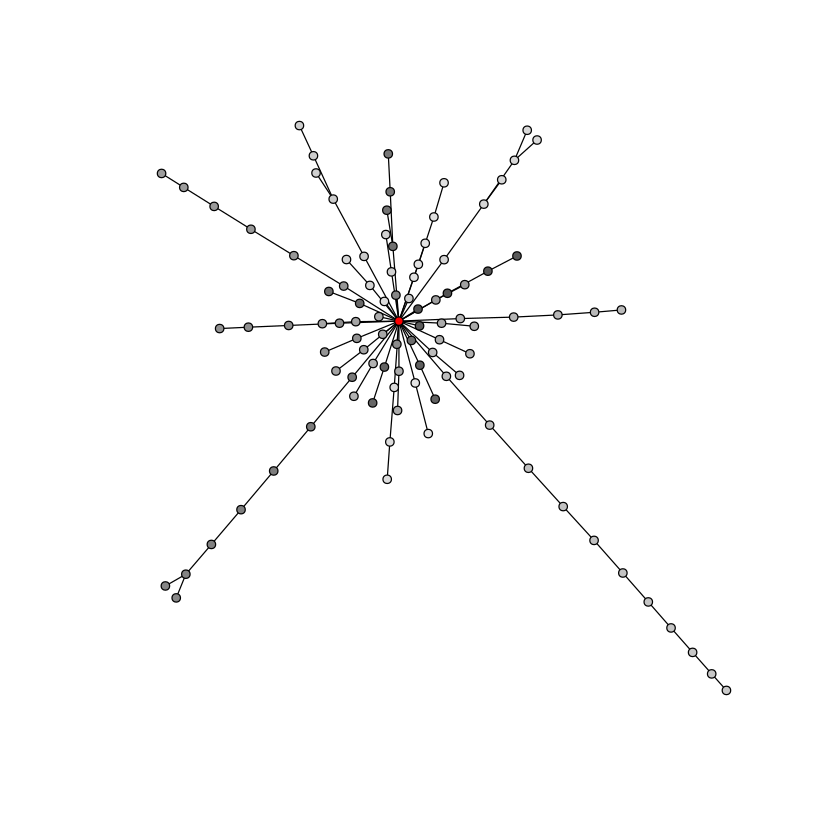

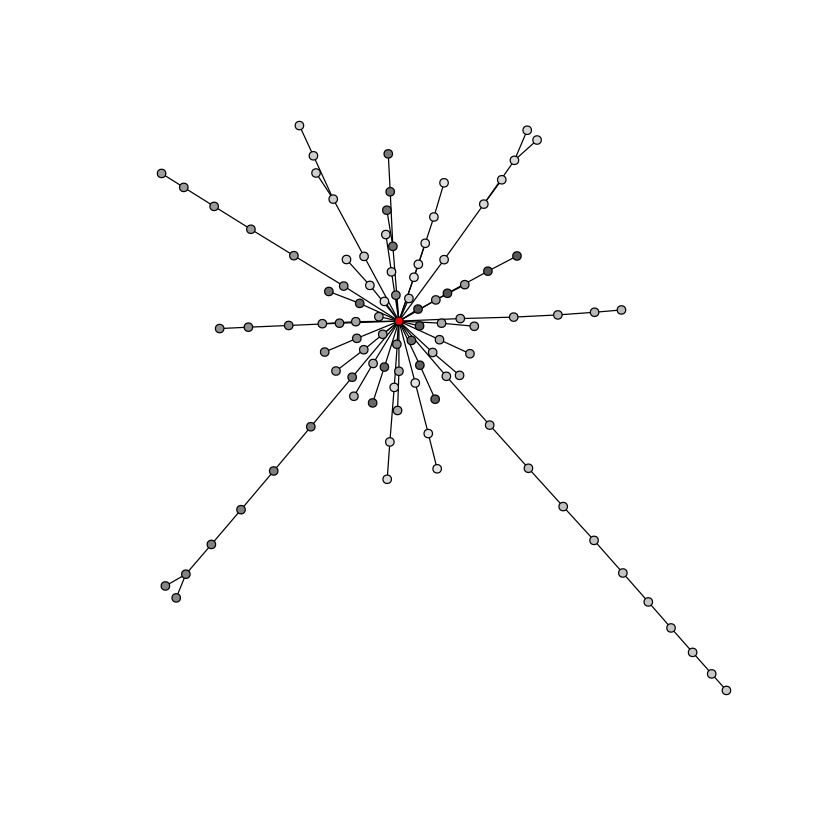

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

$mar
[1] 0 0 0 0

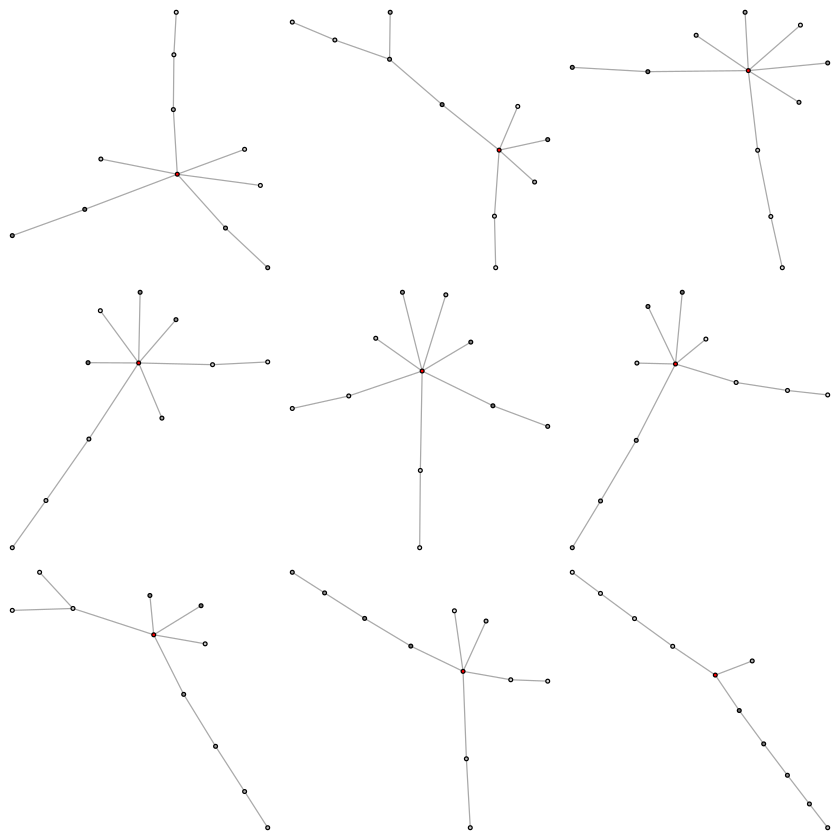

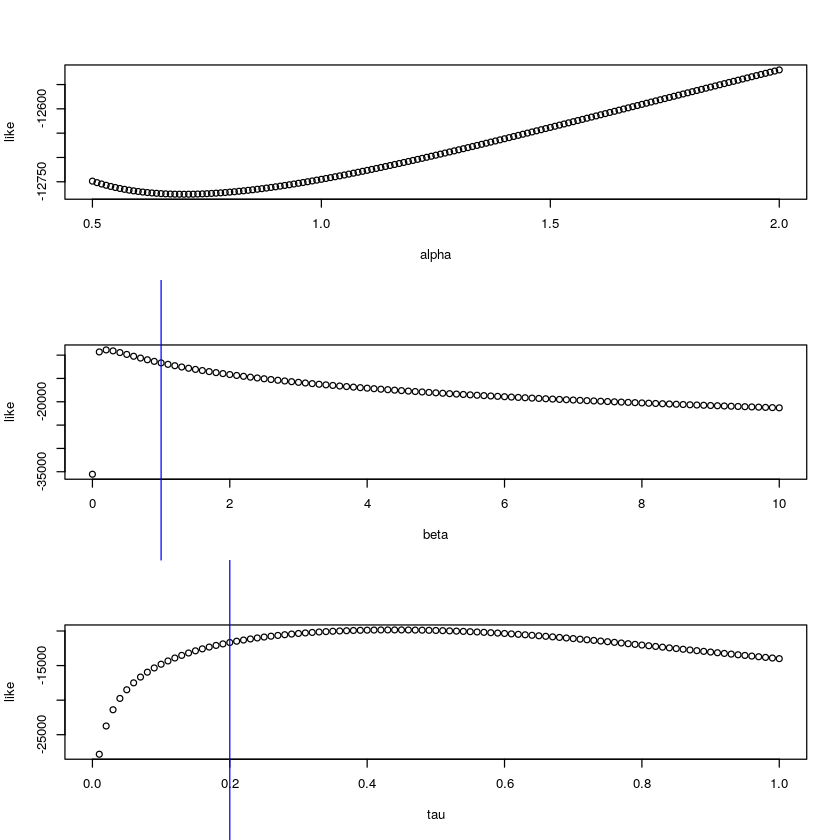

In [1]:
# Create a set of synthetic thread with parameters alpha, beta, tau. 
# Find estimation of the parameters  alpha*, beta*, tau* 
# Compare structural properties of trees generated 
# with real and estimated parameters
devtools::load_all()

alpha <- 0.0
beta <- 1
tau <- 0.2
ntrees <- 100

# Generate an plot synthetic tree ----------------------------------------------
parents <- gen.parentsvector.Gomez2013(ntrees, alpha, beta, tau) # generate
plot.tree.nicely(parents)                                        # plot 
plot.tree.nicely.sequential(parents, stepsecs = 0)               # plot sequential


# Generate N synthetic trees (and plot some) -----------------------------------
ntrees <- 1000
parents <- replicate(ntrees,
                     gen.parentsvector.Gomez2013(n, alpha, beta, tau), 
                     simplify = FALSE)
par(mfrow = c(3,3))
sapply(1:9, function(idtree) plot.tree.nicely(parents[[idtree]])) # Plot some


# Estimate paremeters ----------------------------------------------------------

# Store in dataframe format. 
# Each line contains the post id, the chosen parent
# and the features of its parent (popularity, lag, root) at the 
# moment (t) of that choice.
df.trees <- all_parents_to_dataframe(parents)        

# Grid search of one parameter given the other two 
# This is useful to see the shape of the likelihood around the MLE.
par(mfrow = c(3,1))
alpha_grid <- seq(0.5,2, by = 0.01)
like <- rep(NA, length(alpha_grid))
for(i in 1:length(alpha_grid)){
  like[i] <- likelihood_Gomez2013(df.trees, alpha_grid[i], beta, tau)
}
plot(alpha_grid, like, xlab = 'alpha')
abline(v=alpha, col = 'blue')

beta_grid <- seq(0,10, by = 0.1)
like <- rep(NA, length(beta_grid))
for(i in 1:length(beta_grid)){
  like[i] <- likelihood_Gomez2013(df.trees, alpha=alpha, beta_grid[i], tau)
}
plot(beta_grid, like, xlab = 'beta')
abline(v=beta, col = 'blue')

tau_grid <- seq(0,1, by = 0.01)
like <- rep(NA, length(tau_grid))
for(i in 1:length(tau_grid)){
  like[i] <- likelihood_Gomez2013(df.trees, alpha, beta, tau_grid[i])
}
plot(tau_grid, like, xlab = 'tau')
abline(v=tau, col = 'blue')

# Estimate alpha, beta, tau parameters
res <- estimation_Gomez2013(df.trees = df.trees, params=list(alpha=0.5, beta=0.6, tau=0.5))

In [2]:
res

$alpha
[1] 0.0001234765

$beta
[1] 0.1916171

$tau
[1] 0.1982566

$likelihood
[1] -8878.798

In [11]:
res <- estimation_Gomez2013(df.trees = df.trees, params=list(alpha=0.5, beta=0.3, tau=0.5))

ERROR: Error in while (nf < maxfeval & restarts < restarts.max & dist > ftol & : valor ausente donde TRUE/FALSE es necesario


In [9]:
res

$alpha
[1] 0.0001234765

$beta
[1] 0.1916171

$tau
[1] 0.1982566

$likelihood
[1] -8878.798